# Breast Cancer Detection 

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

### Table of Content
--- 

> #### Steps are:

- [Data Collection](#1)
- [Data Features](#2)
- [Data Preprocessing](#3)
- [Expolatory Data Analysis](#4)
- [Model Implementation](#5)
- [ML Model Selecting and Model Prediction](#6)
- [Deploy Model](#7)





<center><img src="https://healthitanalytics.com/images/site/article_headers/_normal/ThinkstockPhotos-495951912.jpg" alt="Breast Cancer" height="60%" width="50%" /></center>

### Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)



#### Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

All feature values are recoded with four significant digits.

Class distribution: 13405 benign, 7939 malignant

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics


%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

## 1. Data Collection

In [3]:
df = pd.read_csv('/Users/user/Dropbox/Data Science/Final Project/Model/breast cancer.csv')
df.head(100)
df.tail(10)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5,9,22,25,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id diagnosis radius_mean  texture_mean perimeter_mean area_mean  \
21612  324235.0         B      28.025        30.754        64.834+    353.94   
21613  324246.0         B      28.026        30.755        64.835+    353.95   
21614  324257.0         B      28.027        30.756        64.836+    353.96   
21615  324268.0         M      28.028        30.757        64.837+    353.97   
21616  324279.0         M      28.029        30.758        64.838+    353.98   
21617  324290.0         M       28.03        30.759        64.839+    353.99   
21618  324301.0         M      28.031        30.760         64.84+     354.0   
21619  324312.0         M      28.032        30.761        64.841+    354.01   
21620  324323.0         M      28.033        30.762        64.842+    354.02   
21621  324334.0         B      28.034        30.763        64.843+    354.03   

       smoothness_mean compactness_mean  concavity_mean concave points_mean  \
21612          0.26307            $0.23         0.21044             0.21044   
21613          0.26308            $0.23         0.21045             0.21045   
21614          0.26309            $0.23         0.21046             0.21046   
21615          0.26310            $0.23         0.21047             0.21047   
21616          0.26311            $0.23         0.21048             0.21048   
21617          0.26312            $0.23         0.21049             0.21049   
21618          0.26313            $0.23         0.21050              0.2105   
21619          0.26314            $0.23         0.21051             0.21051   
21620          0.26315            $0.23         0.21052             0.21052   
21621          0.26316            $0.23         0.21053             0.21053   

       ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
21612  ...        28.974         33.064           71.454     206.244   
21613  ...        28.975         33.065           71.455     206.245   
21614  ...        28.976         33.066           71.456     206.246   
21615  ...        28.977         33.067           71.457     206.247   
21616  ...        28.978         33.068           71.458     206.248   
21617  ...        28.979         33.069           71.459     206.249   
21618  ...         28.98         33.070           71.460      206.25   
21619  ...        28.981         33.071           71.461     206.251   
21620  ...        28.982         33.072           71.462     206.252   
21621  ...        28.983         33.073           71.463     206.253   

       smoothness_worst  compactness_worst  concavity_worst  \
21612           0.28161            0.23773          0.21044   
21613           0.28162            0.23774          0.21045   
21614           0.28163            0.23775          0.21046   
21615           0.28164            0.23776          0.21047   
21616           0.28165            0.23777          0.21048   
21617           0.28166            0.23778          0.21049   
21618           0.28167            0.23779          0.21050   
21619           0.28168            0.23780          0.21051   
21620           0.28169            0.23781          0.21052   
21621           0.28170            0.23782          0.21053   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
21612               0.21044         0.36694                  0.26548  
21613               0.21045         0.36695                  0.26549  
21614               0.21046         0.36696                  0.26550  
21615               0.21047         0.36697                  0.26551  
21616               0.21048         0.36698                  0.26552  
21617               0.21049         0.36699                  0.26553  
21618               0.21050           0.367                  0.26554  
21619               0.21051         0.36701                  0.26555  
21620               0.21052         0.36702                  0.26556  
21621               0.21053         0.36703                  0.26

## 2. Data Features

In [4]:
df.shape

(21622, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21622 entries, 0 to 21621
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21344 non-null  float64
 1   diagnosis                21344 non-null  object 
 2   radius_mean              21344 non-null  object 
 3   texture_mean             21335 non-null  float64
 4   perimeter_mean           21622 non-null  object 
 5   area_mean                21344 non-null  object 
 6   smoothness_mean          21335 non-null  float64
 7   compactness_mean         21335 non-null  object 
 8   concavity_mean           21339 non-null  float64
 9   concave points_mean      21335 non-null  object 
 10  symmetry_mean            21335 non-null  float64
 11  fractal_dimension_mean   21335 non-null  float64
 12  radius_se                21338 non-null  float64
 13  texture_se               21335 non-null  float64
 14  perimeter_se          

In [6]:
df.duplicated().sum()

364

In [7]:
df.isnull().sum()

id                         278
diagnosis                  278
radius_mean                278
texture_mean               287
perimeter_mean               0
area_mean                  278
smoothness_mean            287
compactness_mean           287
concavity_mean             283
concave points_mean        287
symmetry_mean              287
fractal_dimension_mean     287
radius_se                  284
texture_se                 287
perimeter_se               287
area_se                    287
smoothness_se              287
compactness_se             280
concavity_se               278
concave points_se          287
symmetry_se                287
fractal_dimension_se       287
radius_worst               281
texture_worst              287
perimeter_worst            287
area_worst                 278
smoothness_worst           287
compactness_worst          287
concavity_worst            287
concave points_worst       287
symmetry_worst             287
fractal_dimension_worst    287
dtype: i

## Observations 
#### Observations from the data  features.
* Total rows are 21622
* Total columns are 32

#### Observations for the null values
* id has 278 rows is null
* diagnosis has 278 rows is null
* radius_mean has 278 rows is null
* texture_mean has 287 rows is null
* perimeter_mean has 287 rows is null
* area_mean has 278 rows is null
* smoothness_mean has 287 rows is null
* compactness_mean has 287 rows is null
* concavity_mean has 283 rows is null
* concave points_mean has 287 rows is null
* symmetry_mean has 287 rows is null
* fractal_dimension_mean has 287 rows is null
* radius_se has 284 rows is null
* texture_se has 287 rows is null
* perimeter_se has 287 rows is null
* area_se has 287 rows is null
* smoothness_se has 287 rows is null
* compactness_se has 280 rows is null
* concavity_se has 278 rows is null
* concave points_se has 287 rows is null
* symmetry_se has 287 rows is null
* fractal_dimension_se has 287 rows is null
* radius_worst has 281 rows is null
* texture_worst has 287 rows is null
* perimeter_worst has 287 rows is null
* area_worst has 278 rows is null
* smoothness_worst has 287 rows is null
* compactness_worst has 287 rows is null
* concavity_worst has 287 rows is null
* concave points_worst has 287 rows is null
* symmetry_worst has 287 rows is null
* fractal_dimension_worst has 287 rows is null

#### Observations for the duplicate rows
* There are 371 duplicate rows

#### Observations for the numerical data (data type)
We are going to handle the following issue as it is not matched with its kind of data type:

* The data type of radius_mean is object which is not matched with the numerical data.
* The data type of perimeter_mean is object which is not matched with the numerical data.
* The data type of area_mean is object which is not matched with the numerical data.
* The data type of compactness_mean is object which is not matched with the numerical data.
* The data type of concave points_mean is object which is not matched with the numerical data.
* The data type of fractal_dimension_mean is object which is not matched with the numerical data.
* The data type of radius_worst is object which is not matched with the numerical data.
* The data type of area_worst is object which is not matched with the numerical data.
* The data type of symmetry_worst is object which is not matched with the numerical data.

The rest of other data type is matched with the numerical data and no need to going through it.


## 3. Data Preprocessing

### 3.1 Fix the numerical data
#### 3.1.1 radius_mean

In [8]:
#df['radius_mean'] = pd.to_numeric(df['radius_mean'], errors = 'coerce')


#### 3.1.2 perimeter_mean

In [9]:
#df['perimeter_mean'] = pd.to_numeric(df['perimeter_mean'], errors = 'coerce')


#### 3.1.3 area_mean


In [10]:
#df['area_mean'] = pd.to_numeric(df['area_mean'], errors = 'coerce')


#### 3.1.4 compactness_mean



In [11]:
#df['compactness_mean'] = pd.to_numeric(df['compactness_mean'], errors = 'coerce')

#### 3.1.5 concave points_mean



In [12]:
#df['concave points_mean'] = pd.to_numeric(df['concave points_mean'], errors = 'coerce')

#### 3.1.6 Fix fractal_dimension_mean

In [13]:
#df['fractal_dimension_mean'] = pd.to_numeric(df['fractal_dimension_mean'], errors = 'coerce')

#### 3.1.7 radius_worst


In [14]:
#df['radius_worst'] = pd.to_numeric(df['radius_worst'], errors = 'coerce')

#### 3.1.8 Fix area_worst

In [15]:
#df['area_worst'] = pd.to_numeric(df['area_worst'], errors = 'coerce')

#### 3.1.9 Fix symmetry_worst

In [16]:
#df['symmetry_worst'] = pd.to_numeric(df['symmetry_worst'], errors = 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21622 entries, 0 to 21621
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21344 non-null  float64
 1   diagnosis                21344 non-null  object 
 2   radius_mean              21344 non-null  object 
 3   texture_mean             21335 non-null  float64
 4   perimeter_mean           21622 non-null  object 
 5   area_mean                21344 non-null  object 
 6   smoothness_mean          21335 non-null  float64
 7   compactness_mean         21335 non-null  object 
 8   concavity_mean           21339 non-null  float64
 9   concave points_mean      21335 non-null  object 
 10  symmetry_mean            21335 non-null  float64
 11  fractal_dimension_mean   21335 non-null  float64
 12  radius_se                21338 non-null  float64
 13  texture_se               21335 non-null  float64
 14  perimeter_se          

In [18]:
df = pd.read_csv('/Users/user/Dropbox/Data Science/Final Project/Model/breast cancer.csv')
df.head(50)
df.tail(10)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5,9,22,25,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id diagnosis radius_mean  texture_mean perimeter_mean area_mean  \
21612  324235.0         B      28.025        30.754        64.834+    353.94   
21613  324246.0         B      28.026        30.755        64.835+    353.95   
21614  324257.0         B      28.027        30.756        64.836+    353.96   
21615  324268.0         M      28.028        30.757        64.837+    353.97   
21616  324279.0         M      28.029        30.758        64.838+    353.98   
21617  324290.0         M       28.03        30.759        64.839+    353.99   
21618  324301.0         M      28.031        30.760         64.84+     354.0   
21619  324312.0         M      28.032        30.761        64.841+    354.01   
21620  324323.0         M      28.033        30.762        64.842+    354.02   
21621  324334.0         B      28.034        30.763        64.843+    354.03   

       smoothness_mean compactness_mean  concavity_mean concave points_mean  \
21612          0.26307            $0.23         0.21044             0.21044   
21613          0.26308            $0.23         0.21045             0.21045   
21614          0.26309            $0.23         0.21046             0.21046   
21615          0.26310            $0.23         0.21047             0.21047   
21616          0.26311            $0.23         0.21048             0.21048   
21617          0.26312            $0.23         0.21049             0.21049   
21618          0.26313            $0.23         0.21050              0.2105   
21619          0.26314            $0.23         0.21051             0.21051   
21620          0.26315            $0.23         0.21052             0.21052   
21621          0.26316            $0.23         0.21053             0.21053   

       ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
21612  ...        28.974         33.064           71.454     206.244   
21613  ...        28.975         33.065           71.455     206.245   
21614  ...        28.976         33.066           71.456     206.246   
21615  ...        28.977         33.067           71.457     206.247   
21616  ...        28.978         33.068           71.458     206.248   
21617  ...        28.979         33.069           71.459     206.249   
21618  ...         28.98         33.070           71.460      206.25   
21619  ...        28.981         33.071           71.461     206.251   
21620  ...        28.982         33.072           71.462     206.252   
21621  ...        28.983         33.073           71.463     206.253   

       smoothness_worst  compactness_worst  concavity_worst  \
21612           0.28161            0.23773          0.21044   
21613           0.28162            0.23774          0.21045   
21614           0.28163            0.23775          0.21046   
21615           0.28164            0.23776          0.21047   
21616           0.28165            0.23777          0.21048   
21617           0.28166            0.23778          0.21049   
21618           0.28167            0.23779          0.21050   
21619           0.28168            0.23780          0.21051   
21620           0.28169            0.23781          0.21052   
21621           0.28170            0.23782          0.21053   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
21612               0.21044         0.36694                  0.26548  
21613               0.21045         0.36695                  0.26549  
21614               0.21046         0.36696                  0.26550  
21615               0.21047         0.36697                  0.26551  
21616               0.21048         0.36698                  0.26552  
21617               0.21049         0.36699                  0.26553  
21618               0.21050           0.367                  0.26554  
21619               0.21051         0.36701                  0.26555  
21620               0.21052         0.36702                  0.26556  
21621               0.21053         0.36703                  0.26

#### We found that the data type has been changed but still with have invaid values and not accurte to proceed, so we need to work in alternative way

### 3.2 Alternative way to fix the numerical data type

#### 3.2.1 radius_mean

In [19]:
for r in df['radius_mean'].unique():
    print(r)

mean
20.57
19.69
11.42
20.29
12.45
18.25
13.71
12.46
14.54
14.68
16.13
19.81
13.54
13.08
9.504
15.34
21.16
16.65
17.14
14.58
18.61
15.3
17.57
18.63
11.84
17.02
19.27
16.74
14.25
13.03
14.99
13.48
13.44
10.95
19.07
13.28
13.17
18.65
8.196
12.05
13.49
11.76
13.64
11.94
18.22
15.1
11.52
19.21
14.71
13.05
8.618
10.17
8.598
9.173
12.68
14.78
9.465
11.31
9.029
12.78
18.94
8.888
17.2
13.8
12.31
16.07
13.53
18.05
20.18
12.86
11.45
13.34
25.22
19.1
12
18.46
14.48
19.02
12.36
14.64
14.62
15.37
13.27
13.45
15.06
20.26
12.18
9.787
11.6
14.42
13.61
6.981
9.876
10.49
13.11
11.64
22.27
11.34
9.777
12.63
14.26
10.51
8.726
11.93
8.95
14.87
15.78
17.95
11.41
18.66
24.25
14.5
13.37
13.85
19
19.79
12.19
15.46
16.16
15.71
18.45
12.77
11.71
11.43
14.95
11.28
9.738
16.11
12.9
10.75
11.9
11.8
14.44
13.74
13
8.219
9.731
11.15
13.15
12.25
17.68
16.84
12.06
10.9
11.75
19.19
19.59
12.34
23.27
14.97
10.8
16.78
17.47
12.32
13.43
11.08
10.66
8.671
9.904
16.46
13.01
12.81
27.22
21.09
15.7
15.28
10.08
18.31
11.81
12.3

8.482
8.483
8.484
8.485
8.486
8.487
8.488
8.489
8.49
8.491
8.492
8.493
8.494
8.495
8.496
8.497
8.498
8.499
8.5
8.501
8.502
8.503
8.504
8.505
8.506
8.507
8.508
8.509
8.51
8.511
8.512
8.513
8.514
8.515
8.516
8.517
8.518
8.519
8.52
8.521
8.522
8.523
8.524
8.525
8.526
8.527
8.528
8.529
8.53
8.531
8.532
8.533
8.534
8.535
8.536
8.537
8.538
8.539
8.54
8.541
8.542
8.543
8.544
8.545
8.546
8.547
8.548
8.549
8.55
8.551
8.552
8.553
8.554
8.555
8.556
8.557
8.558
8.559
8.56
8.561
8.562
8.563
8.564
8.565
8.566
8.567
8.568
8.569
8.57
8.572
8.573
8.574
8.575
8.576
8.577
8.578
8.579
8.58
8.581
8.582
8.583
8.584
8.585
8.586
8.587
8.588
8.589
8.59
8.591
8.592
8.593
8.594
8.595
8.596
8.599
8.6
8.601
8.602
8.603
8.604
8.605
8.606
8.607
8.608
8.609
8.61
8.611
8.612
8.613
8.614
8.615
8.616
8.617
8.619
8.62
8.621
8.622
8.623
8.624
8.625
8.626
8.627
8.628
8.629
8.63
8.631
8.632
8.633
8.634
8.635
8.636
8.637
8.638
8.639
8.64
8.641
8.642
8.643
8.644
8.645
8.646
8.647
8.648
8.649
8.65
8.651
8.652
8.653
8.654
8.655

10.633
10.634
10.635
10.636
10.637
10.638
10.639
10.64
10.641
10.642
10.643
10.644
10.645
10.646
10.647
10.648
10.649
10.651
10.652
10.653
10.654
10.655
10.656
10.657
10.658
10.659
10.661
10.662
10.663
10.664
10.665
10.666
10.667
10.668
10.669
10.67
10.671
10.672
10.673
10.674
10.675
10.676
10.677
10.678
10.679
10.68
10.681
10.682
10.683
10.684
10.685
10.686
10.687
10.688
10.689
10.69
10.691
10.692
10.693
10.694
10.695
10.696
10.697
10.698
10.699
10.7
10.701
10.702
10.703
10.704
10.705
10.706
10.707
10.708
10.709
10.711
10.712
10.713
10.714
10.715
10.716
10.717
10.718
10.719
10.72
10.721
10.722
10.723
10.724
10.725
10.726
10.727
10.728
10.729
10.73
10.731
10.732
10.733
10.734
10.735
10.736
10.737
10.738
10.739
10.74
10.741
10.742
10.743
10.744
10.745
10.746
10.747
10.748
10.749
10.751
10.752
10.753
10.754
10.755
10.756
10.757
10.758
10.759
10.76
10.761
10.762
10.763
10.764
10.765
10.766
10.767
10.768
10.769
10.77
10.771
10.772
10.773
10.774
10.775
10.776
10.777
10.778
10.779
10.78
10.7

12.662
12.663
12.664
12.665
12.666
12.667
12.668
12.669
12.671
12.672
12.673
12.674
12.675
12.676
12.677
12.678
12.679
12.681
12.682
12.683
12.684
12.685
12.686
12.687
12.688
12.689
12.69
12.691
12.692
12.693
12.694
12.695
12.696
12.697
12.698
12.699
12.701
12.702
12.703
12.704
12.705
12.706
12.707
12.708
12.709
12.71
12.711
12.712
12.713
12.714
12.715
12.716
12.717
12.718
12.719
12.721
12.722
12.723
12.724
12.725
12.726
12.727
12.728
12.729
12.73
12.731
12.732
12.733
12.734
12.735
12.736
12.737
12.738
12.739
12.74
12.741
12.742
12.743
12.744
12.745
12.746
12.747
12.748
12.749
12.751
12.752
12.753
12.754
12.755
12.756
12.757
12.758
12.759
12.761
12.762
12.763
12.764
12.765
12.766
12.767
12.768
12.769
12.771
12.772
12.773
12.774
12.775
12.776
12.777
12.778
12.779
12.781
12.782
12.783
12.784
12.785
12.786
12.787
12.788
12.789
12.79
12.791
12.792
12.793
12.794
12.795
12.796
12.797
12.798
12.799
12.801
12.802
12.803
12.804
12.805
12.806
12.807
12.808
12.809
12.811
12.812
12.813
12.814
12.8

14.265
14.266
14.267
14.268
14.269
14.271
14.272
14.273
14.274
14.275
14.276
14.277
14.278
14.279
14.28
14.281
14.282
14.283
14.284
14.285
14.286
14.287
14.288
14.289
14.291
14.292
14.293
14.294
14.295
14.296
14.297
14.298
14.299
14.3
14.301
14.302
14.303
14.304
14.305
14.306
14.307
14.308
14.309
14.31
14.311
14.312
14.313
14.314
14.315
14.316
14.317
14.318
14.319
14.32
14.321
14.322
14.323
14.324
14.325
14.326
14.327
14.328
14.329
14.33
14.331
14.332
14.333
14.334
14.335
14.336
14.337
14.338
14.339
14.341
14.342
14.343
14.344
14.345
14.346
14.347
14.348
14.349
14.35
14.351
14.352
14.353
14.354
14.355
14.356
14.357
14.358
14.359
14.36
14.361
14.362
14.363
14.364
14.365
14.366
14.367
14.368
14.369
14.37
14.371
14.372
14.373
14.374
14.375
14.376
14.377
14.378
14.379
14.38
14.381
14.382
14.383
14.384
14.385
14.386
14.387
14.388
14.389
14.39
14.391
14.392
14.393
14.394
14.395
14.396
14.397
14.398
14.399
14.401
14.402
14.403
14.404
14.405
14.406
14.407
14.408
14.409
14.411
14.412
14.413
14.

15.608
15.609
15.611
15.612
15.613
15.614
15.615
15.616
15.617
15.618
15.619
15.62
15.621
15.622
15.623
15.624
15.625
15.626
15.627
15.628
15.629
15.63
15.631
15.632
15.633
15.634
15.635
15.636
15.637
15.638
15.639
15.64
15.641
15.642
15.643
15.644
15.645
15.646
15.647
15.648
15.649
15.65
15.651
15.652
15.653
15.654
15.655
15.656
15.657
15.658
15.659
15.661
15.662
15.663
15.664
15.665
15.666
15.667
15.668
15.669
15.67
15.671
15.672
15.673
15.674
15.675
15.676
15.677
15.678
15.679
15.68
15.681
15.682
15.683
15.684
15.685
15.686
15.687
15.688
15.689
15.69
15.691
15.692
15.693
15.694
15.695
15.696
15.697
15.698
15.699
15.701
15.702
15.703
15.704
15.705
15.706
15.707
15.708
15.709
15.711
15.712
15.713
15.714
15.715
15.716
15.717
15.718
15.719
15.72
15.721
15.722
15.723
15.724
15.725
15.726
15.727
15.728
15.729
15.731
15.732
15.733
15.734
15.735
15.736
15.737
15.738
15.739
15.74
15.741
15.742
15.743
15.744
15.745
15.746
15.747
15.748
15.749
15.751
15.752
15.753
15.754
15.755
15.756
15.757
1

17.055
17.056
17.057
17.058
17.059
17.061
17.062
17.063
17.064
17.065
17.066
17.067
17.068
17.069
17.07
17.071
17.072
17.073
17.074
17.075
17.076
17.077
17.078
17.079
17.081
17.082
17.083
17.084
17.085
17.086
17.087
17.088
17.089
17.09
17.091
17.092
17.093
17.094
17.095
17.096
17.097
17.098
17.099
17.1
17.101
17.102
17.103
17.104
17.105
17.106
17.107
17.108
17.109
17.11
17.111
17.112
17.113
17.114
17.115
17.116
17.117
17.118
17.119
17.12
17.121
17.122
17.123
17.124
17.125
17.126
17.127
17.128
17.129
17.13
17.131
17.132
17.133
17.134
17.135
17.136
17.137
17.138
17.139
17.141
17.142
17.143
17.144
17.145
17.146
17.147
17.148
17.149
17.15
17.151
17.152
17.153
17.154
17.155
17.156
17.157
17.158
17.159
17.16
17.161
17.162
17.163
17.164
17.165
17.166
17.167
17.168
17.169
17.17
17.171
17.172
17.173
17.174
17.175
17.176
17.177
17.178
17.179
17.18
17.181
17.182
17.183
17.184
17.185
17.186
17.187
17.188
17.189
17.191
17.192
17.193
17.194
17.195
17.196
17.197
17.198
17.199
17.201
17.202
17.203
17.

18.706
18.707
18.708
18.709
18.71
18.711
18.712
18.713
18.714
18.715
18.716
18.717
18.718
18.719
18.72
18.721
18.722
18.723
18.724
18.725
18.726
18.727
18.728
18.729
18.73
18.731
18.732
18.733
18.734
18.735
18.736
18.737
18.738
18.739
18.74
18.741
18.742
18.743
18.744
18.745
18.746
18.747
18.748
18.749
18.75
18.751
18.752
18.753
18.754
18.755
18.756
18.757
18.758
18.759
18.76
18.761
18.762
18.763
18.764
18.765
18.766
18.767
18.768
18.769
18.771
18.772
18.773
18.774
18.775
18.776
18.777
18.778
18.779
18.78
18.781
18.782
18.783
18.784
18.785
18.786
18.787
18.788
18.789
18.79
18.791
18.792
18.793
18.794
18.795
18.796
18.797
18.798
18.799
18.8
18.801
18.802
18.803
18.804
18.805
18.806
18.807
18.808
18.809
18.811
18.812
18.813
18.814
18.815
18.816
18.817
18.818
18.819
18.821
18.822
18.823
18.824
18.825
18.826
18.827
18.828
18.829
18.83
18.831
18.832
18.833
18.834
18.835
18.836
18.837
18.838
18.839
18.84
18.841
18.842
18.843
18.844
18.845
18.846
18.847
18.848
18.849
18.85
18.851
18.852
18.85

20.374
20.375
20.376
20.377
20.378
20.379
20.38
20.381
20.382
20.383
20.384
20.385
20.386
20.387
20.388
20.389
20.39
20.391
20.392
20.393
20.394
20.395
20.396
20.397
20.398
20.399
20.4
20.401
20.402
20.403
20.404
20.405
20.406
20.407
20.408
20.409
20.41
20.411
20.412
20.413
20.414
20.415
20.416
20.417
20.418
20.419
20.42
20.421
20.422
20.423
20.424
20.425
20.426
20.427
20.428
20.429
20.43
20.431
20.432
20.433
20.434
20.435
20.436
20.437
20.438
20.439
20.441
20.442
20.443
20.444
20.445
20.446
20.447
20.448
20.449
20.45
20.451
20.452
20.453
20.454
20.455
20.456
20.457
20.458
20.459
20.46
20.461
20.462
20.463
20.464
20.465
20.466
20.467
20.468
20.469
20.471
20.472
20.473
20.474
20.475
20.476
20.477
20.478
20.479
20.481
20.482
20.483
20.484
20.485
20.486
20.487
20.488
20.489
20.49
20.491
20.492
20.493
20.494
20.495
20.496
20.497
20.498
20.499
20.5
20.501
20.502
20.503
20.504
20.505
20.506
20.507
20.508
20.509
20.511
20.512
20.513
20.514
20.515
20.516
20.517
20.518
20.519
20.52
20.521
20.52

21.757
21.758
21.759
21.76
21.761
21.762
21.763
21.764
21.765
21.766
21.767
21.768
21.769
21.77
21.771
21.772
21.773
21.774
21.775
21.776
21.777
21.778
21.779
21.78
21.781
21.782
21.783
21.784
21.785
21.786
21.787
21.788
21.789
21.79
21.791
21.792
21.793
21.794
21.795
21.796
21.797
21.798
21.799
21.8
21.801
21.802
21.803
21.804
21.805
21.806
21.807
21.808
21.809
21.81
21.811
21.812
21.813
21.814
21.815
21.816
21.817
21.818
21.819
21.82
21.821
21.822
21.823
21.824
21.825
21.826
21.827
21.828
21.829
21.83
21.831
21.832
21.833
21.834
21.835
21.836
21.837
21.838
21.839
21.84
21.841
21.842
21.843
21.844
21.845
21.846
21.847
21.848
21.849
21.85
21.851
21.852
21.853
21.854
21.855
21.856
21.857
21.858
21.859
21.86
21.861
21.862
21.863
21.864
21.865
21.866
21.867
21.868
21.869
21.87
21.871
21.872
21.873
21.874
21.875
21.876
21.877
21.878
21.879
21.88
21.881
21.882
21.883
21.884
21.885
21.886
21.887
21.888
21.889
21.89
21.891
21.892
21.893
21.894
21.895
21.896
21.897
21.898
21.899
21.9
21.901
21

23.94
23.941
23.942
23.943
23.944
23.945
23.946
23.947
23.948
23.949
23.95
23.951
23.952
23.953
23.954
23.955
23.956
23.957
23.958
23.959
23.96
23.961
23.962
23.963
23.964
23.965
23.966
23.967
23.968
23.969
23.97
23.971
23.972
23.973
23.974
23.975
23.976
23.977
23.978
23.979
23.98
23.981
23.982
23.983
23.984
23.985
23.986
23.987
nan
24.087
24.088
24.089
24.09
24.091
24.092
24.093
24.094
24.095
24.096
24.097
24.098
24.099
24.1
24.101
24.102
24.103
24.104
24.105
24.106
24.107
24.108
24.109
24.11
24.111
24.112
24.113
24.114
24.115
24.116
24.117
24.118
24.119
24.12
24.121
24.122
24.123
24.124
24.125
24.126
24.127
24.128
24.129
24.13
24.131
24.132
24.133
24.134
24.135
24.136
24.137
24.138
24.139
24.14
24.141
24.142
24.143
24.144
24.145
24.146
24.147
24.148
24.149
24.15
24.151
24.152
24.153
24.154
24.155
24.156
24.157
24.158
24.159
24.16
24.161
24.162
24.163
24.164
24.165
24.166
24.167
24.168
24.169
24.17
24.171
24.172
24.173
24.174
24.175
24.176
24.177
24.178
24.179
24.18
24.181
24.182
24.1

26.266
26.267
26.268
26.269
26.27
26.271
26.272
26.273
26.274
26.275
26.276
26.277
26.278
26.279
26.28
26.281
26.282
26.283
26.284
26.285
26.286
26.287
26.288
26.289
26.29
26.291
26.292
26.293
26.294
26.295
26.296
26.297
26.298
26.299
26.3
26.301
26.302
26.303
26.304
26.305
26.306
26.307
26.308
26.309
26.31
26.311
26.312
26.313
26.314
26.315
26.316
26.317
26.318
26.319
26.32
26.321
26.322
26.323
26.324
26.325
26.326
26.327
26.328
26.329
26.33
26.331
26.332
26.333
26.334
26.335
26.336
26.337
26.338
26.339
26.34
26.341
26.342
26.343
26.344
26.345
26.346
26.347
26.348
26.349
26.35
26.351
26.352
26.353
26.354
26.355
26.356
26.357
26.358
26.359
26.36
26.361
26.362
26.363
26.364
26.365
26.366
26.367
26.368
26.369
26.37
26.371
26.372
26.373
26.374
26.375
26.376
26.377
26.378
26.379
26.38
26.381
26.382
26.383
26.384
26.385
26.386
26.387
26.388
26.389
26.39
26.391
26.392
26.393
26.394
26.395
26.396
26.397
26.398
26.399
26.4
26.401
26.402
26.403
26.404
26.405
26.406
26.407
26.408
26.409
26.41
26

In [20]:
df['radius_mean'][df['radius_mean'] == 'mean'] = 0
df['radius_mean'] = df['radius_mean'].astype(float)

/var/folders/g8/mg3scp791kg85mtx_f40178m0000gn/T/ipykernel_908/778587583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['radius_mean'][df['radius_mean'] == 'mean'] = 0


In [21]:
df['radius_mean']

0         0.000
1        20.570
2        19.690
3        11.420
4        20.290
          ...  
21617    28.030
21618    28.031
21619    28.032
21620    28.033
21621    28.034
Name: radius_mean, Length: 21622, dtype: float64

In [22]:
# To Check Again
for p in df['radius_mean'].unique():
    print(p)

0.0
20.57
19.69
11.42
20.29
12.45
18.25
13.71
12.46
14.54
14.68
16.13
19.81
13.54
13.08
9.504
15.34
21.16
16.65
17.14
14.58
18.61
15.3
17.57
18.63
11.84
17.02
19.27
16.74
14.25
13.03
14.99
13.48
13.44
10.95
19.07
13.28
13.17
18.65
8.196
12.05
13.49
11.76
13.64
11.94
18.22
15.1
11.52
19.21
14.71
13.05
8.618
10.17
8.598
9.173
12.68
14.78
9.465
11.31
9.029
12.78
18.94
8.888
17.2
13.8
12.31
16.07
13.53
18.05
20.18
12.86
11.45
13.34
25.22
19.1
12.0
18.46
14.48
19.02
12.36
14.64
14.62
15.37
13.27
13.45
15.06
20.26
12.18
9.787
11.6
14.42
13.61
6.981
9.876
10.49
13.11
11.64
22.27
11.34
9.777
12.63
14.26
10.51
8.726
11.93
8.95
14.87
15.78
17.95
11.41
18.66
24.25
14.5
13.37
13.85
19.0
19.79
12.19
15.46
16.16
15.71
18.45
12.77
11.71
11.43
14.95
11.28
9.738
16.11
12.9
10.75
11.9
11.8
14.44
13.74
13.0
8.219
9.731
11.15
13.15
12.25
17.68
16.84
12.06
10.9
11.75
19.19
19.59
12.34
23.27
14.97
10.8
16.78
17.47
12.32
13.43
11.08
10.66
8.671
9.904
16.46
13.01
12.81
27.22
21.09
15.7
15.28
10.08
18.31
11.81

9.166
9.167
9.168
9.169
9.17
9.171
9.172
9.174
9.175
9.176
9.177
9.178
9.179
9.18
9.181
9.182
9.183
9.184
9.185
9.186
9.187
9.188
9.189
9.19
9.191
9.192
9.193
9.194
9.195
9.196
9.197
9.198
9.199
9.2
9.201
9.202
9.203
9.204
9.205
9.206
9.207
9.208
9.209
9.21
9.211
9.212
9.213
9.214
9.215
9.216
9.217
9.218
9.219
9.22
9.221
9.222
9.223
9.224
9.225
9.226
9.227
9.228
9.229
9.23
9.231
9.232
9.233
9.234
9.235
9.236
9.237
9.238
9.239
9.24
9.241
9.242
9.243
9.244
9.245
9.246
9.247
9.248
9.249
9.25
9.251
9.252
9.253
9.254
9.255
9.256
9.257
9.258
9.259
9.26
9.261
9.262
9.263
9.264
9.265
9.266
9.267
9.269
9.27
9.271
9.272
9.273
9.274
9.275
9.276
9.277
9.278
9.279
9.28
9.281
9.282
9.283
9.284
9.285
9.286
9.287
9.288
9.289
9.29
9.291
9.292
9.293
9.294
9.296
9.297
9.298
9.299
9.3
9.301
9.302
9.303
9.304
9.305
9.306
9.307
9.308
9.309
9.31
9.311
9.312
9.313
9.314
9.315
9.316
9.317
9.318
9.319
9.32
9.321
9.322
9.323
9.324
9.325
9.326
9.327
9.328
9.329
9.33
9.331
9.332
9.334
9.335
9.336
9.337
9.338
9.339

11.09
11.091
11.092
11.093
11.094
11.095
11.096
11.097
11.098
11.099
11.1
11.101
11.102
11.103
11.104
11.105
11.106
11.107
11.108
11.109
11.11
11.111
11.112
11.113
11.114
11.115
11.116
11.117
11.118
11.119
11.12
11.121
11.122
11.123
11.124
11.125
11.126
11.127
11.128
11.129
11.131
11.132
11.133
11.134
11.135
11.136
11.137
11.138
11.139
11.141
11.142
11.143
11.144
11.145
11.146
11.147
11.148
11.149
11.151
11.152
11.153
11.154
11.155
11.156
11.157
11.158
11.159
11.161
11.162
11.163
11.164
11.165
11.166
11.167
11.168
11.169
11.17
11.171
11.172
11.173
11.174
11.175
11.176
11.177
11.178
11.179
11.18
11.181
11.182
11.183
11.184
11.185
11.186
11.187
11.188
11.189
11.19
11.191
11.192
11.193
11.194
11.195
11.196
11.197
11.198
11.199
11.201
11.202
11.203
11.204
11.205
11.206
11.207
11.208
11.209
11.21
11.211
11.212
11.213
11.214
11.215
11.216
11.217
11.218
11.219
11.221
11.222
11.223
11.224
11.225
11.226
11.227
11.228
11.229
11.23
11.231
11.232
11.233
11.234
11.235
11.236
11.237
11.238
11.239
11

13.287
13.288
13.289
13.29
13.291
13.292
13.293
13.294
13.295
13.296
13.297
13.298
13.299
13.301
13.302
13.303
13.304
13.305
13.306
13.307
13.308
13.309
13.31
13.311
13.312
13.313
13.314
13.315
13.316
13.317
13.318
13.319
13.32
13.321
13.322
13.323
13.324
13.325
13.326
13.327
13.328
13.329
13.33
13.331
13.332
13.333
13.334
13.335
13.336
13.337
13.338
13.339
13.341
13.342
13.343
13.344
13.345
13.346
13.347
13.348
13.349
13.35
13.351
13.352
13.353
13.354
13.355
13.356
13.357
13.358
13.359
13.36
13.361
13.362
13.363
13.364
13.365
13.366
13.367
13.368
13.369
13.371
13.372
13.373
13.374
13.375
13.376
13.377
13.378
13.379
13.381
13.382
13.383
13.384
13.385
13.386
13.387
13.388
13.389
13.39
13.391
13.392
13.393
13.394
13.395
13.396
13.397
13.398
13.399
13.401
13.402
13.403
13.404
13.405
13.406
13.407
13.408
13.409
13.41
13.411
13.412
13.413
13.414
13.415
13.416
13.417
13.418
13.419
13.42
13.421
13.422
13.423
13.424
13.425
13.426
13.427
13.428
13.429
13.431
13.432
13.433
13.434
13.435
13.436
1

15.147
15.148
15.149
15.15
15.151
15.152
15.153
15.154
15.155
15.156
15.157
15.158
15.159
15.16
15.161
15.162
15.163
15.164
15.165
15.166
15.167
15.168
15.169
15.17
15.171
15.172
15.173
15.174
15.175
15.176
15.177
15.178
15.179
15.18
15.181
15.182
15.183
15.184
15.185
15.186
15.187
15.188
15.189
15.191
15.192
15.193
15.194
15.195
15.196
15.197
15.198
15.199
15.2
15.201
15.202
15.203
15.204
15.205
15.206
15.207
15.208
15.209
15.21
15.211
15.212
15.213
15.214
15.215
15.216
15.217
15.218
15.219
15.221
15.222
15.223
15.224
15.225
15.226
15.227
15.228
15.229
15.23
15.231
15.232
15.233
15.234
15.235
15.236
15.237
15.238
15.239
15.24
15.241
15.242
15.243
15.244
15.245
15.246
15.247
15.248
15.249
15.25
15.251
15.252
15.253
15.254
15.255
15.256
15.257
15.258
15.259
15.26
15.261
15.262
15.263
15.264
15.265
15.266
15.267
15.268
15.269
15.271
15.272
15.273
15.274
15.275
15.276
15.277
15.278
15.279
15.281
15.282
15.283
15.284
15.285
15.286
15.287
15.288
15.289
15.29
15.291
15.292
15.293
15.294
15.2

16.605
16.606
16.607
16.608
16.609
16.61
16.611
16.612
16.613
16.614
16.615
16.616
16.617
16.618
16.619
16.62
16.621
16.622
16.623
16.624
16.625
16.626
16.627
16.628
16.629
16.63
16.631
16.632
16.633
16.634
16.635
16.636
16.637
16.638
16.639
16.64
16.641
16.642
16.643
16.644
16.645
16.646
16.647
16.648
16.649
16.651
16.652
16.653
16.654
16.655
16.656
16.657
16.658
16.659
16.66
16.661
16.662
16.663
16.664
16.665
16.666
16.667
16.668
16.669
16.67
16.671
16.672
16.673
16.674
16.675
16.676
16.677
16.678
16.679
16.68
16.681
16.682
16.683
16.684
16.685
16.686
16.687
16.688
16.689
16.691
16.692
16.693
16.694
16.695
16.696
16.697
16.698
16.699
16.7
16.701
16.702
16.703
16.704
16.705
16.706
16.707
16.708
16.709
16.71
16.711
16.712
16.713
16.714
16.715
16.716
16.717
16.718
16.719
16.72
16.721
16.722
16.723
16.724
16.725
16.726
16.727
16.728
16.729
16.73
16.731
16.732
16.733
16.734
16.735
16.736
16.737
16.738
16.739
16.741
16.742
16.743
16.744
16.745
16.746
16.747
16.748
16.749
16.75
16.751
16.75

18.854
18.855
18.856
18.857
18.858
18.859
18.86
18.861
18.862
18.863
18.864
18.865
18.866
18.867
18.868
18.869
18.87
18.871
18.872
18.873
18.874
18.875
18.876
18.877
18.878
18.879
18.88
18.881
18.882
18.883
18.884
18.885
18.886
18.887
18.888
18.889
18.89
18.891
18.892
18.893
18.894
18.895
18.896
18.897
18.898
18.899
18.9
18.901
18.902
18.903
18.904
18.905
18.906
18.907
18.908
18.909
18.91
18.911
18.912
18.913
18.914
18.915
18.916
18.917
18.918
18.919
18.92
18.921
18.922
18.923
18.924
18.925
18.926
18.927
18.928
18.929
18.93
18.931
18.932
18.933
18.934
18.935
18.936
18.937
18.938
18.939
18.941
18.942
18.943
18.944
18.945
18.946
18.947
18.948
18.949
18.95
18.951
18.952
18.953
18.954
18.955
18.956
18.957
18.958
18.959
18.96
18.961
18.962
18.963
18.964
18.965
18.966
18.967
18.968
18.969
18.97
18.971
18.972
18.973
18.974
18.975
18.976
18.977
18.978
18.979
18.98
18.981
18.982
18.983
18.984
18.985
18.986
18.987
18.988
18.989
18.99
18.991
18.992
18.993
18.994
18.995
18.996
18.997
18.998
18.999

21.091
21.092
21.093
21.094
21.095
21.096
21.097
21.098
21.099
21.101
21.102
21.103
21.104
21.105
21.106
21.107
21.108
21.109
21.11
21.111
21.112
21.113
21.114
21.115
21.116
21.117
21.118
21.119
21.12
21.121
21.122
21.123
21.124
21.125
21.126
21.127
21.128
21.129
21.13
21.131
21.132
21.133
21.134
21.135
21.136
21.137
21.138
21.139
21.14
21.141
21.142
21.143
21.144
21.145
21.146
21.147
21.148
21.149
21.15
21.151
21.152
21.153
21.154
21.155
21.156
21.157
21.158
21.159
21.161
21.162
21.163
21.164
21.165
21.166
21.167
21.168
21.169
21.17
21.171
21.172
21.173
21.174
21.175
21.176
21.177
21.178
21.179
21.18
21.181
21.182
21.183
21.184
21.185
21.186
21.187
21.188
21.189
21.19
21.191
21.192
21.193
21.194
21.195
21.196
21.197
21.198
21.199
21.2
21.201
21.202
21.203
21.204
21.205
21.206
21.207
21.208
21.209
21.21
21.211
21.212
21.213
21.214
21.215
21.216
21.217
21.218
21.219
21.22
21.221
21.222
21.223
21.224
21.225
21.226
21.227
21.228
21.229
21.23
21.231
21.232
21.233
21.234
21.235
21.236
21.23

22.635
22.636
22.637
22.638
22.639
22.64
22.641
22.642
22.643
22.644
22.645
22.646
22.647
22.648
22.649
22.65
22.651
22.652
22.653
22.654
22.655
22.656
22.657
22.658
22.659
22.66
22.661
22.662
22.663
22.664
22.665
22.666
22.667
22.668
22.669
22.67
22.671
22.672
22.673
22.674
22.675
22.676
22.677
22.678
22.679
22.68
22.681
22.682
22.683
22.684
22.685
22.686
22.687
22.688
22.689
22.69
22.691
22.692
22.693
22.694
22.695
22.696
22.697
22.698
22.699
22.7
22.701
22.702
22.703
22.704
22.705
22.706
22.707
22.708
22.709
22.71
22.711
22.712
22.713
22.714
22.715
22.716
22.717
22.718
22.719
22.72
22.721
22.722
22.723
22.724
22.725
22.726
22.727
22.728
22.729
22.73
22.731
22.732
22.733
22.734
22.735
22.736
22.737
22.738
22.739
22.74
22.741
22.742
22.743
22.744
22.745
22.746
22.747
22.748
22.749
22.75
22.751
22.752
22.753
22.754
22.755
22.756
22.757
22.758
22.759
22.76
22.761
22.762
22.763
22.764
22.765
22.766
22.767
22.768
22.769
22.77
22.771
22.772
22.773
22.774
22.775
22.776
22.777
22.778
22.779


24.428
24.429
24.43
24.431
24.432
24.433
24.434
24.435
24.436
24.437
24.438
24.439
24.44
24.441
24.442
24.443
24.444
24.445
24.446
24.447
24.448
24.449
24.45
24.451
24.452
24.453
24.454
24.455
24.456
24.457
24.458
24.459
24.46
24.461
24.462
24.463
24.464
24.465
24.466
24.467
24.468
24.469
24.47
24.471
24.472
24.473
24.474
24.475
24.476
24.477
24.478
24.479
24.48
24.481
24.482
24.483
24.484
24.485
24.486
24.487
24.488
24.489
24.49
24.491
24.492
24.493
24.494
24.495
24.496
24.497
24.498
24.499
24.5
24.501
24.502
24.503
24.504
24.505
24.506
24.507
24.508
24.509
24.51
24.511
24.512
24.513
24.514
24.515
24.516
24.517
24.518
24.519
24.52
24.521
24.522
24.523
24.524
24.525
24.526
24.527
24.528
24.529
24.53
24.531
24.532
24.533
24.534
24.535
24.536
24.537
24.538
24.539
24.54
24.541
24.542
24.543
24.544
24.545
24.546
24.547
24.548
24.549
24.55
24.551
24.552
24.553
24.554
24.555
24.556
24.557
24.558
24.559
24.56
24.561
24.562
24.563
24.564
24.565
24.566
24.567
24.568
24.569
24.57
24.571
24.572
2

26.668
26.669
26.67
26.671
26.672
26.673
26.674
26.675
26.676
26.677
26.678
26.679
26.68
26.681
26.682
26.683
26.684
26.685
26.686
26.687
26.688
26.689
26.69
26.691
26.692
26.693
26.694
26.695
26.696
26.697
26.698
26.699
26.7
26.701
26.702
26.703
26.704
26.705
26.706
26.707
26.708
26.709
26.71
26.711
26.712
26.713
26.714
26.715
26.716
26.717
26.718
26.719
26.72
26.721
26.722
26.723
26.724
26.725
26.726
26.727
26.728
26.729
26.73
26.731
26.732
26.733
26.734
26.735
26.736
26.737
26.738
26.739
26.74
26.741
26.742
26.743
26.744
26.745
26.746
26.747
26.748
26.749
26.75
26.751
26.752
26.753
26.754
26.755
26.756
26.757
26.758
26.759
26.76
26.761
26.762
26.763
26.764
26.765
26.766
26.767
26.768
26.769
26.77
26.771
26.772
26.773
26.774
26.775
26.776
26.777
26.778
26.779
26.78
26.781
26.782
26.783
26.784
26.785
26.786
26.787
26.788
26.789
26.79
26.791
26.792
26.793
26.794
26.795
26.796
26.797
26.798
26.799
26.8
26.801
26.802
26.803
26.804
26.805
26.806
26.807
26.808
26.809
26.81
26.811
26.812
26

#### 3.2.2 perimeter_mean

In [23]:
for p in df['perimeter_mean'].unique():
    print(p)

122.8-
132.9-
130-
77.58-
135.1-
82.57-
119.6-
90.2-
87.5-
83.97-
102.7-
103.6-
132.4-
103.7-
93.6-
96.73-
94.74-
108.1-
87.46-
85.63-
60.34-
102.5-
137.2-
110-
116-
97.41-
122.1-
102.4-
115-
124.8-
77.93-
112.8-
127.9-
107-
110.1-
93.63-
82.61-
95.54-
88.4-
86.18-
71.9-
128.3-
87.32-
85.42-
123.7-
51.71-
85.98-
78.04-
86.91-
74.72-
87.21-
75.71-
120.3-
97.26-
73.34-
125.5-
95.55-
54.34-
64.55-
54.66-
96.42-
59.2-
82.69-
97.4-
60.11-
71.8-
58.79-
81.37-
123.6-
114.2-
90.43-
79.19-
104.1-
87.91-
120.2-
143.7-
83.19-
73.81-
86.49-
171.5-
129.1-
76.95-
121.1-
94.25-
122-
79.78-
95.77-
94.57+
100.2+
84.74+
86.6+
100.3+
132.4+
77.79+
62.11+
74.34+
94.48+
88.05+
43.79+
77.22+
63.95+
67.41+
87.21+
75.17+
79.01+
152.8+
72.48+
62.5+
82.15+
97.83+
68.64+
55.84+
76.53+
58.74+
98.64+
105.7+
114.2+
73.34+
121.4+
166.2+
94.28+
86.1+
88.44+
87.76+
123.4+
99.58+
130.4+
79.08+
101.7+
106.2+
102+
120.2+
81.72+
74.72+
73.06+
96.85+
73+
61.24+
105.1+
73.66+
83.74+
68.26+
78.11+
78.99+
97.84+
93.97+
88.12+

45.026+
45.027+
45.028+
45.029+
45.03+
45.031+
45.032+
45.033+
45.034+
45.035+
45.036+
45.037+
45.038+
45.039+
45.04+
45.041+
45.042+
45.043+
45.044+
45.045+
45.046+
45.047+
45.048+
45.049+
45.05+
45.051+
45.052+
45.053+
45.054+
45.055+
45.056+
45.057+
45.058+
45.059+
45.06+
45.061+
45.062+
45.063+
45.064+
45.065+
45.066+
45.067+
45.068+
45.069+
45.07+
45.071+
45.072+
45.073+
45.074+
45.075+
45.076+
45.077+
45.078+
45.079+
45.08+
45.081+
45.082+
45.083+
45.084+
45.085+
45.086+
45.087+
45.088+
45.089+
45.09+
45.091+
45.092+
45.093+
45.094+
45.095+
45.096+
45.097+
45.098+
45.099+
45.1+
45.101+
45.102+
45.103+
45.104+
45.105+
45.106+
45.107+
45.108+
45.109+
45.11+
45.111+
45.112+
45.113+
45.114+
45.115+
45.116+
45.117+
45.118+
45.119+
45.12+
45.121+
45.122+
45.123+
45.124+
45.125+
45.126+
45.127+
45.128+
45.129+
45.13+
45.131+
45.132+
45.133+
45.134+
45.135+
45.136+
45.137+
45.138+
45.139+
45.14+
45.141+
45.142+
45.143+
45.144+
45.145+
45.146+
45.147+
45.148+
45.149+
45.15+
45.151+
45.152

47.046+
47.047+
47.048+
47.049+
47.05+
47.051+
47.052+
47.053+
47.054+
47.055+
47.056+
47.057+
47.058+
47.059+
47.06+
47.061+
47.062+
47.063+
47.064+
47.065+
47.066+
47.067+
47.068+
47.069+
47.07+
47.071+
47.072+
47.073+
47.074+
47.075+
47.076+
47.077+
47.078+
47.079+
47.08+
47.081+
47.082+
47.083+
47.084+
47.085+
47.086+
47.087+
47.088+
47.089+
47.09+
47.091+
47.092+
47.093+
47.094+
47.095+
47.096+
47.097+
47.098+
47.099+
47.1+
47.101+
47.102+
47.103+
47.104+
47.105+
47.106+
47.107+
47.108+
47.109+
47.11+
47.111+
47.112+
47.113+
47.114+
47.115+
47.116+
47.117+
47.118+
47.119+
47.12+
47.121+
47.122+
47.123+
47.124+
47.125+
47.126+
47.127+
47.128+
47.129+
47.13+
47.131+
47.132+
47.133+
47.134+
47.135+
47.136+
47.137+
47.138+
47.139+
47.14+
47.141+
47.142+
47.143+
47.144+
47.145+
47.146+
47.147+
47.148+
47.149+
47.15+
47.151+
47.152+
47.153+
47.154+
47.155+
47.156+
47.157+
47.158+
47.159+
47.16+
47.161+
47.162+
47.163+
47.164+
47.165+
47.166+
47.167+
47.168+
47.169+
47.17+
47.171+
47.172

49.009+
49.01+
49.011+
49.012+
49.013+
49.014+
49.015+
49.016+
49.017+
49.018+
49.019+
49.02+
49.021+
49.022+
49.023+
49.024+
49.025+
49.026+
49.027+
49.028+
49.029+
49.03+
49.031+
49.032+
49.033+
49.034+
49.035+
49.036+
49.037+
49.038+
49.039+
49.04+
49.041+
49.042+
49.043+
49.044+
49.045+
49.046+
49.047+
49.048+
49.049+
49.05+
49.051+
49.052+
49.053+
49.054+
49.055+
49.056+
49.057+
49.058+
49.059+
49.06+
49.061+
49.062+
49.063+
49.064+
49.065+
49.066+
49.067+
49.068+
49.069+
49.07+
49.071+
49.072+
49.073+
49.074+
49.075+
49.076+
49.077+
49.078+
49.079+
49.08+
49.081+
49.082+
49.083+
49.084+
49.085+
49.086+
49.087+
49.088+
49.089+
49.09+
49.091+
49.092+
49.093+
49.094+
49.095+
49.096+
49.097+
49.098+
49.099+
49.1+
49.101+
49.102+
49.103+
49.104+
49.105+
49.106+
49.107+
49.108+
49.109+
49.11+
49.111+
49.112+
49.113+
49.114+
49.115+
49.116+
49.117+
49.118+
49.119+
49.12+
49.121+
49.122+
49.123+
49.124+
49.125+
49.126+
49.127+
49.128+
49.129+
49.13+
49.131+
49.132+
49.133+
49.134+
49.135

51.096+
51.097+
51.098+
51.099+
51.1+
51.101+
51.102+
51.103+
51.104+
51.105+
51.106+
51.107+
51.108+
51.109+
51.11+
51.111+
51.112+
51.113+
51.114+
51.115+
51.116+
51.117+
51.118+
51.119+
51.12+
51.121+
51.122+
51.123+
51.124+
51.125+
51.126+
51.127+
51.128+
51.129+
51.13+
51.131+
51.132+
51.133+
51.134+
51.135+
51.136+
51.137+
51.138+
51.139+
51.14+
51.141+
51.142+
51.143+
51.144+
51.145+
51.146+
51.147+
51.148+
51.149+
51.15+
51.151+
51.152+
51.153+
51.154+
51.155+
51.156+
51.157+
51.158+
51.159+
51.16+
51.161+
51.162+
51.163+
51.164+
51.165+
51.166+
51.167+
51.168+
51.169+
51.17+
51.171+
51.172+
51.173+
51.174+
51.175+
51.176+
51.177+
51.178+
51.179+
51.18+
51.181+
51.182+
51.183+
51.184+
51.185+
51.186+
51.187+
51.188+
51.189+
51.19+
51.191+
51.192+
51.193+
51.194+
51.195+
51.196+
51.197+
51.198+
51.199+
51.2+
51.201+
51.202+
51.203+
51.204+
51.205+
51.206+
51.207+
51.208+
51.209+
51.21+
51.211+
51.212+
51.213+
51.214+
51.215+
51.216+
51.217+
51.218+
51.219+
51.22+
51.221+
51.222+

52.942+
52.943+
52.944+
52.945+
52.946+
52.947+
52.948+
52.949+
52.95+
52.951+
52.952+
52.953+
52.954+
52.955+
52.956+
52.957+
52.958+
52.959+
52.96+
52.961+
52.962+
52.963+
52.964+
52.965+
52.966+
52.967+
52.968+
52.969+
52.97+
52.971+
52.972+
52.973+
52.974+
52.975+
52.976+
52.977+
52.978+
52.979+
52.98+
52.981+
52.982+
52.983+
52.984+
52.985+
52.986+
52.987+
52.988+
52.989+
52.99+
52.991+
52.992+
52.993+
52.994+
52.995+
52.996+
52.997+
52.998+
52.999+
53+
53.001+
53.002+
53.003+
53.004+
53.005+
53.006+
53.007+
53.008+
53.009+
53.01+
53.011+
53.012+
53.013+
53.014+
53.015+
53.016+
53.017+
53.018+
53.019+
53.02+
53.021+
53.022+
53.023+
53.024+
53.025+
53.026+
53.027+
53.028+
53.029+
53.03+
53.031+
53.032+
53.033+
53.034+
53.035+
53.036+
53.037+
53.038+
53.039+
53.04+
53.041+
53.042+
53.043+
53.044+
53.045+
53.046+
53.047+
53.048+
53.049+
53.05+
53.051+
53.052+
53.053+
53.054+
53.055+
53.056+
53.057+
53.058+
53.059+
53.06+
53.061+
53.062+
53.063+
53.064+
53.065+
53.066+
53.067+
53.068+

54.422+
54.423+
54.424+
54.425+
54.426+
54.427+
54.428+
54.429+
54.43+
54.431+
54.432+
54.433+
54.434+
54.435+
54.436+
54.437+
54.438+
54.439+
54.44+
54.441+
54.442+
54.443+
54.444+
54.445+
54.446+
54.447+
54.448+
54.449+
54.45+
54.451+
54.452+
54.453+
54.454+
54.455+
54.456+
54.457+
54.458+
54.459+
54.46+
54.461+
54.462+
54.463+
54.464+
54.465+
54.466+
54.467+
54.468+
54.469+
54.47+
54.471+
54.472+
54.473+
54.474+
54.475+
54.476+
54.477+
54.478+
54.479+
54.48+
54.481+
54.482+
54.483+
54.484+
54.485+
54.486+
54.487+
54.488+
54.489+
54.49+
54.491+
54.492+
54.493+
54.494+
54.495+
54.496+
54.497+
54.498+
54.499+
54.5+
54.501+
54.502+
54.503+
54.504+
54.505+
54.506+
54.507+
54.508+
54.509+
54.51+
54.511+
54.512+
54.513+
54.514+
54.515+
54.516+
54.517+
54.518+
54.519+
54.52+
54.521+
54.522+
54.523+
54.524+
54.525+
54.526+
54.527+
54.528+
54.529+
54.531+
54.532+
54.533+
54.534+
54.535+
54.536+
54.537+
54.538+
54.539+
54.54+
54.541+
54.542+
54.543+
54.544+
54.545+
54.546+
54.547+
54.548+
54.5

56.387+
56.388+
56.389+
56.39+
56.391+
56.392+
56.393+
56.394+
56.395+
56.396+
56.397+
56.398+
56.399+
56.4+
56.401+
56.402+
56.403+
56.404+
56.405+
56.406+
56.407+
56.408+
56.409+
56.41+
56.411+
56.412+
56.413+
56.414+
56.415+
56.416+
56.417+
56.418+
56.419+
56.42+
56.421+
56.422+
56.423+
56.424+
56.425+
56.426+
56.427+
56.428+
56.429+
56.43+
56.431+
56.432+
56.433+
56.434+
56.435+
56.436+
56.437+
56.438+
56.439+
56.44+
56.441+
56.442+
56.443+
56.444+
56.445+
56.446+
56.447+
56.448+
56.449+
56.45+
56.451+
56.452+
56.453+
56.454+
56.455+
56.456+
56.457+
56.458+
56.459+
56.46+
56.461+
56.462+
56.463+
56.464+
56.465+
56.466+
56.467+
56.468+
56.469+
56.47+
56.471+
56.472+
56.473+
56.474+
56.475+
56.476+
56.477+
56.478+
56.479+
56.48+
56.481+
56.482+
56.483+
56.484+
56.485+
56.486+
56.487+
56.488+
56.489+
56.49+
56.491+
56.492+
56.493+
56.494+
56.495+
56.496+
56.497+
56.498+
56.499+
56.5+
56.501+
56.502+
56.503+
56.504+
56.505+
56.506+
56.507+
56.508+
56.509+
56.51+
56.511+
56.512+
56.513+

58.497+
58.498+
58.499+
58.5+
58.501+
58.502+
58.503+
58.504+
58.505+
58.506+
58.507+
58.508+
58.509+
58.51+
58.511+
58.512+
58.513+
58.514+
58.515+
58.516+
58.517+
58.518+
58.519+
58.52+
58.521+
58.522+
58.523+
58.524+
58.525+
58.526+
58.527+
58.528+
58.529+
58.53+
58.531+
58.532+
58.533+
58.534+
58.535+
58.536+
58.537+
58.538+
58.539+
58.54+
58.541+
58.542+
58.543+
58.544+
58.545+
58.546+
58.547+
58.548+
58.549+
58.55+
58.551+
58.552+
58.553+
58.554+
58.555+
58.556+
58.557+
58.558+
58.559+
58.56+
58.561+
58.562+
58.563+
58.564+
58.565+
58.566+
58.567+
58.568+
58.569+
58.57+
58.571+
58.572+
58.573+
58.574+
58.575+
58.576+
58.577+
58.578+
58.579+
58.58+
58.581+
58.582+
58.583+
58.584+
58.585+
58.586+
58.587+
58.588+
58.589+
58.59+
58.591+
58.592+
58.593+
58.594+
58.595+
58.596+
58.597+
58.598+
58.599+
58.6+
58.601+
58.602+
58.603+
58.604+
58.605+
58.606+
58.607+
58.608+
58.609+
58.61+
58.611+
58.612+
58.613+
58.614+
58.615+
58.616+
58.617+
58.618+
58.619+
58.62+
58.621+
58.622+
58.623+

60.355+
60.356+
60.357+
60.358+
60.359+
60.36+
60.361+
60.362+
60.363+
60.364+
60.365+
60.366+
60.367+
60.368+
60.369+
60.37+
60.371+
60.372+
60.373+
60.374+
60.375+
60.376+
60.377+
60.378+
60.379+
60.38+
60.381+
60.382+
60.383+
60.384+
60.385+
60.386+
60.387+
60.388+
60.389+
60.39+
60.391+
60.392+
60.393+
60.394+
60.395+
60.396+
60.397+
60.398+
60.399+
60.4+
60.401+
60.402+
60.403+
60.404+
60.405+
60.406+
60.407+
60.408+
60.409+
60.41+
60.411+
60.412+
60.413+
60.414+
60.415+
60.416+
60.417+
60.418+
60.419+
60.42+
60.421+
60.422+
60.423+
60.424+
60.425+
60.426+
60.427+
60.428+
60.429+
60.43+
60.431+
60.432+
60.433+
60.434+
60.435+
60.436+
60.437+
60.438+
60.439+
60.44+
60.441+
60.442+
60.443+
60.444+
60.445+
60.446+
60.447+
60.448+
60.449+
60.45+
60.451+
60.452+
60.453+
60.454+
60.455+
60.456+
60.457+
60.458+
60.459+
60.46+
60.461+
60.462+
60.463+
60.464+
60.465+
60.466+
60.467+
60.468+
60.469+
60.47+
60.471+
60.472+
60.473+
60.474+
60.475+
60.476+
60.477+
60.478+
60.479+
60.48+
60.481

62.163+
62.164+
62.165+
62.166+
62.167+
62.168+
62.169+
62.17+
62.171+
62.172+
62.173+
62.174+
62.175+
62.176+
62.177+
62.178+
62.179+
62.18+
62.181+
62.182+
62.183+
62.184+
62.185+
62.186+
62.187+
62.188+
62.189+
62.19+
62.191+
62.192+
62.193+
62.194+
62.195+
62.196+
62.197+
62.198+
62.199+
62.2+
62.201+
62.202+
62.203+
62.204+
62.205+
62.206+
62.207+
62.208+
62.209+
62.21+
62.211+
62.212+
62.213+
62.214+
62.215+
62.216+
62.217+
62.218+
62.219+
62.22+
62.221+
62.222+
62.223+
62.224+
62.225+
62.226+
62.227+
62.228+
62.229+
62.23+
62.231+
62.232+
62.233+
62.234+
62.235+
62.236+
62.237+
62.238+
62.239+
62.24+
62.241+
62.242+
62.243+
62.244+
62.245+
62.246+
62.247+
62.248+
62.249+
62.25+
62.251+
62.252+
62.253+
62.254+
62.255+
62.256+
62.257+
62.258+
62.259+
62.26+
62.261+
62.262+
62.263+
62.264+
62.265+
62.266+
62.267+
62.268+
62.269+
62.27+
62.271+
62.272+
62.273+
62.274+
62.275+
62.276+
62.277+
62.278+
62.279+
62.28+
62.281+
62.282+
62.283+
62.284+
62.285+
62.286+
62.287+
62.288+
62.28

64.283+
64.284+
64.285+
64.286+
64.287+
64.288+
64.289+
64.29+
64.291+
64.292+
64.293+
64.294+
64.295+
64.296+
64.297+
64.298+
64.299+
64.3+
64.301+
64.302+
64.303+
64.304+
64.305+
64.306+
64.307+
64.308+
64.309+
64.31+
64.311+
64.312+
64.313+
64.314+
64.315+
64.316+
64.317+
64.318+
64.319+
64.32+
64.321+
64.322+
64.323+
64.324+
64.325+
64.326+
64.327+
64.328+
64.329+
64.33+
64.331+
64.332+
64.333+
64.334+
64.335+
64.336+
64.337+
64.338+
64.339+
64.34+
64.341+
64.342+
64.343+
64.344+
64.345+
64.346+
64.347+
64.348+
64.349+
64.35+
64.351+
64.352+
64.353+
64.354+
64.355+
64.356+
64.357+
64.358+
64.359+
64.36+
64.361+
64.362+
64.363+
64.364+
64.365+
64.366+
64.367+
64.368+
64.369+
64.37+
64.371+
64.372+
64.373+
64.374+
64.375+
64.376+
64.377+
64.378+
64.379+
64.38+
64.381+
64.382+
64.383+
64.384+
64.385+
64.386+
64.387+
64.388+
64.389+
64.39+
64.391+
64.392+
64.393+
64.394+
64.395+
64.396+
64.397+
64.398+
64.399+
64.4+
64.401+
64.402+
64.403+
64.583+
64.584+
64.585+
64.586+
64.587+
64.588

In [24]:
def fix_perimeter_mean(p):
    try: 
        if p.startswith ('%'):
            return float(p[1:])
        elif p.endswith ('+'):
            return float(p[:-1])
        elif p.endswith ('-'):
            return float(p[:-1])
    except:
        return np.nan

In [25]:
df['perimeter_mean'] = df['perimeter_mean'].apply(fix_perimeter_mean)

In [26]:
df['perimeter_mean']

0        122.800
1        132.900
2        130.000
3         77.580
4        135.100
          ...   
21617     64.839
21618     64.840
21619     64.841
21620     64.842
21621     64.843
Name: perimeter_mean, Length: 21622, dtype: float64

In [27]:
# To Check Again
for p in df['perimeter_mean'].unique():
    print(p)

122.8
132.9
130.0
77.58
135.1
82.57
119.6
90.2
87.5
83.97
102.7
103.6
132.4
103.7
93.6
96.73
94.74
108.1
87.46
85.63
60.34
102.5
137.2
110.0
116.0
97.41
122.1
102.4
115.0
124.8
77.93
112.8
127.9
107.0
110.1
93.63
82.61
95.54
88.4
86.18
71.9
128.3
87.32
85.42
123.7
51.71
85.98
78.04
86.91
74.72
87.21
75.71
120.3
97.26
73.34
125.5
95.55
54.34
64.55
54.66
96.42
59.2
82.69
97.4
60.11
71.8
58.79
81.37
123.6
114.2
90.43
79.19
104.1
87.91
120.2
143.7
83.19
73.81
86.49
171.5
129.1
76.95
121.1
94.25
122.0
79.78
95.77
94.57
100.2
84.74
86.6
100.3
77.79
62.11
74.34
94.48
88.05
43.79
77.22
63.95
67.41
75.17
79.01
152.8
72.48
62.5
82.15
97.83
68.64
55.84
76.53
58.74
98.64
105.7
121.4
166.2
94.28
86.1
88.44
87.76
123.4
99.58
130.4
79.08
101.7
106.2
102.0
81.72
73.06
96.85
73.0
61.24
105.1
73.66
83.74
68.26
78.11
78.99
97.84
93.97
88.12
83.51
53.27
63.78
70.87
85.31
78.27
117.4
108.4
76.84
68.69
76.1
126.3
130.7
79.85
152.1
95.5
68.77
109.3
116.1
96.22
78.85
85.84
70.21
67.49
54.42
64.6
82.01
81.29
1

45.616
45.617
45.618
45.619
45.62
45.621
45.622
45.623
45.624
45.625
45.626
45.627
45.628
45.629
45.63
45.631
45.632
45.633
45.634
45.635
45.636
45.637
45.638
45.639
45.64
45.641
45.642
45.643
45.644
45.645
45.646
45.647
45.648
45.649
45.65
45.651
45.652
45.653
45.654
45.655
45.656
45.657
45.658
45.659
45.66
45.661
45.662
45.663
45.664
45.665
45.666
45.667
45.668
45.669
45.67
45.671
45.672
45.673
45.674
45.675
45.676
45.677
45.678
45.679
45.68
45.681
45.682
45.683
45.684
45.685
45.686
45.687
45.688
45.689
45.69
45.691
45.692
45.693
45.694
45.695
45.696
45.697
45.698
45.699
45.7
45.701
45.702
45.703
45.704
45.705
45.706
45.707
45.708
45.709
45.71
45.711
45.712
45.713
45.714
45.715
45.716
45.717
45.718
45.719
45.72
45.721
45.722
45.723
45.724
45.725
45.726
45.727
45.728
45.729
45.73
45.731
45.732
45.733
45.734
45.735
45.736
45.737
45.738
45.739
45.74
45.741
45.742
45.743
45.744
45.745
45.746
45.747
45.748
45.749
45.75
45.751
45.752
45.753
45.754
45.755
45.756
45.757
45.758
45.759
45.76
4

47.885
47.886
47.887
47.888
47.889
47.89
47.891
47.892
47.893
47.894
47.895
47.896
47.897
47.898
47.899
47.9
47.901
47.902
47.903
47.904
47.905
47.906
47.907
47.908
47.909
47.91
47.911
47.912
47.913
47.914
47.915
47.916
47.917
47.918
47.919
47.92
47.921
47.922
47.923
47.924
47.925
47.926
47.927
47.928
47.929
47.93
47.931
47.932
47.933
47.934
47.935
47.936
47.937
47.938
47.939
47.94
47.941
47.942
47.943
47.944
47.945
47.946
47.947
47.948
47.949
47.95
47.951
47.952
47.953
47.954
47.955
47.956
47.957
47.958
47.959
47.96
47.961
47.962
47.963
47.964
47.965
47.966
47.967
47.968
47.969
47.97
47.971
47.972
47.973
47.974
47.975
47.976
47.977
47.978
47.979
47.981
47.982
47.983
47.984
47.985
47.986
47.987
47.988
47.989
47.99
47.991
47.992
47.993
47.994
47.995
47.996
47.997
47.998
47.999
48.0
48.001
48.002
48.003
48.004
48.005
48.006
48.007
48.008
48.009
48.01
48.011
48.012
48.013
48.014
48.015
48.016
48.017
48.018
48.019
48.02
48.021
48.022
48.023
48.024
48.025
48.026
48.027
48.028
48.029
48.03
4

50.178
50.179
50.18
50.181
50.182
50.183
50.184
50.185
50.186
50.187
50.188
50.189
50.19
50.191
50.192
50.193
50.194
50.195
50.196
50.197
50.198
50.199
50.2
50.201
50.202
50.203
50.204
50.205
50.206
50.207
50.208
50.209
50.21
50.211
50.212
50.213
50.214
50.215
50.216
50.217
50.218
50.219
50.22
50.221
50.222
50.223
50.224
50.225
50.226
50.227
50.228
50.229
50.23
50.231
50.232
50.233
50.234
50.235
50.236
50.237
50.238
50.239
50.24
50.241
50.242
50.243
50.244
50.245
50.246
50.247
50.248
50.249
50.25
50.251
50.252
50.253
50.254
50.255
50.256
50.257
50.258
50.259
50.26
50.261
50.262
50.263
50.264
50.265
50.266
50.267
50.268
50.269
50.27
50.271
50.272
50.273
50.274
50.275
50.276
50.277
50.278
50.279
50.28
50.281
50.282
50.283
50.284
50.285
50.286
50.287
50.288
50.289
50.29
50.291
50.292
50.293
50.294
50.295
50.296
50.297
50.298
50.299
50.3
50.301
50.302
50.303
50.304
50.305
50.306
50.307
50.308
50.309
50.31
50.311
50.312
50.313
50.314
50.315
50.316
50.317
50.318
50.319
50.32
50.321
50.322
50

51.606
51.607
51.608
51.609
51.61
51.611
51.612
51.613
51.614
51.615
51.616
51.617
51.618
51.619
51.62
51.621
51.622
51.623
51.624
51.625
51.626
51.627
51.628
51.629
51.63
51.631
51.632
51.633
51.634
51.635
51.636
51.637
51.638
51.639
51.64
51.641
51.642
51.643
51.644
51.645
51.646
51.647
51.648
51.649
51.65
51.651
51.652
51.653
51.654
51.655
51.656
51.657
51.658
51.659
51.66
51.661
51.662
51.663
51.664
51.665
51.666
51.667
51.668
51.669
51.67
51.671
51.672
51.673
51.674
51.675
51.676
51.677
51.678
51.679
51.68
51.681
51.682
51.683
51.684
51.685
51.686
51.687
51.688
51.689
51.69
51.691
51.692
51.693
51.694
51.695
51.696
51.697
51.698
51.699
51.7
51.701
51.702
51.703
51.704
51.705
51.706
51.707
51.708
51.709
51.711
51.712
51.713
51.714
51.715
51.716
51.717
51.718
51.719
51.72
51.721
51.722
51.723
51.724
51.725
51.726
51.727
51.728
51.729
51.73
51.731
51.732
51.733
51.734
51.735
51.736
51.737
51.738
51.739
51.74
51.741
51.742
51.743
51.744
51.745
51.746
51.747
51.748
51.749
51.75
51.751


53.544
53.545
53.546
53.547
53.548
53.549
53.55
53.551
53.552
53.553
53.554
53.555
53.556
53.557
53.558
53.559
53.56
53.561
53.562
53.563
53.564
53.565
53.566
53.567
53.568
53.569
53.57
53.571
53.572
53.573
53.574
53.575
53.576
53.577
53.578
53.579
53.58
53.581
53.582
53.583
53.584
53.585
53.586
53.587
53.588
53.589
53.59
53.591
53.592
53.593
53.594
53.595
53.596
53.597
53.598
53.599
53.6
53.601
53.602
53.603
53.604
53.605
53.606
53.607
53.608
53.609
53.61
53.611
53.612
53.613
53.614
53.615
53.616
53.617
53.618
53.619
53.62
53.621
53.622
53.623
53.624
53.625
53.626
53.627
53.628
53.629
53.63
53.631
53.632
53.633
53.634
53.635
53.636
53.637
53.638
53.639
53.64
53.641
53.642
53.643
53.644
53.645
53.646
53.647
53.648
53.649
53.65
53.651
53.652
53.653
53.654
53.655
53.656
53.657
53.658
53.659
53.66
53.661
53.662
53.663
53.664
53.665
53.666
53.667
53.668
53.669
53.67
53.671
53.672
53.673
53.674
53.675
53.676
53.677
53.678
53.679
53.68
53.681
53.682
53.683
53.684
53.685
53.686
53.687
53.688


55.688
55.689
55.69
55.691
55.692
55.693
55.694
55.695
55.696
55.697
55.698
55.699
55.7
55.701
55.702
55.703
55.704
55.705
55.706
55.707
55.708
55.709
55.71
55.711
55.712
55.713
55.714
55.715
55.716
55.717
55.718
55.719
55.72
55.721
55.722
55.723
55.724
55.725
55.726
55.727
55.728
55.729
55.73
55.731
55.732
55.733
55.734
55.735
55.736
55.737
55.738
55.739
55.74
55.741
55.742
55.743
55.744
55.745
55.746
55.747
55.748
55.749
55.75
55.751
55.752
55.753
55.754
55.755
55.756
55.757
55.758
55.759
55.76
55.761
55.762
55.763
55.764
55.765
55.766
55.767
55.768
55.769
55.77
55.771
55.772
55.773
55.774
55.775
55.776
55.777
55.778
55.779
55.78
55.781
55.782
55.783
55.784
55.785
55.786
55.787
55.788
55.789
55.79
55.791
55.792
55.793
55.794
55.795
55.796
55.797
55.798
55.799
55.8
55.801
55.802
55.803
55.804
55.805
55.806
55.807
55.808
55.809
55.81
55.811
55.812
55.813
55.814
55.815
55.816
55.817
55.818
55.819
55.82
55.821
55.822
55.823
55.824
55.825
55.826
55.827
55.828
55.829
55.83
55.831
55.832
55

57.437
57.438
57.439
57.44
57.441
57.442
57.443
57.444
57.445
57.446
57.447
57.448
57.449
57.45
57.451
57.452
57.453
57.454
57.455
57.456
57.457
57.458
57.459
57.46
57.461
57.462
57.463
57.464
57.465
57.466
57.467
57.468
57.469
57.47
57.471
57.472
57.473
57.474
57.475
57.476
57.477
57.478
57.479
57.48
57.481
57.482
57.483
57.484
57.485
57.486
57.487
57.488
57.489
57.49
57.491
57.492
57.493
57.494
57.495
57.496
57.497
57.498
57.499
57.5
57.501
57.502
57.503
57.504
57.505
57.506
57.507
57.508
57.509
57.51
57.511
57.512
57.513
57.514
57.515
57.516
57.517
57.518
57.519
57.52
57.521
57.522
57.523
57.524
57.525
57.526
57.527
57.528
57.529
57.53
57.531
57.532
57.533
57.534
57.535
57.536
57.537
57.538
57.539
57.54
57.541
57.542
57.543
57.544
57.545
57.546
57.547
57.548
57.549
57.55
57.551
57.552
57.553
57.554
57.555
57.556
57.557
57.558
57.559
57.56
57.561
57.562
57.563
57.564
57.565
57.566
57.567
57.568
57.569
57.57
57.571
57.572
57.573
57.574
57.575
57.576
57.577
57.578
57.579
57.58
57.581
5

59.57
59.571
59.572
59.573
59.574
59.575
59.576
59.577
59.578
59.579
59.58
59.581
59.582
59.583
59.584
59.585
59.586
59.587
59.588
59.589
59.59
59.591
59.592
59.593
59.594
59.595
59.596
59.597
59.598
59.599
59.601
59.602
59.603
59.604
59.605
59.606
59.607
59.608
59.609
59.61
59.611
59.612
59.613
59.614
59.615
59.616
59.617
59.618
59.619
59.62
59.621
59.622
59.623
59.624
59.625
59.626
59.627
59.628
59.629
59.63
59.631
59.632
59.633
59.634
59.635
59.636
59.637
59.638
59.639
59.64
59.641
59.642
59.643
59.644
59.645
59.646
59.647
59.648
59.649
59.65
59.651
59.652
59.653
59.654
59.655
59.656
59.657
59.658
59.659
59.66
59.661
59.662
59.663
59.664
59.665
59.666
59.667
59.668
59.669
59.67
59.671
59.672
59.673
59.674
59.675
59.676
59.677
59.678
59.679
59.68
59.681
59.682
59.683
59.684
59.685
59.686
59.687
59.688
59.689
59.69
59.691
59.692
59.693
59.694
59.695
59.696
59.697
59.698
59.699
59.7
59.701
59.702
59.703
59.704
59.705
59.706
59.707
59.708
59.709
59.71
59.711
59.712
59.713
59.714
59.715


61.496
61.497
61.498
61.499
61.501
61.502
61.503
61.504
61.505
61.506
61.507
61.508
61.509
61.51
61.511
61.512
61.513
61.514
61.515
61.516
61.517
61.518
61.519
61.52
61.521
61.522
61.523
61.524
61.525
61.526
61.527
61.528
61.529
61.53
61.531
61.532
61.533
61.534
61.535
61.536
61.537
61.538
61.539
61.54
61.541
61.542
61.543
61.544
61.545
61.546
61.547
61.548
61.549
61.55
61.551
61.552
61.553
61.554
61.555
61.556
61.557
61.558
61.559
61.56
61.561
61.562
61.563
61.564
61.565
61.566
61.567
61.568
61.569
61.57
61.571
61.572
61.573
61.574
61.575
61.576
61.577
61.578
61.579
61.58
61.581
61.582
61.583
61.584
61.585
61.586
61.587
61.588
61.589
61.59
61.591
61.592
61.593
61.594
61.595
61.596
61.597
61.598
61.599
61.6
61.601
61.602
61.603
61.604
61.605
61.606
61.607
61.608
61.609
61.61
61.611
61.612
61.613
61.614
61.615
61.616
61.617
61.618
61.619
61.62
61.621
61.622
61.623
61.624
61.625
61.626
61.627
61.628
61.629
61.63
61.631
61.632
61.633
61.634
61.635
61.636
61.637
61.638
61.639
61.641
61.642

63.608
63.609
63.61
63.611
63.612
63.613
63.614
63.615
63.616
63.617
63.618
63.619
63.62
63.621
63.622
63.623
63.624
63.625
63.626
63.627
63.628
63.629
63.63
63.631
63.632
63.633
63.634
63.635
63.636
63.637
63.638
63.639
63.64
63.641
63.642
63.643
63.644
63.645
63.646
63.647
63.648
63.649
63.65
63.651
63.652
63.653
63.654
63.655
63.656
63.657
63.658
63.659
63.66
63.661
63.662
63.663
63.664
63.665
63.666
63.667
63.668
63.669
63.67
63.671
63.672
63.673
63.674
63.675
63.676
63.677
63.678
63.679
63.68
63.681
63.682
63.683
63.684
63.685
63.686
63.687
63.688
63.689
63.69
63.691
63.692
63.693
63.694
63.695
63.696
63.697
63.698
63.699
63.7
63.701
63.702
63.703
63.704
63.705
63.706
63.707
63.708
63.709
63.71
63.711
63.712
63.713
63.714
63.715
63.716
63.717
63.718
63.719
63.72
63.721
63.722
63.723
63.724
63.725
63.726
63.727
63.728
63.729
63.73
63.731
63.732
63.733
63.734
63.735
63.736
63.737
63.738
63.739
63.74
63.741
63.742
63.743
63.744
63.745
63.746
63.747
63.748
63.749
63.75
63.751
63.752
6

#### 3.2.3 area_mean

In [28]:
for a in df['area_mean'].unique():
    print (a)

1001
1326
1203
386.1
1297
477.1
1040
577.9
519.8
475.9
797.8
781
1123
782.7
578.3
?
563
371.1
1104
545.2
531.5
1076
201.9
534.6
449.3
561
427.9
571.8
437.6
1033
712.8
409
1152
656.9
527.2
224.5
311.9
221.8
645.7
260.9
499
668.3
269.4
394.1
250.5
502.5
1130
244
929.4
584.1
470.9
817.7
559.2
1006
1245
506.3
401.5
520
1878
1132
443.3
1075
648.2
466.1
651.9
662.7
728.2
551.7
555.1
705.6
1264
451.1
294.5
412.6
642.5
582.7
143.5
458.7
298.3
336.1
530.2
412.5
466.7
1509
396.5
290.2
480.4
629.9
334.2
230.9
438.6
245.2
682.5
782.6
982
403.3
1077
1761
640.7
553.5
588.7
572.6
1138
674.5
1192
455.8
748.9
809.8
761.7
423.6
399.8
678.1
384.8
288.5
813
398
512.2
355.3
432.8
432
689.5
640.1
585
519.4
203.9
300.2
381.9
538.9
460.3
963.7
880.2
448.6
366.8
419.8
1157
1214
464.5
1686
690.2
357.6
886.3
984.6
685.9
464.1
565.4
736.9
372.7
349.6
227.2
302.4
832.9
526.4
508.8
2250
1311
766.6
402
710.6
317.5
1041
420.3
428.9
463.7
609.9
507.4
288.1
477.4
671.4
516.4
588.9
1024
1148
642.7
461
951.6
1685
597.8
4

158.49
158.5
158.51
158.52
158.53
158.54
158.55
158.56
158.57
158.58
158.59
158.6
158.61
158.62
158.63
158.64
158.65
158.66
158.67
158.68
158.69
158.7
158.71
158.72
158.73
158.74
158.75
158.76
158.77
158.78
158.79
158.8
158.81
158.82
158.83
158.84
158.85
158.86
158.87
158.88
158.89
158.9
158.91
158.92
158.93
158.94
158.95
158.96
158.97
158.98
158.99
159
159.01
159.02
159.03
159.04
159.05
159.06
159.07
159.08
159.09
159.1
159.11
159.12
159.13
159.14
159.15
159.16
159.17
159.18
159.19
159.2
159.21
159.22
159.23
159.24
159.25
159.26
159.27
159.28
159.29
159.3
159.31
159.32
159.33
159.34
159.35
159.36
159.37
159.38
159.39
159.4
159.41
159.42
159.43
159.44
159.45
159.46
159.47
159.48
159.49
159.5
159.51
159.52
159.53
159.54
159.55
159.56
159.57
159.58
159.59
159.6
159.61
159.62
159.63
159.64
159.65
159.66
159.67
159.68
159.69
159.7
159.71
159.72
159.73
159.74
159.75
159.76
159.77
159.78
159.79
159.8
159.81
159.82
159.83
159.84
159.85
159.86
159.87
159.88
159.89
159.9
159.91
159.92
159.93
15

180.37
180.38
180.39
180.4
180.41
180.42
180.43
180.44
180.45
180.46
180.47
180.48
180.49
180.5
180.51
180.52
180.53
180.54
180.55
180.56
180.57
180.58
180.59
180.6
180.61
180.62
180.63
180.64
180.65
180.66
180.67
180.68
180.69
180.7
180.71
180.72
180.73
180.74
180.75
180.76
180.77
180.78
180.79
180.8
180.81
180.82
180.83
180.84
180.85
180.86
180.87
180.88
180.89
180.9
180.91
180.92
180.93
180.94
180.95
180.96
180.97
180.98
180.99
181
181.01
181.02
181.03
181.04
181.05
181.06
181.07
181.08
181.09
181.1
181.11
181.12
181.13
181.14
181.15
181.16
181.17
181.18
181.19
181.2
181.21
181.22
181.23
181.24
181.25
181.26
181.27
181.28
181.29
181.3
181.31
181.32
181.33
181.34
181.35
181.36
181.37
181.38
181.39
181.4
181.41
181.42
181.43
181.44
181.45
181.46
181.47
181.48
181.49
181.5
181.51
181.52
181.53
181.54
181.55
181.56
181.57
181.58
181.59
181.6
181.61
181.62
181.63
181.64
181.65
181.66
181.67
181.68
181.69
181.7
181.71
181.72
181.73
181.74
181.75
181.76
181.77
181.78
181.79
181.8
181.81
18

198.73
198.74
198.75
198.76
198.77
198.78
198.79
198.8
198.81
198.82
198.83
198.84
198.85
198.86
198.87
198.88
198.89
198.9
198.91
198.92
198.93
198.94
198.95
198.96
198.97
198.98
198.99
199
199.01
199.02
199.03
199.04
199.05
199.06
199.07
199.08
199.09
199.1
199.11
199.12
199.13
199.14
199.15
199.16
199.17
199.18
199.19
199.2
199.21
199.22
199.23
199.24
199.25
199.26
199.27
199.28
199.29
199.3
199.31
199.32
199.33
199.34
199.35
199.36
199.37
199.38
199.39
199.4
199.41
199.42
199.43
199.44
199.45
199.46
199.47
199.48
199.49
199.5
199.51
199.52
199.53
199.54
199.55
199.56
199.57
199.58
199.59
199.6
199.61
199.62
199.63
199.64
199.65
199.66
199.67
199.68
199.69
199.7
199.71
199.72
199.73
199.74
199.75
199.76
199.77
199.78
199.79
199.8
199.81
199.82
199.83
199.84
199.85
199.86
199.87
199.88
199.89
199.9
199.91
199.92
199.93
199.94
199.95
199.96
199.97
199.98
199.99
200
200.01
200.02
200.03
200.04
200.05
200.06
200.07
200.08
200.09
200.1
200.11
200.12
200.13
200.14
200.15
200.16
200.17
200

218.95
218.96
218.97
218.98
218.99
219
219.01
219.02
219.03
219.04
219.05
219.06
219.07
219.08
219.09
219.1
219.11
219.12
219.13
219.14
219.15
219.16
219.17
219.18
219.19
219.2
219.21
219.22
219.23
219.24
219.25
219.26
219.27
219.28
219.29
219.3
219.31
219.32
219.33
219.34
219.35
219.36
219.37
219.38
219.39
219.4
219.41
219.42
219.43
219.44
219.45
219.46
219.47
219.48
219.49
219.5
219.51
219.52
219.53
219.54
219.55
219.56
219.57
219.58
219.59
219.6
219.61
219.62
219.63
219.64
219.65
219.66
219.67
219.68
219.69
219.7
219.71
219.72
219.73
219.74
219.75
219.76
219.77
219.78
219.79
219.8
219.81
219.82
219.83
219.84
219.85
219.86
219.87
219.88
219.89
219.9
219.91
219.92
219.93
219.94
219.95
219.96
219.97
219.98
219.99
220
220.01
220.02
220.03
220.04
220.05
220.06
220.07
220.08
220.09
220.1
220.11
220.12
220.13
220.14
220.15
220.16
220.17
220.18
220.19
220.2
220.21
220.22
220.23
220.24
220.25
220.26
220.27
220.28
220.29
220.3
220.31
220.32
220.33
220.34
220.35
220.36
220.37
220.38
220.39
220

239.98
239.99
240
240.01
240.02
240.03
240.04
240.05
240.06
240.07
240.08
240.09
240.1
240.11
240.12
240.13
240.14
240.15
240.16
240.17
240.18
240.19
240.2
240.21
240.22
240.23
240.24
240.25
240.26
240.27
240.28
240.29
240.3
240.31
240.32
240.33
240.34
240.35
240.36
240.37
240.38
240.39
240.4
240.41
240.42
240.43
240.44
240.45
240.46
240.47
240.48
240.49
240.5
240.51
240.52
240.53
240.54
240.55
240.56
240.57
240.58
240.59
240.6
240.61
240.62
240.63
240.64
240.65
240.66
240.67
240.68
240.69
240.7
240.71
240.72
240.73
240.74
240.75
240.76
240.77
240.78
240.79
240.8
240.81
240.82
240.83
240.84
240.85
240.86
240.87
240.88
240.89
240.9
240.91
240.92
240.93
240.94
240.95
240.96
240.97
240.98
240.99
241.01
241.02
241.03
241.04
241.05
241.06
241.07
241.08
241.09
241.1
241.11
241.12
241.13
241.14
241.15
241.16
241.17
241.18
241.19
241.2
241.21
241.22
241.23
241.24
241.25
241.26
241.27
241.28
241.29
241.3
241.31
241.32
241.33
241.34
241.35
241.36
241.37
241.38
241.39
241.4
241.41
241.42
241.43
2

254.23
254.24
254.25
254.26
254.27
254.28
254.29
254.3
254.31
254.32
254.33
254.34
254.35
254.36
254.37
254.38
254.39
254.4
254.41
254.42
254.43
254.44
254.45
254.46
254.47
254.48
254.49
254.5
254.51
254.52
254.53
254.54
254.55
254.56
254.57
254.58
254.59
254.6
254.61
254.62
254.63
254.64
254.65
254.66
254.67
254.68
254.69
254.7
254.71
254.72
254.73
254.74
254.75
254.76
254.77
254.78
254.79
254.8
254.81
254.82
254.83
254.84
254.85
254.86
254.87
254.88
254.89
254.9
254.91
254.92
254.93
254.94
254.95
254.96
254.97
254.98
254.99
255
255.01
255.02
255.03
255.04
255.05
255.06
255.07
255.08
255.09
255.1
255.11
255.12
255.13
255.14
255.15
255.16
255.17
255.18
255.19
255.2
255.21
255.22
255.23
255.24
255.25
255.26
255.27
255.28
255.29
255.3
255.31
255.32
255.33
255.34
255.35
255.36
255.37
255.38
255.39
255.4
255.41
255.42
255.43
255.44
255.45
255.46
255.47
255.48
255.49
255.5
255.51
255.52
255.53
255.54
255.55
255.56
255.57
255.58
255.59
255.6
255.61
255.62
255.63
255.64
255.65
255.66
255.67
2

269.26
269.27
269.28
269.29
269.3
269.31
269.32
269.33
269.34
269.35
269.36
269.37
269.38
269.39
269.41
269.42
269.43
269.44
269.45
269.46
269.47
269.48
269.49
269.5
269.51
269.52
269.53
269.54
269.55
269.56
269.57
269.58
269.59
269.6
269.61
269.62
269.63
269.64
269.65
269.66
269.67
269.68
269.69
269.7
269.71
269.72
269.73
269.74
269.75
269.76
269.77
269.78
269.79
269.8
269.81
269.82
269.83
269.84
269.85
269.86
269.87
269.88
269.89
269.9
269.91
269.92
269.93
269.94
269.95
269.96
269.97
269.98
269.99
270
270.01
270.02
270.03
270.04
270.05
270.06
270.07
270.08
270.09
270.1
270.11
270.12
270.13
270.14
270.15
270.16
270.17
270.18
270.19
270.2
270.21
270.22
270.23
270.24
270.25
270.26
270.27
270.28
270.29
270.3
270.31
270.32
270.33
270.34
270.35
270.36
270.37
270.38
270.39
270.4
270.41
270.42
270.43
270.44
270.45
270.46
270.47
270.48
270.49
270.5
270.51
270.52
270.53
270.54
270.55
270.56
270.57
270.58
270.59
270.6
270.61
270.62
270.63
270.64
270.65
270.66
270.67
270.68
270.69
270.7
270.71
2

284.32
284.33
284.34
284.35
284.36
284.37
284.38
284.39
284.4
284.41
284.42
284.43
284.44
284.45
284.46
284.47
284.48
284.49
284.5
284.51
284.52
284.53
284.54
284.55
284.56
284.57
284.58
284.59
284.6
284.61
284.62
284.63
284.64
284.65
284.66
284.67
284.68
284.69
284.7
284.71
284.72
284.73
284.74
284.75
284.76
284.77
284.78
284.79
284.8
284.81
284.82
284.83
284.84
284.85
284.86
284.87
284.88
284.89
284.9
284.91
284.92
284.93
284.94
284.95
284.96
284.97
284.98
284.99
285
285.01
285.02
285.03
285.04
285.05
285.06
285.07
285.08
285.09
285.1
285.11
285.12
285.13
285.14
285.15
285.16
285.17
285.18
285.19
285.2
285.21
285.22
285.23
285.24
285.25
285.26
285.27
285.28
285.29
285.3
285.31
285.32
285.33
285.34
285.35
285.36
285.37
285.38
285.39
285.4
285.41
285.42
285.43
285.44
285.45
285.46
285.47
285.48
285.49
285.5
285.51
285.52
285.53
285.54
285.55
285.56
285.57
285.58
285.59
285.6
285.61
285.62
285.63
285.64
285.65
285.66
285.67
285.68
285.69
285.71
285.72
285.73
285.74
285.75
285.76
285.77


299.44
299.45
299.46
299.47
299.48
299.49
299.5
299.51
299.52
299.53
299.54
299.55
299.56
299.57
299.58
299.59
299.6
299.61
299.62
299.63
299.64
299.65
299.66
299.67
299.68
299.69
299.7
299.71
299.72
299.73
299.74
299.75
299.76
299.77
299.78
299.79
299.8
299.81
299.82
299.83
299.84
299.85
299.86
299.87
299.88
299.89
299.9
299.91
299.92
299.93
299.94
299.95
299.96
299.97
299.98
299.99
300
300.01
300.02
300.03
300.04
300.05
300.06
300.07
300.08
300.09
300.1
300.11
300.12
300.13
300.14
300.15
300.16
300.17
300.18
300.19
300.21
300.22
300.23
300.24
300.25
300.26
300.27
300.28
300.29
300.3
300.31
300.32
300.33
300.34
300.35
300.36
300.37
300.38
300.39
300.4
300.41
300.42
300.43
300.44
300.45
300.46
300.47
300.48
300.49
300.5
300.51
300.52
300.53
300.54
300.55
300.56
300.57
300.58
300.59
300.6
300.61
300.62
300.63
300.64
300.65
300.66
300.67
300.68
300.69
300.7
300.71
300.72
300.73
300.74
300.75
300.76
300.77
300.78
300.79
300.8
300.81
300.82
300.83
300.84
300.85
300.86
300.87
300.88
300.89


311.67
311.68
311.69
311.7
311.71
311.72
311.73
311.74
311.75
311.76
311.77
311.78
311.79
311.8
311.81
311.82
311.83
311.84
311.85
311.86
311.87
311.88
311.89
311.9
311.91
311.92
311.93
311.94
311.95
311.96
311.97
311.98
311.99
312.0
312.01
312.02
312.03
312.04
312.05
312.06
312.07
312.08
312.09
312.1
312.11
312.12
312.13
312.14
312.15
312.16
312.17
312.18
312.19
312.2
312.21
312.22
312.23
312.24
312.25
312.26
312.27
312.28
312.29
312.3
312.31
312.32
312.33
312.34
312.35
312.36
312.37
312.38
312.39
312.4
312.41
312.42
312.43
312.44
312.45
312.46
312.47
312.48
312.49
312.5
312.51
312.52
312.53
312.54
312.55
312.56
312.57
312.58
312.59
312.6
312.61
312.62
312.63
312.64
312.65
312.66
312.67
312.68
312.69
312.7
312.71
312.72
312.73
312.74
312.75
312.76
312.77
312.78
312.79
312.8
312.81
312.82
312.83
312.84
312.85
312.86
312.87
312.88
312.89
312.9
312.91
312.92
312.93
312.94
312.95
312.96
312.97
312.98
312.99
313.0
313.01
313.02
313.03
313.04
313.05
313.06
313.07
313.08
313.09
313.1
313.11


331.39
331.4
331.41
331.42
331.43
331.44
331.45
331.46
331.47
331.48
331.49
331.5
331.51
331.52
331.53
331.54
331.55
331.56
331.57
331.58
331.59
331.6
331.61
331.62
331.63
331.64
331.65
331.66
331.67
331.68
331.69
331.7
331.71
331.72
331.73
331.74
331.75
331.76
331.77
331.78
331.79
331.8
331.81
331.82
331.83
331.84
331.85
331.86
331.87
331.88
331.89
331.9
331.91
331.92
331.93
331.94
331.95
331.96
331.97
331.98
331.99
332.0
332.01
332.02
332.03
332.04
332.05
332.06
332.07
332.08
332.09
332.1
332.11
332.12
332.13
332.14
332.15
332.16
332.17
332.18
332.19
332.2
332.21
332.22
332.23
332.24
332.25
332.26
332.27
332.28
332.29
332.3
332.31
332.32
332.33
332.34
332.35
332.36
332.37
332.38
332.39
332.4
332.41
332.42
332.43
332.44
332.45
332.46
332.47
332.48
332.49
332.5
332.51
332.52
332.53
332.54
332.55
332.56
332.57
332.58
332.59
332.6
332.61
332.62
332.63
332.64
332.65
332.66
332.67
332.68
332.69
332.7
332.71
332.72
332.73
332.74
332.75
332.76
332.77
332.78
332.79
332.8
332.81
332.82
332.83


345.14
345.15
345.16
345.17
345.18
345.19
345.2
345.21
345.22
345.23
345.24
345.25
345.26
345.27
345.28
345.29
345.3
345.31
345.32
345.33
345.34
345.35
345.36
345.37
345.38
345.39
345.4
345.41
345.42
345.43
345.44
345.45
345.46
345.47
345.48
345.49
345.5
345.51
345.52
345.53
345.54
345.55
345.56
345.57
345.58
345.59
345.6
345.61
345.62
345.63
345.64
345.65
345.66
345.67
345.68
345.69
345.7
345.71
345.72
345.73
345.74
345.75
345.76
345.77
345.78
345.79
345.8
345.81
345.82
345.83
345.84
345.85
345.86
345.87
345.88
345.89
345.9
345.91
345.92
345.93
345.94
345.95
345.96
345.97
345.98
345.99
346.0
346.01
346.02
346.03
346.04
346.05
346.06
346.07
346.08
346.09
346.1
346.11
346.12
346.13
346.14
346.15
346.16
346.17
346.18
346.19
346.2
346.21
346.22
346.23
346.24
346.25
346.26
346.27
346.28
346.29
346.3
346.31
346.32
346.33
346.34
346.35
346.36
346.37
346.38
346.39
346.4
346.41
346.42
346.43
346.44
346.45
346.46
346.47
346.48
346.49
346.5
346.51
346.52
346.53
346.54
346.55
346.56
346.57
346.58

In [29]:
df['area_mean'][df['area_mean'] == '?'] = 0
df['area_mean'] = df['area_mean'].astype(float)

/var/folders/g8/mg3scp791kg85mtx_f40178m0000gn/T/ipykernel_908/2200165932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_mean'][df['area_mean'] == '?'] = 0


In [30]:
df['area_mean']

0        1001.00
1        1326.00
2        1203.00
3         386.10
4        1297.00
          ...   
21617     353.99
21618     354.00
21619     354.01
21620     354.02
21621     354.03
Name: area_mean, Length: 21622, dtype: float64

In [31]:
# To Check Again
for p in df['area_mean'].unique():
    print(p)

1001.0
1326.0
1203.0
386.1
1297.0
477.1
1040.0
577.9
519.8
475.9
797.8
781.0
1123.0
782.7
578.3
0.0
563.0
371.1
1104.0
545.2
531.5
1076.0
201.9
534.6
449.3
561.0
427.9
571.8
437.6
1033.0
712.8
409.0
1152.0
656.9
527.2
224.5
311.9
221.8
645.7
260.9
499.0
668.3
269.4
394.1
250.5
502.5
1130.0
244.0
929.4
584.1
470.9
817.7
559.2
1006.0
1245.0
506.3
401.5
520.0
1878.0
1132.0
443.3
1075.0
648.2
466.1
651.9
662.7
728.2
551.7
555.1
705.6
1264.0
451.1
294.5
412.6
642.5
582.7
143.5
458.7
298.3
336.1
530.2
412.5
466.7
1509.0
396.5
290.2
480.4
629.9
334.2
230.9
438.6
245.2
682.5
782.6
982.0
403.3
1077.0
1761.0
640.7
553.5
588.7
572.6
1138.0
674.5
1192.0
455.8
748.9
809.8
761.7
423.6
399.8
678.1
384.8
288.5
813.0
398.0
512.2
355.3
432.8
432.0
689.5
640.1
585.0
519.4
203.9
300.2
381.9
538.9
460.3
963.7
880.2
448.6
366.8
419.8
1157.0
1214.0
464.5
1686.0
690.2
357.6
886.3
984.6
685.9
464.1
565.4
736.9
372.7
349.6
227.2
302.4
832.9
526.4
508.8
2250.0
1311.0
766.6
402.0
710.6
317.5
1041.0
420.3
428.9
46

158.7
158.71
158.72
158.73
158.74
158.75
158.76
158.77
158.78
158.79
158.8
158.81
158.82
158.83
158.84
158.85
158.86
158.87
158.88
158.89
158.9
158.91
158.92
158.93
158.94
158.95
158.96
158.97
158.98
158.99
159.0
159.01
159.02
159.03
159.04
159.05
159.06
159.07
159.08
159.09
159.1
159.11
159.12
159.13
159.14
159.15
159.16
159.17
159.18
159.19
159.2
159.21
159.22
159.23
159.24
159.25
159.26
159.27
159.28
159.29
159.3
159.31
159.32
159.33
159.34
159.35
159.36
159.37
159.38
159.39
159.4
159.41
159.42
159.43
159.44
159.45
159.46
159.47
159.48
159.49
159.5
159.51
159.52
159.53
159.54
159.55
159.56
159.57
159.58
159.59
159.6
159.61
159.62
159.63
159.64
159.65
159.66
159.67
159.68
159.69
159.7
159.71
159.72
159.73
159.74
159.75
159.76
159.77
159.78
159.79
159.8
159.81
159.82
159.83
159.84
159.85
159.86
159.87
159.88
159.89
159.9
159.91
159.92
159.93
159.94
159.95
159.96
159.97
159.98
159.99
160.0
160.01
160.02
160.03
160.04
160.05
160.06
160.07
160.08
160.09
160.1
160.11
160.12
160.13
160.14


176.99
177.0
177.01
177.02
177.03
177.04
177.05
177.06
177.07
177.08
177.09
177.1
177.11
177.12
177.13
177.14
177.15
177.16
177.17
177.18
177.19
177.2
177.21
177.22
177.23
177.24
177.25
177.26
177.27
177.28
177.29
177.3
177.31
177.32
177.33
177.34
177.35
177.36
177.37
177.38
177.39
177.4
177.41
177.42
177.43
177.44
177.45
177.46
177.47
177.48
177.49
177.5
177.51
177.52
177.53
177.54
177.55
177.56
177.57
177.58
177.59
177.6
177.61
177.62
177.63
177.64
177.65
177.66
177.67
177.68
177.69
177.7
177.71
177.72
177.73
177.74
177.75
177.76
177.77
177.78
177.79
177.8
177.81
177.82
177.83
177.84
177.85
177.86
177.87
177.88
177.89
177.9
177.91
177.92
177.93
177.94
177.95
177.96
177.97
177.98
177.99
178.0
178.01
178.02
178.03
178.04
178.05
178.06
178.07
178.08
178.09
178.1
178.11
178.12
178.13
178.14
178.15
178.16
178.17
178.18
178.19
178.2
178.21
178.22
178.23
178.24
178.25
178.26
178.27
178.28
178.29
178.3
178.31
178.32
178.33
178.34
178.35
178.36
178.37
178.38
178.39
178.4
178.41
178.42
178.43


193.81
193.82
193.83
193.84
193.85
193.86
193.87
193.88
193.89
193.9
193.91
193.92
193.93
193.94
193.95
193.96
193.97
193.98
193.99
194.0
194.01
194.02
194.03
194.04
194.05
194.06
194.07
194.08
194.09
194.1
194.11
194.12
194.13
194.14
194.15
194.16
194.17
194.18
194.19
194.2
194.21
194.22
194.23
194.24
194.25
194.26
194.27
194.28
194.29
194.3
194.31
194.32
194.33
194.34
194.35
194.36
194.37
194.38
194.39
194.4
194.41
194.42
194.43
194.44
194.45
194.46
194.47
194.48
194.49
194.5
194.51
194.52
194.53
194.54
194.55
194.56
194.57
194.58
194.59
194.6
194.61
194.62
194.63
194.64
194.65
194.66
194.67
194.68
194.69
194.7
194.71
194.72
194.73
194.74
194.75
194.76
194.77
194.78
194.79
194.8
194.81
194.82
194.83
194.84
194.85
194.86
194.87
194.88
194.89
194.9
194.91
194.92
194.93
194.94
194.95
194.96
194.97
194.98
194.99
195.0
195.01
195.02
195.03
195.04
195.05
195.06
195.07
195.08
195.09
195.1
195.11
195.12
195.13
195.14
195.15
195.16
195.17
195.18
195.19
195.2
195.21
195.22
195.23
195.24
195.25

214.53
214.54
214.55
214.56
214.57
214.58
214.59
214.6
214.61
214.62
214.63
214.64
214.65
214.66
214.67
214.68
214.69
214.7
214.71
214.72
214.73
214.74
214.75
214.76
214.77
214.78
214.79
214.8
214.81
214.82
214.83
214.84
214.85
214.86
214.87
214.88
214.89
214.9
214.91
214.92
214.93
214.94
214.95
214.96
214.97
214.98
214.99
215.0
215.01
215.02
215.03
215.04
215.05
215.06
215.07
215.08
215.09
215.1
215.11
215.12
215.13
215.14
215.15
215.16
215.17
215.18
215.19
215.2
215.21
215.22
215.23
215.24
215.25
215.26
215.27
215.28
215.29
215.3
215.31
215.32
215.33
215.34
215.35
215.36
215.37
215.38
215.39
215.4
215.41
215.42
215.43
215.44
215.45
215.46
215.47
215.48
215.49
215.5
215.51
215.52
215.53
215.54
215.55
215.56
215.57
215.58
215.59
215.6
215.61
215.62
215.63
215.64
215.65
215.66
215.67
215.68
215.69
215.7
215.71
215.72
215.73
215.74
215.75
215.76
215.77
215.78
215.79
215.8
215.81
215.82
215.83
215.84
215.85
215.86
215.87
215.88
215.89
215.9
215.91
215.92
215.93
215.94
215.95
215.96
215.97

234.06
234.07
234.08
234.09
234.1
234.11
234.12
234.13
234.14
234.15
234.16
234.17
234.18
234.19
234.2
234.21
234.22
234.23
234.24
234.25
234.26
234.27
234.28
234.29
234.31
234.32
234.33
234.34
234.35
234.36
234.37
234.38
234.39
234.4
234.41
234.42
234.43
234.44
234.45
234.46
234.47
234.48
234.49
234.5
234.51
234.52
234.53
234.54
234.55
234.56
234.57
234.58
234.59
234.6
234.61
234.62
234.63
234.64
234.65
234.66
234.67
234.68
234.69
234.7
234.71
234.72
234.73
234.74
234.75
234.76
234.77
234.78
234.79
234.8
234.81
234.82
234.83
234.84
234.85
234.86
234.87
234.88
234.89
234.9
234.91
234.92
234.93
234.94
234.95
234.96
234.97
234.98
234.99
235.0
235.01
235.02
235.03
235.04
235.05
235.06
235.07
235.08
235.09
235.1
235.11
235.12
235.13
235.14
235.15
235.16
235.17
235.18
235.19
235.2
235.21
235.22
235.23
235.24
235.25
235.26
235.27
235.28
235.29
235.3
235.31
235.32
235.33
235.34
235.35
235.36
235.37
235.38
235.39
235.4
235.41
235.42
235.43
235.44
235.45
235.46
235.47
235.48
235.49
235.5
235.51

248.27
248.28
248.29
248.3
248.31
248.32
248.33
248.34
248.35
248.36
248.37
248.38
248.39
248.4
248.41
248.42
248.43
248.44
248.45
248.46
248.47
248.48
248.49
248.5
248.51
248.52
248.53
248.54
248.55
248.56
248.57
248.58
248.59
248.6
248.61
248.62
248.63
248.64
248.65
248.66
248.67
248.68
248.69
248.71
248.72
248.73
248.74
248.75
248.76
248.77
248.78
248.79
248.8
248.81
248.82
248.83
248.84
248.85
248.86
248.87
248.88
248.89
248.9
248.91
248.92
248.93
248.94
248.95
248.96
248.97
248.98
248.99
249.0
249.01
249.02
249.03
249.04
249.05
249.06
249.07
249.08
249.09
249.1
249.11
249.12
249.13
249.14
249.15
249.16
249.17
249.18
249.19
249.2
249.21
249.22
249.23
249.24
249.25
249.26
249.27
249.28
249.29
249.3
249.31
249.32
249.33
249.34
249.35
249.36
249.37
249.38
249.39
249.4
249.41
249.42
249.43
249.44
249.45
249.46
249.47
249.48
249.49
249.5
249.51
249.52
249.53
249.54
249.55
249.56
249.57
249.58
249.59
249.6
249.61
249.62
249.63
249.64
249.65
249.66
249.67
249.68
249.69
249.7
249.71
249.72

265.8
265.81
265.82
265.83
265.84
265.85
265.86
265.87
265.88
265.89
265.9
265.91
265.92
265.93
265.94
265.95
265.96
265.97
265.98
265.99
266.0
266.01
266.02
266.03
266.04
266.05
266.06
266.07
266.08
266.09
266.1
266.11
266.12
266.13
266.14
266.15
266.16
266.17
266.18
266.19
266.2
266.21
266.22
266.23
266.24
266.25
266.26
266.27
266.28
266.29
266.3
266.31
266.32
266.33
266.34
266.35
266.36
266.37
266.38
266.39
266.4
266.41
266.42
266.43
266.44
266.45
266.46
266.47
266.48
266.49
266.5
266.51
266.52
266.53
266.54
266.55
266.56
266.57
266.58
266.59
266.6
266.61
266.62
266.63
266.64
266.65
266.66
266.67
266.68
266.69
266.7
266.71
266.72
266.73
266.74
266.75
266.76
266.77
266.78
266.79
266.8
266.81
266.82
266.83
266.84
266.85
266.86
266.87
266.88
266.89
266.9
266.91
266.92
266.93
266.94
266.95
266.96
266.97
266.98
266.99
267.0
267.01
267.02
267.03
267.04
267.05
267.06
267.07
267.08
267.09
267.1
267.11
267.12
267.13
267.14
267.15
267.16
267.17
267.18
267.19
267.2
267.21
267.22
267.23
267.24


288.51
288.52
288.53
288.54
288.55
288.56
288.57
288.58
288.59
288.6
288.61
288.62
288.63
288.64
288.65
288.66
288.67
288.68
288.69
288.7
288.71
288.72
288.73
288.74
288.75
288.76
288.77
288.78
288.79
288.8
288.81
288.82
288.83
288.84
288.85
288.86
288.87
288.88
288.89
288.9
288.91
288.92
288.93
288.94
288.95
288.96
288.97
288.98
288.99
289.0
289.01
289.02
289.03
289.04
289.05
289.06
289.07
289.08
289.09
289.11
289.12
289.13
289.14
289.15
289.16
289.17
289.18
289.19
289.2
289.21
289.22
289.23
289.24
289.25
289.26
289.27
289.28
289.29
289.3
289.31
289.32
289.33
289.34
289.35
289.36
289.37
289.38
289.39
289.4
289.41
289.42
289.43
289.44
289.45
289.46
289.47
289.48
289.49
289.5
289.51
289.52
289.53
289.54
289.55
289.56
289.57
289.58
289.59
289.6
289.61
289.62
289.63
289.64
289.65
289.66
289.67
289.68
289.69
289.71
289.72
289.73
289.74
289.75
289.76
289.77
289.78
289.79
289.8
289.81
289.82
289.83
289.84
289.85
289.86
289.87
289.88
289.89
289.91
289.92
289.93
289.94
289.95
289.96
289.97
289

309.45
309.46
309.47
309.48
309.49
309.5
309.51
309.52
309.53
309.54
309.55
309.56
309.57
309.58
309.59
309.6
309.61
309.62
309.63
309.64
309.65
309.66
309.67
309.68
309.69
309.7
309.71
309.72
309.73
309.74
309.75
309.76
309.77
309.78
309.79
309.8
309.81
309.82
309.83
309.84
309.85
309.86
309.87
309.88
309.89
309.9
309.91
309.92
309.93
309.94
309.95
309.96
309.97
309.98
309.99
310.0
310.01
310.02
310.03
310.04
310.05
310.06
310.07
310.08
310.09
310.1
310.11
310.12
310.13
310.14
310.15
310.16
310.17
310.18
310.19
310.2
310.21
310.22
310.23
310.24
310.25
310.26
310.27
310.28
310.29
310.3
310.31
310.32
310.33
310.34
310.35
310.36
310.37
310.38
310.39
310.4
310.41
310.42
310.43
310.44
310.45
310.46
310.47
310.48
310.49
310.5
310.51
310.52
310.53
310.54
310.55
310.56
310.57
310.58
310.59
310.6
310.61
310.62
310.63
310.64
310.65
310.66
310.67
310.68
310.69
310.7
310.71
310.72
310.73
310.74
310.75
310.76
310.77
310.78
310.79
310.81
310.82
310.83
310.84
310.85
310.86
310.87
310.88
310.89
310.9

330.53
330.54
330.55
330.56
330.57
330.58
330.59
330.6
330.61
330.62
330.63
330.64
330.65
330.66
330.67
330.68
330.69
330.7
330.71
330.72
330.73
330.74
330.75
330.76
330.77
330.78
330.79
330.8
330.81
330.82
330.83
330.84
330.85
330.86
330.87
330.88
330.89
330.9
330.91
330.92
330.93
330.94
330.95
330.96
330.97
330.98
330.99
331.0
331.01
331.02
331.03
331.04
331.05
331.06
331.07
331.08
331.09
331.1
331.11
331.12
331.13
331.14
331.15
331.16
331.17
331.18
331.19
331.2
331.21
331.22
331.23
331.24
331.25
331.26
331.27
331.28
331.29
331.3
331.31
331.32
331.33
331.34
331.35
331.36
331.37
331.38
331.39
331.4
331.41
331.42
331.43
331.44
331.45
331.46
331.47
331.48
331.49
331.5
331.51
331.52
331.53
331.54
331.55
331.56
331.57
331.58
331.59
331.6
331.61
331.62
331.63
331.64
331.65
331.66
331.67
331.68
331.69
331.7
331.71
331.72
331.73
331.74
331.75
331.76
331.77
331.78
331.79
331.8
331.81
331.82
331.83
331.84
331.85
331.86
331.87
331.88
331.89
331.9
331.91
331.92
331.93
331.94
331.95
331.96
331.97

352.09
352.1
352.11
352.12
352.13
352.14
352.15
352.16
352.17
352.18
352.19
352.2
352.21
352.22
352.23
352.24
352.25
352.26
352.27
352.28
352.29
352.3
352.31
352.32
352.33
352.34
352.35
352.36
352.37
352.38
352.39
352.4
352.41
352.42
352.43
352.44
352.45
352.46
352.47
352.48
352.49
352.5
352.51
352.52
352.53
352.54
352.55
352.56
352.57
352.58
352.59
352.6
352.61
352.62
352.63
352.64
352.65
352.66
352.67
352.68
352.69
352.7
352.71
352.72
352.73
352.74
352.75
352.76
352.77
352.78
352.79
352.8
352.81
352.82
352.83
352.84
352.85
352.86
352.87
352.88
352.89
352.9
352.91
352.92
352.93
352.94
352.95
352.96
352.97
352.98
352.99
353.0
353.01
353.02
353.03
353.04
353.05
353.06
353.07
353.08
353.09
353.1
353.11
353.12
353.13
353.14
353.15
353.16
353.17
353.18
353.19
353.2
353.21
353.22
353.23
353.24
353.25
353.26
353.27
353.28
353.29
353.3
353.31
353.32
353.33
353.34
353.35
353.36
353.37
353.38
353.39
353.4
353.41
353.42
353.43
353.44
353.45
353.46
353.47
353.48
353.49
353.5
353.51
353.52
353.53


#### 3.2.4 compactness_mean

In [32]:
for c in df['compactness_mean'].unique():
    print(c)

$0.28
$0.08
$0.16
$0.13
$0.17
$0.11
$0.19
$0.24
$0.07
$0.25
$0.10
$0.23
$0.20
$0.06
$0.21
$0.15
$0.12
$0.04
$0.05
$0.22
$0.14
$0.09
$0.18
$0.35
$0.27
$0.29
$0.02
$0.03
$0.31
$0.26
nan


In [33]:
def fix_compactness_mean(c):
    try: 
        if c.startswith ('$'):
            return float(c[1:])
    except:
        return np.nan

In [34]:
df['compactness_mean'] = df['compactness_mean'].apply(fix_compactness_mean)

In [35]:
df['compactness_mean']

0        0.28
1        0.08
2        0.16
3        0.28
4        0.13
         ... 
21617    0.23
21618    0.23
21619    0.23
21620    0.23
21621    0.23
Name: compactness_mean, Length: 21622, dtype: float64

In [36]:
for c in df['compactness_mean'].unique():
    print(c)

0.28
0.08
0.16
0.13
0.17
0.11
0.19
0.24
0.07
0.25
0.1
0.23
0.2
0.06
0.21
0.15
0.12
0.04
0.05
0.22
0.14
0.09
0.18
0.35
0.27
0.29
0.02
0.03
0.31
0.26
nan


#### 3.2.5 concave points_mean

In [37]:
for c in df['concave points_mean'].unique():
    print(c)

0.1471
0.07017
0.1279
0.1052
0.1043
0.08089
0.074
0.05985
0.09353
0.08543
0.03323
0.06606
0.1118
0.05364
0.08025
0.07364
0.05259
0.1028
0.09498
0.04781
0.0311
0.02076
0.09756
0.08632
0.0917
0.1401
0.08783
0.07731
0.08751
0.07953
0.1244
0.05182
0.1203
0.07593
0.07752
0.06018
0.05598
0.02923
0.02899
0.05439
0.02031
0.05669
0.09961
0.06158
0.05252
0.1009
0.005917
0.0734
0.02749
0.03384
0.01115
0.01723
0.01349
0.106
0.03334
0.02278
0.08994
0.08123
0.004167
0.007799
0.0129
0.009259
0.08653
0.0218
0.06873
0.09029
0.01504
0.0223
0.04375
0.02864
0.07951
0.02872
0.07944
0.05069
0.02272
0.06638
0.06556
0.108
0.1604
0.02315
0.02233
0.06987
0.1845
0.1469
0.01863
0.08795
0.04938
0.08271
0.03745
0.07064
0.02957
0.07483
0.02648
0.0278
0.08815
0.08683
0.02941
0.007937
0.0335
0.05839
0.04489
0
0.0177
0.03029
0.01201
0.09601
0.03485
0.01921
0.1823
0.01899
0.01778
0.06021
0.07798
0.03068
0.01924
0.02008
0.02308
0.08923
0.09479
0.05596
0.02623
0.08665
0.2012
0.05778
0.028
0.01141
0.03085
0.05627
0.08534
0

0.0109
0.01091
0.01092
0.01093
0.01094
0.01095
0.01096
0.01097
0.01098
0.01099
0.011
0.01101
0.01102
0.01103
0.01104
0.01106
0.01107
0.01109
0.0111
0.01112
0.01113
0.01114
0.01118
0.01119
0.0112
0.01121
0.01122
0.01123
0.01124
0.01125
0.01126
0.01127
0.01128
0.01129
0.0113
0.01131
0.01132
0.01133
0.01134
0.01135
0.01136
0.01137
0.01138
0.01139
0.0114
0.01142
0.01143
0.01144
0.01145
0.01146
0.01147
0.0115
0.01151
0.01152
0.01153
0.01154
0.01155
0.01156
0.01157
0.01158
0.01159
0.0116
0.01161
0.01198
0.01199
0.012
0.01202
0.01203
0.01204
0.01205
0.01206
0.01207
0.01208
0.01209
0.0121
0.01211
0.01212
0.01213
0.01214
0.01215
0.01217
0.01218
0.01219
0.0122
0.01221
0.01222
0.01223
0.01224
0.01225
0.01226
0.01227
0.01228
0.01229
0.0123
0.01231
0.01232
0.01233
0.01234
0.01235
0.01236
0.01237
0.01239
0.0124
0.01241
0.01242
0.01243
0.01244
0.01245
0.01246
0.01247
0.01248
0.01249
0.0125
0.01251
0.01252
0.01253
0.01254
0.01255
0.01258
0.01259
0.0126
0.01262
0.01263
0.01264
0.01265
0.01266
0.01267
0

0.02898
0.029
0.02901
0.02902
0.02903
0.02904
0.02905
0.02906
0.02907
0.02908
0.02909
0.0291
0.02911
0.02912
0.02913
0.02914
0.02915
0.02916
0.02917
0.02918
0.02919
0.0292
0.02921
0.02922
0.02924
0.02926
0.02927
0.02928
0.0293
0.02931
0.02933
0.02934
0.02935
0.02936
0.02937
0.02938
0.02939
0.0294
0.02942
0.02943
0.02945
0.02946
0.02947
0.02948
0.02949
0.02951
0.02952
0.02953
0.02954
0.02955
0.02956
0.02958
0.02959
0.0296
0.02961
0.02962
0.02963
0.02964
0.02965
0.02966
0.02967
0.02968
0.02969
0.0297
0.02971
0.02972
0.02973
0.02974
0.02975
0.02976
0.02977
0.02979
0.0298
0.02981
0.02982
0.02983
0.02984
0.02985
0.02986
0.02987
0.02988
0.02989
0.0299
0.02991
0.02992
0.02993
0.02994
0.02996
0.02997
0.02998
0.02999
0.03
0.03001
0.03002
0.03004
0.03005
0.03006
0.03007
0.03008
0.03009
0.0301
0.03011
0.03012
0.03013
0.03014
0.03015
0.03016
0.03017
0.03018
0.03019
0.0302
0.03021
0.03022
0.03023
0.03024
0.03025
0.03026
0.03028
0.0303
0.03031
0.03032
0.03033
0.03034
0.03035
0.03036
0.03037
0.03038


0.05081
0.05082
0.05083
0.05084
0.05085
0.05086
0.05087
0.05088
0.05089
0.0509
0.05091
0.05092
0.05093
0.05094
0.05095
0.05096
0.05097
0.05098
0.05099
0.051
0.05101
0.05103
0.05104
0.05105
0.05106
0.05107
0.05108
0.05109
0.0511
0.05111
0.05112
0.05113
0.05114
0.05115
0.05116
0.05117
0.05118
0.05119
0.0512
0.05121
0.05122
0.05123
0.05124
0.05125
0.05126
0.05127
0.05128
0.05129
0.0513
0.05131
0.05132
0.05133
0.05134
0.05135
0.05136
0.05137
0.05138
0.05139
0.0514
0.05141
0.05142
0.05143
0.05144
0.05145
0.05146
0.05147
0.05148
0.05149
0.0515
0.05151
0.05152
0.05153
0.05154
0.05155
0.05156
0.05157
0.05158
0.05159
0.0516
0.05161
0.05162
0.05163
0.05164
0.05165
0.05166
0.05167
0.05168
0.05169
0.0517
0.05171
0.05172
0.05173
0.05174
0.05175
0.05176
0.05177
0.05178
0.05179
0.0518
0.05181
0.05183
0.05184
0.05185
0.05186
0.05187
0.05188
0.0519
0.05191
0.05192
0.05193
0.05194
0.05195
0.05196
0.05197
0.05198
0.05199
0.052
0.05201
0.05202
0.05203
0.05204
0.05205
0.05206
0.05207
0.05208
0.05209
0.0521

0.07088
0.07089
0.0709
0.07091
0.07092
0.07093
0.07094
0.07095
0.07096
0.07097
0.07098
0.07099
0.071
0.07101
0.07102
0.07103
0.07104
0.07105
0.07106
0.07107
0.07108
0.07109
0.0711
0.07111
0.07112
0.07113
0.07114
0.07115
0.07116
0.07117
0.07118
0.07119
0.0712
0.07121
0.07122
0.07123
0.07124
0.07125
0.07126
0.07127
0.07128
0.07129
0.0713
0.07131
0.07132
0.07133
0.07134
0.07135
0.07136
0.07137
0.07138
0.07139
0.0714
0.07141
0.07142
0.07143
0.07144
0.07145
0.07146
0.07147
0.07148
0.07149
0.0715
0.07151
0.07152
0.07153
0.07154
0.07155
0.07156
0.07157
0.07158
0.07159
0.0716
0.07161
0.07162
0.07163
0.07164
0.07165
0.07166
0.07167
0.07168
0.07169
0.0717
0.07171
0.07172
0.07173
0.07174
0.07175
0.07176
0.07177
0.07178
0.07179
0.0718
0.07181
0.07182
0.07183
0.07184
0.07185
0.07186
0.07187
0.07188
0.07189
0.0719
0.07191
0.07192
0.07193
0.07194
0.07195
0.07196
0.07197
0.07198
0.07199
0.072
0.07201
0.07202
0.07203
0.07204
0.07205
0.07206
0.07207
0.07208
0.07209
0.0721
0.07211
0.07212
0.07213
0.07214

0.0899
0.08991
0.08992
0.08993
0.08995
0.08996
0.08997
0.08998
0.08999
0.09
0.09001
0.09002
0.09003
0.09004
0.09005
0.09006
0.09007
0.09008
0.09009
0.0901
0.09011
0.09012
0.09013
0.09014
0.09015
0.09016
0.09017
0.09018
0.09019
0.0902
0.09021
0.09022
0.09023
0.09024
0.09025
0.09026
0.09027
0.09028
0.0903
0.09031
0.09032
0.09033
0.09034
0.09035
0.09036
0.09037
0.09038
0.09039
0.0904
0.09041
0.09042
0.09043
0.09044
0.09045
0.09046
0.09047
0.09048
0.09049
0.0905
0.09051
0.09053
0.09054
0.09055
0.09056
0.09057
0.09058
0.09059
0.0906
0.09061
0.09062
0.09064
0.09065
0.09066
0.09067
0.09068
0.09069
0.0907
0.09071
0.09072
0.09073
0.09074
0.09075
0.09076
0.09077
0.09078
0.09079
0.0908
0.09081
0.09082
0.09083
0.09084
0.09085
0.09086
0.09087
0.09088
0.09089
0.0909
0.09091
0.09092
0.09093
0.09094
0.09095
0.09096
0.09097
0.09098
0.09099
0.091
0.09101
0.09102
0.09103
0.09104
0.09105
0.09106
0.09107
0.09108
0.09109
0.0911
0.09111
0.09112
0.09114
0.09115
0.09116
0.09117
0.09118
0.09119
0.0912
0.09121
0

0.10895
0.10896
0.10897
0.10898
0.10899
0.10901
0.10902
0.10903
0.10904
0.10905
0.10906
0.10907
0.10908
0.10909
0.1091
0.10911
0.10912
0.10913
0.10914
0.10915
0.10916
0.10917
0.10918
0.10919
0.1092
0.10921
0.10922
0.10923
0.10924
0.10925
0.10926
0.10927
0.10928
0.10929
0.1093
0.10931
0.10932
0.10933
0.10934
0.10935
0.10936
0.10937
0.10938
0.10939
0.1094
0.10941
0.10942
0.10943
0.10944
0.10945
0.10946
0.10947
0.10948
0.10949
0.1095
0.10951
0.10952
0.10953
0.10954
0.10955
0.10956
0.10957
0.10958
0.10959
0.1096
0.10961
0.10962
0.10963
0.10964
0.10965
0.10966
0.10967
0.10968
0.10969
0.10971
0.10972
0.10973
0.10974
0.10975
0.10976
0.10977
0.10978
0.10979
0.1098
0.10981
0.10982
0.10983
0.10984
0.10985
0.10986
0.10987
0.10988
0.10989
0.1099
0.10991
0.10992
0.10993
0.10994
0.10995
0.10996
0.10997
0.10998
0.10999
0.11
0.11001
0.11002
0.11003
0.11004
0.11005
0.11006
0.11007
0.11008
0.11009
0.1101
0.11011
0.11012
0.11013
0.11014
0.11015
0.11016
0.11017
0.11018
0.11019
0.1102
0.11021
0.11022
0.110

0.12968
0.12969
0.1297
0.12971
0.12972
0.12973
0.12974
0.12975
0.12976
0.12977
0.12978
0.12979
0.1298
0.12981
0.12982
0.12983
0.12984
0.12985
0.12986
0.12987
0.12988
0.12989
0.1299
0.12991
0.12992
0.12993
0.12994
0.12995
0.12996
0.12997
0.12998
0.12999
0.13
0.13001
0.13002
0.13003
0.13004
0.13005
0.13006
0.13007
0.13008
0.13009
0.1301
0.13011
0.13012
0.13013
0.13014
0.13015
0.13016
0.13017
0.13018
0.13019
0.1302
0.13021
0.13022
0.13023
0.13024
0.13025
0.13026
0.13027
0.13028
0.13029
0.1303
0.13031
0.13032
0.13033
0.13034
0.13035
0.13036
0.13037
0.13038
0.13039
0.1304
0.13041
0.13042
0.13043
0.13044
0.13045
0.13046
0.13047
0.13048
0.13049
0.1305
0.13051
0.13052
0.13053
0.13054
0.13055
0.13056
0.13057
0.13058
0.13059
0.1306
0.13061
0.13062
0.13063
0.13064
0.13065
0.13066
0.13067
0.13068
0.13069
0.1307
0.13071
0.13072
0.13073
0.13074
0.13075
0.13076
0.13077
0.13078
0.13079
0.1308
0.13081
0.13082
0.13083
0.13084
0.13085
0.13086
0.13087
0.13088
0.13089
0.1309
0.13091
0.13092
0.13093
0.13094

0.15168
0.15169
0.1517
0.15171
0.15172
0.15173
0.15174
0.15175
0.15176
0.15177
0.15178
0.15179
0.1518
0.15181
0.15182
0.15183
0.15184
0.15185
0.15186
0.15187
0.15188
0.15189
0.1519
0.15191
0.15192
0.15193
0.15194
0.15195
0.15196
0.15197
0.15198
0.15199
0.15201
0.15202
0.15203
0.15204
0.15205
0.15206
0.15207
0.15208
0.15209
0.1521
0.15211
0.15212
0.15213
0.15214
0.15215
0.15216
0.15217
0.15218
0.15219
0.1522
0.15221
0.15222
0.15223
0.15224
0.15225
0.15226
0.15227
0.15228
0.15229
0.1523
0.15231
0.15232
0.15233
0.15234
0.15235
0.15236
0.15237
0.15238
0.15239
0.1524
0.15241
0.15242
0.15243
0.15244
0.15245
0.15246
0.15247
0.15248
0.15249
0.1525
0.15251
0.15252
0.15253
0.15254
0.15255
0.15256
0.15257
0.15258
0.15259
0.1526
0.15261
0.15262
0.15263
0.15264
0.15265
0.15266
0.15267
0.15268
0.15269
0.1527
0.15271
0.15272
0.15273
0.15274
0.15275
0.15276
0.15277
0.15278
0.15279
0.1528
0.15281
0.15282
0.15283
0.15284
0.15285
0.15286
0.15287
0.15288
0.15289
0.1529
0.15291
0.15292
0.15293
0.15294
0.15

0.17335
0.17336
0.17337
0.17338
0.17339
0.1734
0.17341
0.17342
0.17343
0.17344
0.17345
0.17346
0.17347
0.17348
0.17349
0.1735
0.17351
0.17352
0.17353
0.17354
0.17355
0.17356
0.17357
0.17358
0.17359
0.1736
0.17361
0.17362
0.17363
0.17364
0.17365
0.17366
0.17367
0.17368
0.17369
0.1737
0.17371
0.17372
0.17373
0.17374
0.17375
0.17376
0.17377
0.17378
0.17379
0.1738
0.17381
0.17382
0.17383
0.17384
0.17385
0.17386
0.17387
0.17388
0.17389
0.1739
0.17391
0.17392
0.17393
0.17394
0.17395
0.17396
0.17397
0.17398
0.17399
0.174
0.17401
0.17402
0.17403
0.17404
0.17405
0.17406
0.17407
0.17408
0.17409
0.1741
0.17411
0.17412
0.17413
0.17414
0.17415
0.17416
0.17417
0.17418
0.17419
0.1742
0.17421
0.17422
0.17423
0.17424
0.17425
0.17426
0.17427
0.17428
0.17429
0.1743
0.17431
0.17432
0.17433
0.17434
0.17435
0.17436
0.17437
0.17438
0.17439
0.1744
0.17441
0.17442
0.17443
0.17444
0.17445
0.17446
0.17447
0.17448
0.17449
0.1745
0.17451
0.17452
0.17453
0.17454
0.17455
0.17456
0.17457
0.17458
0.17459
0.1746
0.1746

0.19584
0.19585
0.19586
0.19587
0.19588
0.19589
0.1959
0.19591
0.19592
0.19593
0.19594
0.19595
0.19596
0.19597
0.19598
0.19599
0.196
0.19601
0.19602
0.19603
0.19604
0.19605
0.19606
0.19607
0.19608
0.19609
0.1961
0.19611
0.19612
0.19613
0.19614
0.19615
0.19616
0.19617
0.19618
0.19619
0.1962
0.19621
0.19622
0.19623
0.19624
0.19625
0.19626
0.19627
0.19628
0.19629
0.1963
0.19631
0.19632
0.19633
0.19634
0.19635
0.19636
0.19637
0.19638
0.19639
0.1964
0.19641
0.19642
0.19643
0.19644
0.19645
0.19646
0.19647
0.19648
0.19649
0.1965
0.19651
0.19652
0.19653
0.19654
0.19655
0.19656
0.19657
0.19658
0.19659
0.1966
0.19661
0.19662
0.19663
0.19664
0.19665
0.19666
0.19667
0.19668
0.19669
0.1967
0.19671
0.19672
0.19673
0.19674
0.19675
0.19676
0.19677
0.19678
0.19679
0.1968
0.19681
0.19682
0.19683
0.19684
0.19685
0.19686
0.19687
0.19688
0.19689
0.1969
0.19691
0.19692
0.19693
0.19694
0.19695
0.19696
0.19697
0.19698
0.19699
0.197
0.19701
0.19702
0.19703
0.19704
0.19705
0.19706
0.19707
0.19708
0.19709
0.1971

In [38]:
df['concave points_mean'][df['concave points_mean'] == '?'] = 0
df['concave points_mean'] = df['concave points_mean'].astype(float)

/var/folders/g8/mg3scp791kg85mtx_f40178m0000gn/T/ipykernel_908/2404952791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concave points_mean'][df['concave points_mean'] == '?'] = 0


In [39]:
df['concave points_mean']

0        0.14710
1        0.07017
2        0.12790
3        0.10520
4        0.10430
          ...   
21617    0.21049
21618    0.21050
21619    0.21051
21620    0.21052
21621    0.21053
Name: concave points_mean, Length: 21622, dtype: float64

#### 3.2.6 Fix fractal_dimension_mean

In [40]:
for f in df['fractal_dimension_mean'].unique():
    print(f)

0.07871
0.05667
0.05999
0.09744
0.05883
0.07613
0.05742
0.07451
0.07389
0.08243
0.05697
0.06082
0.078
0.05338
0.07682
0.07077
0.05922
0.07356
0.05395
0.05766
0.06811
0.06905
0.07032
0.05278
0.0633
0.07413
0.06924
0.05699
0.0654
0.06149
0.06197
0.07799
0.06382
0.06261
0.06515
0.05656
0.06125
0.05863
0.05504
0.06419
0.05587
0.0687
0.06343
0.06782
0.06177
0.06049
0.06503
0.06777
0.06043
0.05718
0.05888
0.05953
0.0611
0.0631
0.05684
0.05907
0.05961
0.06758
0.05501
0.07187
0.0696
0.06757
0.07292
0.06963
0.0659
0.06654
0.06899
0.08046
0.05653
0.05461
0.0898
0.06487
0.06566
0.05914
0.05391
0.06641
0.06673
0.08142
0.05997
0.07005
0.06902
0.07224
0.05968
0.06022
0.05636
0.05629
0.06404
0.06346
0.05866
0.06097
0.05318
0.0571
0.06284
0.05649
0.06635
0.0689
0.06582
0.0639
0.05871
0.07818
0.05677
0.06322
0.06481
0.07692
0.0652
0.06066
0.07039
0.06529
0.07065
0.0707
0.07769
0.07782
0.07633
0.06194
0.07163
0.06768
0.07331
0.05025
0.06113
0.06213
0.06877
0.06402
0.05823
0.0589
0.0613
0.05044
0.06467
0

0.06489
0.0649
0.06492
0.06494
0.06495
0.06496
0.06497
0.06498
0.06499
0.065
0.06502
0.06504
0.06505
0.06507
0.06508
0.06509
0.0651
0.06511
0.06512
0.06513
0.06514
0.06516
0.06517
0.06518
0.06519
0.06521
0.06522
0.06523
0.06524
0.06525
0.06526
0.06527
0.06528
0.0653
0.06531
0.06533
0.06534
0.06535
0.06536
0.06537
0.06538
0.06539
0.06541
0.06542
0.06543
0.06545
0.06546
0.06547
0.06548
0.06549
0.0655
0.06551
0.06553
0.06554
0.06555
0.06557
0.06558
0.06559
0.0656
0.06561
0.06563
0.06564
0.06565
0.06567
0.06568
0.06571
0.06573
0.06575
0.06577
0.06579
0.0658
0.06583
0.06584
0.06585
0.06586
0.06587
0.06589
0.06591
0.06592
0.06593
0.06594
0.06595
0.06596
0.06597
0.06598
0.06599
0.06637
0.06638
0.06642
0.06643
0.06644
0.06645
0.06646
0.06647
0.06648
0.06649
0.06651
0.06652
0.06653
0.06655
0.06656
0.06657
0.06658
0.0666
0.06661
0.06662
0.06663
0.06664
0.06665
0.06666
0.06667
0.06668
0.06671
0.06674
0.06675
0.06676
0.06678
0.06679
0.0668
0.06681
0.06682
0.06683
0.06685
0.06686
0.06687
0.06689
0.

0.08426
0.08427
0.08428
0.08429
0.0843
0.08431
0.08432
0.08433
0.08434
0.08435
0.08436
0.08437
0.08438
0.08439
0.0844
0.08441
0.08442
0.08443
0.08444
0.08445
0.08446
0.08447
0.08448
0.08449
0.08451
0.08452
0.08453
0.08454
0.08455
0.08456
0.08457
0.08458
0.08459
0.0846
0.08461
0.08462
0.08463
0.08464
0.08465
0.08466
0.08467
0.08468
0.08469
0.0847
0.08471
0.08472
0.08473
0.08474
0.08475
0.08476
0.08477
0.08478
0.08479
0.0848
0.08481
0.08482
0.08483
0.08484
0.08485
0.08486
0.08487
0.08488
0.08489
0.0849
0.08491
0.08492
0.08493
0.08494
0.08495
0.08496
0.08497
0.08498
0.08499
0.085
0.08501
0.08502
0.08503
0.08504
0.08505
0.08506
0.08507
0.08508
0.08509
0.0851
0.08511
0.08512
0.08513
0.08514
0.08515
0.08516
0.08517
0.08518
0.08519
0.0852
0.08521
0.08522
0.08523
0.08524
0.08525
0.08526
0.08527
0.08528
0.08529
0.0853
0.08531
0.08532
0.08533
0.08534
0.08535
0.08536
0.08537
0.08538
0.08539
0.0854
0.08541
0.08542
0.08543
0.08544
0.08545
0.08546
0.08547
0.08548
0.08549
0.0855
0.08551
0.08552
0.085

0.10371
0.10372
0.10373
0.10374
0.10375
0.10376
0.10377
0.10378
0.10379
0.1038
0.10381
0.10382
0.10383
0.10384
0.10385
0.10386
0.10387
0.10388
0.10389
0.1039
0.10391
0.10392
0.10393
0.10394
0.10395
0.10396
0.10397
0.10398
0.10399
0.104
0.10401
0.10402
0.10403
0.10404
0.10405
0.10406
0.10407
0.10408
0.10409
0.1041
0.10411
0.10412
0.10413
0.10414
0.10415
0.10416
0.10417
0.10418
0.10419
0.1042
0.10421
0.10422
0.10423
0.10424
0.10425
0.10426
0.10427
0.10428
0.10429
0.1043
0.10431
0.10432
0.10433
0.10434
0.10435
0.10436
0.10437
0.10438
0.10439
0.1044
0.10441
0.10442
0.10443
0.10444
0.10445
0.10446
0.10447
0.10448
0.10449
0.1045
0.10451
0.10452
0.10453
0.10454
0.10455
0.10456
0.10457
0.10458
0.10459
0.1046
0.10461
0.10462
0.10463
0.10464
0.10465
0.10466
0.10467
0.10468
0.10469
0.1047
0.10471
0.10472
0.10473
0.10474
0.10475
0.10476
0.10477
0.10478
0.10479
0.1048
0.10481
0.10482
0.10483
0.10484
0.10485
0.10486
0.10487
0.10488
0.10489
0.1049
0.10491
0.10492
0.10493
0.10494
0.10495
0.10496
0.104

0.12702
0.12703
0.12704
0.12705
0.12706
0.12707
0.12708
0.12709
0.1271
0.12711
0.12712
0.12713
0.12714
0.12715
0.12716
0.12717
0.12718
0.12719
0.1272
0.12721
0.12722
0.12723
0.12724
0.12725
0.12726
0.12727
0.12728
0.12729
0.1273
0.12731
0.12732
0.12733
0.12734
0.12735
0.12736
0.12737
0.12738
0.12739
0.1274
0.12741
0.12742
0.12743
0.12744
0.12745
0.12746
0.12747
0.12748
0.12749
0.1275
0.12751
0.12752
0.12753
0.12754
0.12755
0.12756
0.12757
0.12758
0.12759
0.1276
0.12761
0.12762
0.12763
0.12764
0.12765
0.12766
0.12767
0.12768
0.12769
0.1277
0.12771
0.12772
0.12773
0.12774
0.12775
0.12776
0.12777
0.12778
0.12779
0.1278
0.12781
0.12782
0.12783
0.12784
0.12785
0.12786
0.12787
0.12788
0.12789
0.1279
0.12791
0.12792
0.12793
0.12794
0.12795
0.12796
0.12797
0.12798
0.12799
0.128
0.12801
0.12802
0.12803
0.12804
0.12805
0.12806
0.12807
0.12808
0.12809
0.1281
0.12811
0.12812
0.12813
0.12814
0.12815
0.12816
0.12817
0.12818
0.12819
0.1282
0.12821
0.12822
0.12823
0.12824
0.12825
0.12826
0.12827
0.128

0.14457
0.14458
0.14459
0.1446
0.14461
0.14462
0.14463
0.14464
0.14465
0.14466
0.14467
0.14468
0.14469
0.1447
0.14471
0.14472
0.14473
0.14474
0.14475
0.14476
0.14477
0.14478
0.14479
0.1448
0.14481
0.14482
0.14483
0.14484
0.14485
0.14486
0.14487
0.14488
0.14489
0.1449
0.14491
0.14492
0.14493
0.14494
0.14495
0.14496
0.14497
0.14498
0.14499
0.145
0.14501
0.14502
0.14503
0.14504
0.14505
0.14506
0.14507
0.14508
0.14509
0.1451
0.14511
0.14512
0.14513
0.14514
0.14515
0.14516
0.14517
0.14518
0.14519
0.1452
0.14521
0.14522
0.14523
0.14524
0.14525
0.14526
0.14527
0.14528
0.14529
0.1453
0.14531
0.14532
0.14533
0.14534
0.14535
0.14536
0.14537
0.14538
0.14539
0.1454
0.14541
0.14542
0.14543
0.14544
0.14545
0.14546
0.14547
0.14548
0.14549
0.1455
0.14551
0.14552
0.14553
0.14554
0.14555
0.14556
0.14557
0.14558
0.14559
0.1456
0.14561
0.14562
0.14563
0.14564
0.14565
0.14566
0.14567
0.14568
0.14569
0.1457
0.14571
0.14572
0.14573
0.14574
0.14575
0.14576
0.14577
0.14578
0.14579
0.1458
0.14581
0.14582
0.1458

0.15787
0.15788
0.15789
0.1579
0.15791
0.15792
0.15793
0.15794
0.15795
0.15796
0.15797
0.15798
0.15799
0.158
0.15801
0.15802
0.15803
0.15804
0.15805
0.15806
0.15807
0.15808
0.15809
0.1581
0.15811
0.15812
0.15813
0.15814
0.15815
0.15816
0.15817
0.15818
0.15819
0.1582
0.15821
0.15822
0.15823
0.15824
0.15825
0.15826
0.15827
0.15828
0.15829
0.1583
0.15831
0.15832
0.15833
0.15834
0.15835
0.15836
0.15837
0.15838
0.15839
0.1584
0.15841
0.15842
0.15843
0.15844
0.15845
0.15846
0.15847
0.15848
0.15849
0.1585
0.15851
0.15852
0.15853
0.15854
0.15855
0.15856
0.15857
0.15858
0.15859
0.1586
0.15861
0.15862
0.15863
0.15864
0.15865
0.15866
0.15867
0.15868
0.15869
0.1587
0.15871
0.15872
0.15873
0.15874
0.15875
0.15876
0.15877
0.15878
0.15879
0.1588
0.15881
0.15882
0.15883
0.15884
0.15885
0.15886
0.15887
0.15888
0.15889
0.1589
0.15891
0.15892
0.15893
0.15894
0.15895
0.15896
0.15897
0.15898
0.15899
0.159
0.15901
0.15902
0.15903
0.15904
0.15905
0.15906
0.15907
0.15908
0.15909
0.1591
0.15911
0.15912
0.15913

0.17461
0.17462
0.17463
0.17464
0.17465
0.17466
0.17467
0.17468
0.17469
0.1747
0.17471
0.17472
0.17473
0.17474
0.17475
0.17476
0.17477
0.17478
0.17479
0.1748
0.17481
0.17482
0.17483
0.17484
0.17485
0.17486
0.17487
0.17488
0.17489
0.1749
0.17491
0.17492
0.17493
0.17494
0.17495
0.17496
0.17497
0.17498
0.17499
0.175
0.17501
0.17502
0.17503
0.17504
0.17505
0.17506
0.17507
0.17508
0.17509
0.1751
0.17511
0.17512
0.17513
0.17514
0.17515
0.17516
0.17517
0.17518
0.17519
0.1752
0.17521
0.17522
0.17523
0.17524
0.17525
0.17526
0.17527
0.17528
0.17529
0.1753
0.17531
0.17532
0.17533
0.17534
0.17535
0.17536
0.17537
0.17538
0.17539
0.1754
0.17541
0.17542
0.17543
0.17544
0.17545
0.17546
0.17547
0.17548
0.17549
0.1755
0.17551
0.17552
0.17553
0.17554
0.17555
0.17556
0.17557
0.17558
0.17559
0.1756
0.17561
0.17562
0.17563
0.17564
0.17565
0.17566
0.17567
0.17568
0.17569
0.1757
0.17571
0.17572
0.17573
0.17574
0.17575
0.17576
0.17577
0.17578
0.17579
0.1758
0.17581
0.17582
0.17583
0.17584
0.17585
0.17586
0.175

0.18986
0.18987
0.18988
0.18989
0.1899
0.18991
0.18992
0.18993
0.18994
0.18995
0.18996
0.18997
0.18998
0.18999
0.19
0.19001
0.19002
0.19003
0.19004
0.19005
0.19006
0.19007
0.19008
0.19009
0.1901
0.19011
0.19012
0.19013
0.19014
0.19015
0.19016
0.19017
0.19018
0.19019
0.1902
0.19021
0.19022
0.19023
0.19024
0.19025
0.19026
0.19027
0.19028
0.19029
0.1903
0.19031
0.19032
0.19033
0.19034
0.19035
0.19036
0.19037
0.19038
0.19039
0.1904
0.19041
0.19042
0.19043
0.19044
0.19045
0.19046
0.19047
0.19048
0.19049
0.1905
0.19051
0.19052
0.19053
0.19054
0.19055
0.19056
0.19057
0.19058
0.19059
0.1906
0.19061
0.19062
0.19063
0.19064
0.19065
0.19066
0.19067
0.19068
0.19069
0.1907
0.19071
0.19072
0.19073
0.19074
0.19075
0.19076
0.19077
0.19078
0.19079
0.1908
0.19081
0.19082
0.19083
0.19084
0.19085
0.19086
0.19087
0.19088
0.19089
0.1909
0.19091
0.19092
0.19093
0.19094
0.19095
0.19096
0.19097
0.19098
0.19099
0.191
0.19101
0.19102
0.19103
0.19104
0.19105
0.19106
0.19107
0.19108
0.19109
0.1911
0.19111
0.19112


0.20917
0.20918
0.20919
0.2092
0.20921
0.20922
0.20923
0.20924
0.20925
0.20926
0.20927
0.20928
0.20929
0.2093
0.20931
0.20932
0.20933
0.20934
0.20935
0.20936
0.20937
0.20938
0.20939
0.2094
0.20941
0.20942
0.20943
0.20944
0.20945
0.20946
0.20947
0.20948
0.20949
0.2095
0.20951
0.20952
0.20953
0.20954
0.20955
0.20956
0.20957
0.20958
0.20959
0.2096
0.20961
0.20962
0.20963
0.20964
0.20965
0.20966
0.20967
0.20968
0.20969
0.2097
0.20971
0.20972
0.20973
0.20974
0.20975
0.20976
0.20977
0.20978
0.20979
0.2098
0.20981
0.20982
0.20983
0.20984
0.20985
0.20986
0.20987
0.20988
0.20989
0.2099
0.20991
0.20992
0.20993
0.20994
0.20995
0.20996
0.20997
0.20998
0.20999
0.21
0.21001
0.21002
0.21003
0.21004
0.21005
0.21006
0.21007
0.21008
0.21009
0.2101
0.21011
0.21012
0.21013
0.21014
0.21015
0.21016
0.21017
0.21018
0.21019
0.2102
0.21021
0.21022
0.21023
0.21024
0.21025
0.21026
0.21027
0.21028
0.21029
0.2103
0.21031
0.21032
0.21033
0.21034
0.21035
0.21036
0.21037
0.21038
0.21039
0.2104
0.21041
0.21042
0.21043

0.23291
0.23292
0.23293
0.23294
0.23295
0.23296
0.23297
0.23298
0.23299
0.233
0.23301
0.23302
0.23303
0.23304
0.23305
0.23306
0.23307
0.23308
0.23309
0.2331
0.23311
0.23312
0.23313
0.23314
0.23315
0.23316
0.23317
0.23318
0.23319
0.2332
0.23321
0.23322
0.23323
0.23324
0.23325
0.23326
0.23327
0.23328
0.23329
0.2333
0.23331
0.23332
0.23333
0.23334
0.23335
0.23336
0.23337
0.23338
0.23339
0.2334
0.23341
0.23342
0.23343
0.23344
0.23345
0.23346
0.23347
0.23348
0.23349
0.2335
0.23351
0.23352
0.23353
0.23354
0.23355
0.23356
0.23357
0.23358
0.23359
0.2336
0.23361
0.23362
0.23363
0.23364
0.23365
0.23366
0.23367
0.23368
0.23369
0.2337
0.23371
0.23372
0.23373
0.23374
0.23375
0.23376
0.23377
0.23378
0.23379
0.2338
0.23381
0.23382
0.23383
0.23384
0.23385
0.23386
0.23387
0.23388
0.23389
0.2339
0.23391
0.23392
0.23393
0.23394
0.23395
0.23396
0.23397
0.23398
0.23399
0.234
0.23401
0.23402
0.23403
0.23404
0.23405
0.23406
0.23407
0.23408
0.23409
0.2341
0.23411
0.23412
0.23413
0.23414
0.23415
0.23416
0.2341

0.25098
0.25099
0.251
0.25101
0.25102
0.25103
0.25104
0.25105
0.25106
0.25107
0.25108
0.25109
0.2511
0.25111
0.25112
0.25113
0.25114
0.25115
0.25116
0.25117
0.25118
0.25119
0.2512
0.25121
0.25122
0.25123
0.25124
0.25125
0.25126
0.25127
0.25128
0.25129
0.2513
0.25131
0.25132
0.25133
0.25134
0.25135
0.25136
0.25137
0.25138
0.25139
0.2514
0.25141
0.25142
0.25143
0.25144
0.25145
0.25146
0.25147
0.25148
0.25149
0.2515
0.25151
0.25152
0.25153
0.25154
0.25155
0.25156
0.25157
0.25158
0.25159
0.2516
0.25161
0.25162
0.25163
0.25164
0.25165
0.25166
0.25167
0.25168
0.25169
0.2517
0.25171
0.25172
0.25173
0.25174
0.25175
0.25176
0.25177
0.25178
0.25179
0.2518
0.25181
0.25182
0.25183
0.25184
0.25185
0.25186
0.25187
0.25188
0.25189
0.2519
0.25191
0.25192
0.25193
0.25194
0.25195
0.25196
0.25197
0.25198
0.25199
0.252
0.25201
0.25202
0.25203
0.25204
0.25205
0.25206
0.25207
0.25208
0.25209
0.2521
0.25211
0.25212
0.25213
0.25214
0.25215
0.25216
0.25217
0.25218
0.25219
0.2522
0.25221
0.25222
0.25223
0.25224

#### 3.2.7 radius_worst

In [41]:
for w in df['radius_worst'].unique():
    print(w)

na
24.99
23.57
14.91
22.54
15.47
22.88
17.06
12.84
24.09
17.38
16.23
22.82
8.964
15.67
13.76
15.15
12.98
14.67
13.1
20.6
18.1
26.14
17.87
14.23
9.507
11.02
9.565
17.67
10.01
17.09
17.31
10.41
12.33
10.31
13.46
24.86
9.733
23.32
16.57
14.11
19.77
14.08
22.39
23.37
14.24
13.11
15.53
30
20.33
13.67
22.93
16.21
24.56
13.83
16.34
16.11
16.43
16.36
15.1
18.23
24.22
12.83
10.92
13.06
16.33
16.99
7.93
13.34
10.76
11.54
16.31
13.14
13.29
28.4
13.01
11.05
13.33
15.3
11.16
9.628
9.414
18.81
20.19
20.58
12.82
22.25
26.02
15.7
14.26
15.49
16.89
22.32
22.63
19.26
19.47
17.5
22.52
14.49
12.32
18.55
11.92
10.62
19.92
12.78
14.48
11.95
13.15
13.74
16.25
15.85
15.34
14.16
9.092
11.99
14.77
13.59
20.47
18.22
12.36
13.32
22.03
26.73
13.58
28.01
15.98
11.6
20.05
23.14
13.5
17.98
18.79
11.35
9.262
11.26
17.79
14
13.63
33.12
26.68
20.11
12.37
17.8
11.87
21.31
12.57
13.35
15.74
13.75
9.968
15.65
16.08
13.88
16.39
19.76
23.36
18.33
14.44
20.42
25.12
19.2
14.97
17.77
10.42
19.8
14.55
23.24
13.3
28.11
18.07
16.8

9.42
9.421
9.422
9.423
9.424
9.425
9.426
9.427
9.428
9.429
9.43
9.431
9.432
9.433
9.434
9.435
9.436
9.437
9.438
9.439
9.44
9.441
9.442
9.443
9.444
9.445
9.446
9.447
9.448
9.449
9.45
9.451
9.452
9.453
9.454
9.455
9.456
9.457
9.458
9.459
9.46
9.461
9.462
9.463
9.464
9.465
9.466
9.467
9.468
9.469
9.47
9.471
9.472
9.474
9.475
9.476
9.477
9.478
9.479
9.48
9.481
9.482
9.483
9.484
9.485
9.486
9.487
9.488
9.489
9.49
9.491
9.492
9.493
9.494
9.495
9.496
9.497
9.498
9.499
9.5
9.501
9.502
9.503
9.504
9.505
9.506
9.508
9.509
9.51
9.511
9.512
9.513
9.514
9.515
9.516
9.517
9.518
9.519
9.52
9.521
9.522
9.523
9.524
9.525
9.526
9.527
9.528
9.529
9.53
9.531
9.532
9.533
9.534
9.535
9.536
9.537
9.538
9.539
9.54
9.541
9.542
9.543
9.544
9.545
9.546
9.547
9.548
9.549
9.55
9.551
9.552
9.553
9.554
9.555
9.556
9.557
9.558
9.559
9.56
9.561
9.562
9.563
9.564
9.566
9.567
9.568
9.569
9.57
9.571
9.572
9.573
9.574
9.575
9.576
9.577
9.578
9.579
9.58
9.581
9.582
9.583
9.584
9.585
9.586
9.587
9.588
9.589
9.59
9.591
9.592

10.861
10.862
10.863
10.864
10.865
10.866
10.867
10.868
10.869
10.87
10.871
10.872
10.873
10.874
10.875
10.876
10.877
10.878
10.879
10.881
10.882
10.883
10.884
10.885
10.886
10.887
10.888
10.889
10.89
10.891
10.892
10.893
10.894
10.895
10.896
10.897
10.898
10.899
10.9
10.901
10.902
10.903
10.904
10.905
10.906
10.907
10.908
10.909
10.91
10.911
10.912
10.913
10.914
10.915
10.916
10.917
10.918
10.919
10.921
10.922
10.923
10.924
10.925
10.926
10.927
10.928
10.929
10.931
10.932
10.933
10.934
10.935
10.936
10.937
10.938
10.939
10.941
10.942
10.943
10.944
10.945
10.946
10.947
10.948
10.949
10.95
10.951
10.952
10.953
10.954
10.955
10.956
10.957
10.958
10.959
10.96
10.961
10.962
10.963
10.964
10.965
10.966
10.967
10.968
10.969
10.97
10.971
10.972
10.973
10.974
10.975
10.976
10.977
10.978
10.979
10.98
10.981
10.982
10.983
10.984
10.985
10.986
10.987
10.988
10.989
10.99
10.991
10.992
10.993
10.994
10.995
10.996
10.997
10.998
10.999
11
11.001
11.002
11.003
11.004
11.005
11.006
11.007
11.008
11.009

12.591
12.592
12.593
12.594
12.595
12.596
12.597
12.598
12.599
12.6
12.601
12.602
12.603
12.604
12.605
12.606
12.607
12.608
12.609
12.611
12.612
12.613
12.614
12.615
12.616
12.617
12.618
12.619
12.62
12.621
12.622
12.623
12.624
12.625
12.626
12.627
12.628
12.629
12.63
12.631
12.632
12.633
12.634
12.635
12.636
12.637
12.638
12.639
12.641
12.642
12.643
12.644
12.645
12.646
12.647
12.648
12.649
12.651
12.652
12.653
12.654
12.655
12.656
12.657
12.658
12.659
12.66
12.661
12.662
12.663
12.664
12.665
12.666
12.667
12.668
12.669
12.67
12.671
12.672
12.673
12.674
12.675
12.676
12.677
12.678
12.679
12.681
12.682
12.683
12.684
12.685
12.686
12.687
12.688
12.689
12.69
12.691
12.692
12.693
12.694
12.695
12.696
12.697
12.698
12.699
12.7
12.701
12.702
12.703
12.704
12.705
12.706
12.707
12.708
12.709
12.71
12.711
12.712
12.713
12.714
12.715
12.716
12.717
12.718
12.719
12.72
12.721
12.722
12.723
12.724
12.725
12.726
12.727
12.728
12.729
12.73
12.731
12.732
12.733
12.734
12.735
12.736
12.737
12.738
12.7

14.242
14.243
14.244
14.245
14.246
14.247
14.248
14.249
14.25
14.251
14.252
14.253
14.254
14.255
14.256
14.257
14.258
14.259
14.261
14.262
14.263
14.264
14.265
14.266
14.267
14.268
14.269
14.27
14.271
14.272
14.273
14.274
14.275
14.276
14.277
14.278
14.279
14.28
14.281
14.282
14.283
14.284
14.285
14.286
14.287
14.288
14.289
14.291
14.292
14.293
14.294
14.295
14.296
14.297
14.298
14.299
14.3
14.301
14.302
14.303
14.304
14.305
14.306
14.307
14.308
14.309
14.31
14.311
14.312
14.313
14.314
14.315
14.316
14.317
14.318
14.319
14.32
14.321
14.322
14.323
14.324
14.325
14.326
14.327
14.328
14.329
14.33
14.331
14.332
14.333
14.334
14.335
14.336
14.337
14.338
14.339
14.341
14.342
14.343
14.344
14.345
14.346
14.347
14.348
14.349
14.351
14.352
14.353
14.354
14.355
14.356
14.357
14.358
14.359
14.36
14.361
14.362
14.363
14.364
14.365
14.366
14.367
14.368
14.369
14.371
14.372
14.373
14.374
14.375
14.376
14.377
14.378
14.379
14.381
14.382
14.383
14.384
14.385
14.386
14.387
14.388
14.389
14.391
14.392
1

15.841
15.842
15.843
15.844
15.845
15.846
15.847
15.848
15.849
15.851
15.852
15.853
15.854
15.855
15.856
15.857
15.858
15.859
15.86
15.861
15.862
15.863
15.864
15.865
15.866
15.867
15.868
15.869
15.87
15.871
15.872
15.873
15.874
15.875
15.876
15.877
15.878
15.879
15.88
15.881
15.882
15.883
15.884
15.885
15.886
15.887
15.888
15.889
15.89
15.891
15.892
15.893
15.894
15.895
15.896
15.897
15.898
15.899
15.9
15.901
15.902
15.903
15.904
15.905
15.906
15.907
15.908
15.909
15.91
15.911
15.912
15.913
15.914
15.915
15.916
15.917
15.918
15.919
15.92
15.921
15.922
15.923
15.924
15.925
15.926
15.927
15.928
15.929
15.93
15.931
15.932
15.933
15.934
15.935
15.936
15.937
15.938
15.939
15.94
15.941
15.942
15.943
15.944
15.945
15.946
15.947
15.948
15.949
15.95
15.951
15.952
15.953
15.954
15.955
15.956
15.957
15.958
15.959
15.96
15.961
15.962
15.963
15.964
15.965
15.966
15.967
15.968
15.969
15.97
15.971
15.972
15.973
15.974
15.975
15.976
15.977
15.978
15.979
15.981
15.982
15.983
15.984
15.985
15.986
15.98

17.463
17.464
17.465
17.466
17.467
17.468
17.469
17.47
17.471
17.472
17.473
17.474
17.475
17.476
17.477
17.478
17.479
17.48
17.481
17.482
17.483
17.484
17.485
17.486
17.487
17.488
17.489
17.49
17.491
17.492
17.493
17.494
17.495
17.496
17.497
17.498
17.499
17.501
17.502
17.503
17.504
17.505
17.506
17.507
17.508
17.509
17.51
17.511
17.512
17.513
17.514
17.515
17.516
17.517
17.518
17.519
17.521
17.522
17.523
17.524
17.525
17.526
17.527
17.528
17.529
17.53
17.531
17.532
17.533
17.534
17.535
17.536
17.537
17.538
17.539
17.54
17.541
17.542
17.543
17.544
17.545
17.546
17.547
17.548
17.549
17.55
17.551
17.552
17.553
17.554
17.555
17.556
17.557
17.558
17.559
17.56
17.561
17.562
17.563
17.564
17.565
17.566
17.567
17.568
17.569
17.57
17.571
17.572
17.573
17.574
17.575
17.576
17.577
17.578
17.579
17.581
17.582
17.583
17.584
17.585
17.586
17.587
17.588
17.589
17.59
17.591
17.592
17.593
17.594
17.595
17.596
17.597
17.598
17.599
17.6
17.601
17.602
17.603
17.604
17.605
17.606
17.607
17.608
17.609
17.6

19.587
19.588
19.589
19.591
19.592
19.593
19.594
19.595
19.596
19.597
19.598
19.599
19.6
19.601
19.602
19.603
19.604
19.605
19.606
19.607
19.608
19.609
19.61
19.611
19.612
19.613
19.614
19.615
19.616
19.617
19.618
19.619
19.62
19.621
19.622
19.623
19.624
19.625
19.626
19.627
19.628
19.629
19.63
19.631
19.632
19.633
19.634
19.635
19.636
19.637
19.638
19.639
19.64
19.641
19.642
19.643
19.644
19.645
19.646
19.647
19.648
19.649
19.65
19.651
19.652
19.653
19.654
19.655
19.656
19.657
19.658
19.659
19.66
19.661
19.662
19.663
19.664
19.665
19.666
19.667
19.668
19.669
19.67
19.671
19.672
19.673
19.674
19.675
19.676
19.677
19.678
19.679
19.68
19.681
19.682
19.683
19.684
19.685
19.686
19.687
19.688
19.689
19.69
19.691
19.692
19.693
19.694
19.695
19.696
19.697
19.698
19.699
19.7
19.701
19.702
19.703
19.704
19.705
19.706
19.707
19.708
19.709
19.71
19.711
19.712
19.713
19.714
19.715
19.716
19.717
19.718
19.719
19.72
19.721
19.722
19.723
19.724
19.725
19.726
19.727
19.728
19.729
19.73
19.731
19.732
1

21.312
21.313
21.314
21.315
21.316
21.317
21.318
21.319
21.32
21.321
21.322
21.323
21.324
21.325
21.326
21.327
21.328
21.329
21.33
21.331
21.332
21.333
21.334
21.335
21.336
21.337
21.338
21.339
21.34
21.341
21.342
21.343
21.344
21.345
21.346
21.347
21.348
21.349
21.35
21.351
21.352
21.353
21.354
21.355
21.356
21.357
21.358
21.359
21.36
21.361
21.362
21.363
21.364
21.365
21.366
21.367
21.368
21.369
21.37
21.371
21.372
21.373
21.374
21.375
21.376
21.377
21.378
21.379
21.38
21.381
21.382
21.383
21.384
21.385
21.386
21.387
21.388
21.389
21.39
21.391
21.392
21.393
21.394
21.395
21.396
21.397
21.398
21.399
21.4
21.401
21.402
21.403
21.404
21.405
21.406
21.407
21.408
21.409
21.41
21.411
21.412
21.413
21.414
21.415
21.416
21.417
21.418
21.419
21.42
21.421
21.422
21.423
21.424
21.425
21.426
21.427
21.428
21.429
21.43
21.431
21.432
21.433
21.434
21.435
21.436
21.437
21.438
21.439
21.441
21.442
21.443
21.444
21.445
21.446
21.447
21.448
21.449
21.45
21.451
21.452
21.453
21.454
21.455
21.456
21.457

23.217
23.218
23.219
23.22
23.221
23.222
23.223
23.224
23.225
23.226
23.227
23.228
23.229
23.231
23.232
23.233
23.234
23.235
23.236
23.237
23.238
23.239
23.241
23.242
23.243
23.244
23.245
23.246
23.247
23.248
23.249
23.25
23.251
23.252
23.253
23.254
23.255
23.256
23.257
23.258
23.259
23.26
23.261
23.262
23.263
23.264
23.265
23.266
23.267
23.268
23.269
23.27
23.271
23.272
23.273
23.274
23.275
23.276
23.277
23.278
23.279
23.28
23.281
23.282
23.283
23.284
23.285
23.286
23.287
23.288
23.289
23.29
23.291
23.292
23.293
23.294
23.295
23.296
23.297
23.298
23.299
23.3
23.301
23.302
23.303
23.304
23.305
23.306
23.307
23.308
23.309
23.31
23.311
23.312
23.313
23.314
23.315
23.316
23.317
23.318
23.319
23.321
23.322
23.323
23.324
23.325
23.326
23.327
23.328
23.329
23.33
23.331
23.332
23.333
23.334
23.335
23.336
23.337
23.338
23.339
23.34
23.341
23.342
23.343
23.344
23.345
23.346
23.347
23.348
23.349
23.35
23.351
23.352
23.353
23.354
23.355
23.356
23.357
23.358
23.359
23.361
23.362
23.363
23.364
23.3

25.307
25.308
25.309
25.31
25.311
25.312
25.313
25.314
25.315
25.316
25.317
25.318
25.319
25.32
25.321
25.322
25.323
25.324
25.325
25.326
25.327
25.328
25.329
25.33
25.331
25.332
25.333
25.334
25.335
25.336
25.337
25.338
25.339
25.34
25.341
25.342
25.343
25.344
25.345
25.346
25.347
25.348
25.349
25.35
25.351
25.352
25.353
25.354
25.355
25.356
25.357
25.358
25.359
25.36
25.361
25.362
25.363
25.364
25.365
25.366
25.367
25.368
25.369
25.37
25.371
25.372
25.373
25.374
25.375
25.376
25.377
25.378
25.379
25.38
25.381
25.382
25.383
25.384
25.385
25.386
25.387
25.388
25.389
25.39
25.391
25.392
25.393
25.394
25.395
25.396
25.397
25.398
25.399
25.4
25.401
25.402
25.403
25.404
25.405
25.406
25.407
25.408
25.409
25.41
25.411
25.412
25.413
25.414
25.415
25.416
25.417
25.418
25.419
25.42
25.421
25.422
25.423
25.424
25.425
25.426
25.427
25.428
25.429
25.43
25.431
25.432
25.433
25.434
25.435
25.436
25.437
25.438
25.439
25.44
25.441
25.442
25.443
25.444
25.445
25.446
25.447
25.448
25.449
25.45
25.451
2

27.132
27.133
27.134
27.135
27.136
27.137
27.138
27.139
27.14
27.141
27.142
27.143
27.144
27.145
27.146
27.147
27.148
27.149
27.15
27.151
27.152
27.153
27.154
27.155
27.156
27.157
27.158
27.159
27.16
27.161
27.162
27.163
27.164
27.165
27.166
27.167
27.168
27.169
27.17
27.171
27.172
27.173
27.174
27.175
27.176
27.177
27.178
27.179
27.18
27.181
27.182
27.183
27.184
27.185
27.186
27.187
27.188
27.189
27.19
27.191
27.192
27.193
27.194
27.195
27.196
27.197
27.198
27.199
27.2
27.201
27.202
27.203
27.204
27.205
27.206
27.207
27.208
27.209
27.21
27.211
27.212
27.213
27.214
27.215
27.216
27.217
27.218
27.219
27.22
27.221
27.222
27.223
27.224
27.225
27.226
27.227
27.228
27.229
27.23
27.231
27.232
27.233
27.234
27.235
27.236
27.237
27.238
27.239
27.24
27.241
27.242
27.243
27.244
27.245
27.246
27.247
27.248
27.249
27.25
27.251
27.252
27.253
27.254
27.255
27.256
27.257
27.258
27.259
27.26
27.261
27.262
27.263
27.264
27.265
27.266
27.267
27.268
27.269
27.27
27.271
27.272
27.273
27.274
27.275
27.276


In [42]:
df['radius_worst'] = df['radius_worst'].replace('na', 0, regex = True).astype(float)

In [43]:
df['radius_worst']

0         0.000
1        24.990
2        23.570
3        14.910
4        22.540
          ...  
21617    28.979
21618    28.980
21619    28.981
21620    28.982
21621    28.983
Name: radius_worst, Length: 21622, dtype: float64

#### 3.2.8 Fix area_worst

In [44]:
for a in df['area_worst'].unique():
    print(a)

2019
1956
1709
567.7
1575
741.6
1606
897
739.3
711.4
1150
1299
1332
876.5
697.7
943.2
1138
1315
2398
711.2
630.5
314.9
980.9
2615
2215
1461
896.9
1403
1269
1227
1670
888.7
1344
1813
1261
1229
799.6
545.9
698.8
740.4
787.9
514
1651
907.2
740.7
1567
242.2
759.4
582.6
516.5
656.7
527.2
1321
1030
506.2
2145
985.5
624.1
274.9
368.6
273.9
959.5
310.1
888.3
925.1
330.7
466.7
324.7
554.9
1866
284.4
1681
812.4
611.1
1223
605.5
1610
1623
622.1
525.1
614.9
2562
1298
567.9
1603
808.9
574.7
803.6
803.7
830.9
830.6
699.4
1025
1750
495.2
366.1
512.5
826.4
906.5
185.2
547.8
361.2
402.8
827.2
521.7
544.1
2360
518.1
367
527.4
709
374.4
583
270
1095
1272
510.5
1549
2073
745.5
632.1
725.9
848.7
1538
762.6
1589
545.2
1156
1175
922.8
1590
653.6
546.7
462
971.4
434
342.9
1233
503
643.8
441.2
509.6
591.7
809.7
766.9
616.7
249.8
380.5
440.8
677.3
564.2
1302
1032
532.8
470
543.9
1495
2232
553
2403
782.1
414
1260
1660
793.7
549.1
993.6
1102
396.5
408.3
259.2
390.2
981.2
608.8
570.7
3216
2089
467.2
973.1
437
1410

186.603
186.604
186.605
186.606
186.607
186.608
186.609
186.61
186.611
186.612
186.613
186.614
186.615
186.616
186.617
186.618
186.619
186.62
186.621
186.622
186.623
186.624
186.625
186.626
186.627
186.628
186.629
186.63
186.631
186.632
186.633
186.634
186.635
186.636
186.637
186.638
186.639
186.64
186.641
186.642
186.643
186.644
186.645
186.646
186.647
186.648
186.649
186.65
186.651
186.652
186.653
186.654
186.655
186.656
186.657
186.658
186.659
186.66
186.661
186.662
186.663
186.664
186.665
186.666
186.667
186.668
186.669
186.67
186.671
186.672
186.673
186.674
186.675
186.676
186.677
186.678
186.679
186.68
186.681
186.682
186.683
186.684
186.685
186.686
186.687
186.688
186.689
186.69
186.691
186.692
186.693
186.694
186.695
186.696
186.697
186.698
186.699
186.7
186.701
186.702
186.703
186.704
186.705
186.706
186.707
186.708
186.709
186.71
186.711
186.712
186.713
186.714
186.715
186.716
186.717
186.718
186.719
186.72
186.721
186.722
186.723
186.724
186.725
186.726
186.727
186.728
186.7

188.344
188.345
188.346
188.347
188.348
188.349
188.35
188.351
188.352
188.353
188.354
188.355
188.356
188.357
188.358
188.359
188.36
188.361
188.362
188.363
188.364
188.365
188.366
188.367
188.368
188.369
188.37
188.371
188.372
188.373
188.374
188.375
188.376
188.377
188.378
188.379
188.38
188.381
188.382
188.383
188.384
188.385
188.386
188.387
188.388
188.389
188.39
188.391
188.392
188.393
188.394
188.395
188.396
188.397
188.398
188.399
188.4
188.401
188.402
188.403
188.404
188.405
188.406
188.407
188.408
188.409
188.41
188.411
188.412
188.413
188.414
188.415
188.416
188.417
188.418
188.419
188.42
188.421
188.422
188.423
188.424
188.425
188.426
188.427
188.428
188.429
188.43
188.431
188.432
188.433
188.434
188.435
188.436
188.437
188.438
188.439
188.44
188.441
188.442
188.443
188.444
188.445
188.446
188.447
188.448
188.449
188.45
188.451
188.452
188.453
188.454
188.455
188.456
188.457
188.458
188.459
188.46
188.461
188.462
188.463
188.464
188.465
188.466
188.467
188.468
188.469
188.4

190.373
190.374
190.375
190.376
190.377
190.378
190.379
190.38
190.381
190.382
190.383
190.384
190.385
190.386
190.387
190.388
190.389
190.39
190.391
190.392
190.393
190.394
190.395
190.396
190.397
190.398
190.399
190.4
190.401
190.402
190.403
190.404
190.405
190.406
190.407
190.408
190.409
190.41
190.411
190.412
190.413
190.414
190.415
190.416
190.417
190.418
190.419
190.42
190.421
190.422
190.423
190.424
190.425
190.426
190.427
190.428
190.429
190.43
190.431
190.432
190.433
190.434
190.435
190.436
190.437
190.438
190.439
190.44
190.441
190.442
190.443
190.444
190.445
190.446
190.447
190.448
190.449
190.45
190.451
190.452
190.453
190.454
190.455
190.456
190.457
190.458
190.459
190.46
190.461
190.462
190.463
190.464
190.465
190.466
190.467
190.468
190.469
190.47
190.471
190.472
190.473
190.474
190.475
190.476
190.477
190.478
190.479
190.48
190.481
190.482
190.483
190.484
190.485
190.486
190.487
190.488
190.489
190.49
190.491
190.492
190.493
190.494
190.495
190.496
190.497
190.498
190.4

192.032
192.033
192.034
192.035
192.036
192.037
192.038
192.039
192.04
192.041
192.042
192.043
192.044
192.045
192.046
192.047
192.048
192.049
192.05
192.051
192.052
192.053
192.054
192.055
192.056
192.057
192.058
192.059
192.06
192.061
192.062
192.063
192.064
192.065
192.066
192.067
192.068
192.069
192.07
192.071
192.072
192.073
192.074
192.075
192.076
192.077
192.078
192.079
192.08
192.081
192.082
192.083
192.084
192.085
192.086
192.087
192.088
192.089
192.09
192.091
192.092
192.093
192.094
192.095
192.096
192.097
192.098
192.099
192.1
192.101
192.102
192.103
192.104
192.105
192.106
192.107
192.108
192.109
192.11
192.111
192.112
192.113
192.114
192.115
192.116
192.117
192.118
192.119
192.12
192.121
192.122
192.123
192.124
192.125
192.126
192.127
192.128
192.129
192.13
192.131
192.132
192.133
192.134
192.135
192.136
192.137
192.138
192.139
192.14
192.141
192.142
192.143
192.144
192.145
192.146
192.147
192.148
192.149
192.15
192.151
192.152
192.153
192.154
192.155
192.156
192.157
192.1

193.69
193.691
193.692
193.693
193.694
193.695
193.696
193.697
193.698
193.699
193.7
193.701
193.702
193.703
193.704
193.705
193.706
193.707
193.708
193.709
193.71
193.711
193.712
193.713
193.714
193.715
193.716
193.717
193.718
193.719
193.72
193.721
193.722
193.723
193.724
193.725
193.726
193.727
193.728
193.729
193.73
193.731
193.732
193.733
193.734
193.735
193.736
193.737
193.738
193.739
193.74
193.741
193.742
193.743
193.744
193.745
193.746
193.747
193.748
193.749
193.75
193.751
193.752
193.753
193.754
193.755
193.756
193.757
193.758
193.759
193.76
193.761
193.762
193.763
193.764
193.765
193.766
193.767
193.768
193.769
193.77
193.771
193.772
193.773
193.774
193.775
193.776
193.777
193.778
193.779
193.78
193.781
193.782
193.783
193.784
193.785
193.786
193.787
193.788
193.789
193.79
193.791
193.792
193.793
193.794
193.795
193.796
193.797
193.798
193.799
193.8
193.801
193.802
193.803
193.804
193.805
193.806
193.807
193.808
193.809
193.81
193.811
193.812
193.813
193.814
193.815
193.816

195.798
195.799
195.8
195.801
195.802
195.803
195.804
195.805
195.806
195.807
195.808
195.809
195.81
195.811
195.812
195.813
195.814
195.815
195.816
195.817
195.818
195.819
195.82
195.821
195.822
195.823
195.824
195.825
195.826
195.827
195.828
195.829
195.83
195.831
195.832
195.833
195.834
195.835
195.836
195.837
195.838
195.839
195.84
195.841
195.842
195.843
195.844
195.845
195.846
195.847
195.848
195.849
195.85
195.851
195.852
195.853
195.854
195.855
195.856
195.857
195.858
195.859
195.86
195.861
195.862
195.863
195.864
195.865
195.866
195.867
195.868
195.869
195.87
195.871
195.872
195.873
195.874
195.875
195.876
195.877
195.878
195.879
195.88
195.881
195.882
195.883
195.884
195.885
195.886
195.887
195.888
195.889
195.89
195.891
195.892
195.893
195.894
195.895
195.896
195.897
195.898
195.899
195.9
195.901
195.902
195.903
195.904
195.905
195.906
195.907
195.908
195.909
195.91
195.911
195.912
195.913
195.914
195.915
195.916
195.917
195.918
195.919
195.92
195.921
195.922
195.923
195.924

197.546
197.547
197.548
197.549
197.55
197.551
197.552
197.553
197.554
197.555
197.556
197.557
197.558
197.559
197.56
197.561
197.562
197.563
197.564
197.565
197.566
197.567
197.568
197.569
197.57
197.571
197.572
197.573
197.574
197.575
197.576
197.577
197.578
197.579
197.58
197.581
197.582
197.583
197.584
197.585
197.586
197.587
197.588
197.589
197.59
197.591
197.592
197.593
197.594
197.595
197.596
197.597
197.598
197.599
197.6
197.601
197.602
197.603
197.604
197.605
197.606
197.607
197.608
197.609
197.61
197.611
197.612
197.613
197.614
197.615
197.616
197.617
197.618
197.619
197.62
197.621
197.622
197.623
197.624
197.625
197.626
197.627
197.628
197.629
197.63
197.631
197.632
197.633
197.634
197.635
197.636
197.637
197.638
197.639
197.64
197.641
197.642
197.643
197.644
197.645
197.646
197.647
197.648
197.649
197.65
197.651
197.652
197.653
197.654
197.655
197.656
197.657
197.658
197.659
197.66
197.661
197.662
197.663
197.664
197.665
197.666
197.667
197.668
197.669
197.67
197.671
197.67

199.019
199.02
199.021
199.022
199.023
199.024
199.025
199.026
199.027
199.028
199.029
199.03
199.031
199.032
199.033
199.034
199.035
199.036
199.037
199.038
199.039
199.04
199.041
199.042
199.043
199.044
199.045
199.046
199.047
199.048
199.049
199.05
199.051
199.052
199.053
199.054
199.055
199.056
199.057
199.058
199.059
199.06
199.061
199.062
199.063
199.064
199.065
199.066
199.067
199.068
199.069
199.07
199.071
199.072
199.073
199.074
199.075
199.076
199.077
199.078
199.079
199.08
199.081
199.082
199.083
199.084
199.085
199.086
199.087
199.088
199.089
199.09
199.091
199.092
199.093
199.094
199.095
199.096
199.097
199.098
199.099
199.1
199.101
199.102
199.103
199.104
199.105
199.106
199.107
199.108
199.109
199.11
199.111
199.112
199.113
199.114
199.115
199.116
199.117
199.118
199.119
199.12
199.121
199.122
199.123
199.124
199.125
199.126
199.127
199.128
199.129
199.13
199.131
199.132
199.133
199.134
199.135
199.136
199.137
199.138
199.139
199.14
199.141
199.142
199.143
199.144
199.14

200.921
200.922
200.923
200.924
200.925
200.926
200.927
200.928
200.929
200.93
200.931
200.932
200.933
200.934
200.935
200.936
200.937
200.938
200.939
200.94
200.941
200.942
200.943
200.944
200.945
200.946
200.947
200.948
200.949
200.95
200.951
200.952
200.953
200.954
200.955
200.956
200.957
200.958
200.959
200.96
200.961
200.962
200.963
200.964
200.965
200.966
200.967
200.968
200.969
200.97
200.971
200.972
200.973
200.974
200.975
200.976
200.977
200.978
200.979
200.98
200.981
200.982
200.983
200.984
200.985
200.986
200.987
200.988
200.989
200.99
200.991
200.992
200.993
200.994
200.995
200.996
200.997
200.998
200.999
201
201.001
201.002
201.003
201.004
201.005
201.006
201.007
201.008
201.009
201.01
201.011
201.012
201.013
201.014
201.015
201.016
201.017
201.018
201.019
201.02
201.021
201.022
201.023
201.024
201.025
201.026
201.027
201.028
201.029
201.03
201.031
201.032
201.033
201.034
201.035
201.036
201.037
201.038
201.039
201.04
201.041
201.042
201.043
201.044
201.045
201.046
201.047

202.786
202.787
202.788
202.789
202.79
202.791
202.792
202.793
202.794
202.795
202.796
202.797
202.798
202.799
202.8
202.801
202.802
202.803
202.804
202.805
202.806
202.807
202.808
202.809
202.81
202.811
202.812
202.813
202.814
202.815
202.816
202.817
202.818
202.819
202.82
202.821
202.822
202.823
202.824
202.825
202.826
202.827
202.828
202.829
202.83
202.831
202.832
202.833
202.834
202.835
202.836
202.837
202.838
202.839
202.84
202.841
202.842
202.843
202.844
202.845
202.846
202.847
202.848
202.849
202.85
202.851
202.852
202.853
202.854
202.855
202.856
202.857
202.858
202.859
202.86
202.861
202.862
202.863
202.864
202.865
202.866
202.867
202.868
202.869
202.87
202.871
202.872
202.873
202.874
202.875
202.876
202.877
202.878
202.879
202.88
202.881
202.882
202.883
202.884
202.885
202.886
202.887
202.888
202.889
202.89
202.891
202.892
202.893
202.894
202.895
202.896
202.897
202.898
202.899
202.9
202.901
202.902
202.903
202.904
202.905
202.906
202.907
202.908
202.909
202.91
202.911
202.912

205.231
205.232
205.233
205.234
205.235
205.236
205.237
205.238
205.239
205.24
205.241
205.242
205.243
205.244
205.245
205.246
205.247
205.248
205.249
205.25
205.251
205.252
205.253
205.254
205.255
205.256
205.257
205.258
205.259
205.26
205.261
205.262
205.263
205.264
205.265
205.266
205.267
205.268
205.269
205.27
205.271
205.272
205.273
205.274
205.275
205.276
205.277
205.278
205.279
205.28
205.281
205.282
205.283
205.284
205.285
205.286
205.287
205.288
205.289
205.29
205.291
205.292
205.293
205.294
205.295
205.296
205.297
205.298
205.299
205.3
205.301
205.302
205.303
205.304
205.305
205.306
205.307
205.308
205.309
205.31
205.311
205.312
205.313
205.314
205.315
205.316
205.317
205.318
205.319
205.32
205.321
205.322
205.323
205.324
205.325
205.326
205.327
205.328
205.329
205.33
205.331
205.332
205.333
205.334
205.335
205.336
205.337
205.338
205.339
205.34
205.341
205.342
205.343
205.344
205.345
205.346
205.347
205.348
205.349
205.35
205.351
205.352
205.353
205.354
205.355
205.356
205.3

In [45]:
df['area_worst']=df['area_worst'].replace('area').astype(float)

In [46]:
df['area_worst']

0        2019.000
1        1956.000
2        1709.000
3         567.700
4        1575.000
           ...   
21617     206.249
21618     206.250
21619     206.251
21620     206.252
21621     206.253
Name: area_worst, Length: 21622, dtype: float64

#### 3.2.9 Fix symmetry_worst

In [49]:
df['symmetry_worst'] = df['symmetry_worst'].astype(float).replace('_',0, regex = True)

In [50]:
#def fix_symmetry_worst(s):
 #   try: 
  #      if s.startswith ('-'):
   #         return float(p[1:])
    #except:
     #   return np.nan

In [51]:
#df['symmetry_worst'] = df['symmetry_worst'].apply(fix_symmetry_worst)

In [52]:
df['symmetry_worst']

0        0.46010
1        0.27500
2        0.36130
3        0.66380
4        0.23640
          ...   
21617    0.36699
21618    0.36700
21619    0.36701
21620    0.36702
21621    0.36703
Name: symmetry_worst, Length: 21622, dtype: float64

#### 3.2.10 Fix concavity_worst

In [53]:
df.describe()

id   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  2.134400e+04  21344.000000  21335.000000    20897.000000  21344.000000   
mean   1.011354e+06     17.297525     20.096609       55.397371    257.766867   
std    2.096615e+07      6.000559      5.985451        9.387673    104.869106   
min    8.670000e+03      0.000000      9.710000       43.790000      0.000000   
25%    1.510042e+05     12.139750     14.963500       49.458000    196.667500   
50%    2.096975e+05     17.196500     20.040000       54.675000    249.875000   
75%    2.683908e+05     22.433250     25.202500       59.886000    302.962500   
max    9.113205e+08     28.110000     39.280000      188.500000   2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     21335.000000      21335.000000    21339.000000         21335.000000   
mean          0.155114          0.122942        0.103690             0.102620   
std           0.060258          0.060195        0.060885             0.060422   
min           0.052630          0.020000        0.000000             0.000000   
25%           0.102235          0.070000        0.050945             0.049975   
50%           0.153720          0.120000        0.102970             0.101630   
75%           0.207045          0.170000        0.155455             0.154515   
max           0.263160          0.350000        0.426800             0.210530   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count   21335.000000  ...  21341.000000   21335.000000     21335.000000   
mean        1.121184  ...     18.254169      22.515192        62.057617   
std         0.614288  ...      6.045707       6.049211        11.016814   
min         0.106000  ...      0.000000      12.020000        50.410000   
25%         0.583450  ...     13.090000      17.318500        55.750500   
50%         1.116800  ...     18.171000      22.506000        61.077000   
75%         1.650150  ...     23.426000      27.660500        66.397500   
max         2.211300  ...     36.040000      49.540000       251.200000   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  21344.000000      21335.000000       21335.000000     21335.000000   
mean     214.389680          0.174119           0.134660        14.638608   
std      145.703219          0.059941           0.067694       380.911640   
min      185.200000          0.071170           0.027290         0.000000   
25%      190.552750          0.122645           0.080325         0.052985   
50%      195.890500          0.172530           0.132870         0.105750   
75%      201.226250          0.225585           0.185105         0.158345   
max     4254.000000          0.281700           1.058000     10000.000000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          21335.000000    21335.000000             21335.000000  
mean               0.104375        0.261236                 0.157128  
std                0.060407        0.060874                 0.060718  
min                0.000000        0.000000                 0.055040  
25%                0.052505        0.209685                 0.103485  
50%                0.103810        0.261350                 0.156140  
75%                0.155985        0.312505                 0.209455  
max                0.291000        0.663800                 0.265570  

[8 rows x 31 columns]

In [54]:
concavity_worst = df[df['concavity_worst'] > 2 ].index
concavity_worst

Int64Index([  108,   571,   573,   634,   668,   721,   794,   946,  1272,
             1340,  1388,  1404,  1689,  1762,  1810,  1871,  1880,  2346,
             2758,  3372,  4027,  5165,  6261,  6372,  6487,  6603,  6700,
             6892,  7411,  8251, 10063],
           dtype='int64')

In [55]:
df.drop(concavity_worst, axis = 0, inplace = True)

In [56]:
df.describe()

id   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  2.131300e+04  21313.000000  21304.000000    20866.000000  21313.000000   
mean   1.012646e+06     17.307845     20.107286       55.405339    257.829321   
std    2.098137e+07      5.997319      5.982151        9.363891    104.539694   
min    8.670000e+03      0.000000      9.710000       43.790000      0.000000   
25%    1.511610e+05     12.153000     14.975750       49.471250    196.800000   
50%    2.098680e+05     17.210000     20.054500       54.689500    250.020000   
75%    2.684760e+05     22.441000     25.210250       59.892750    303.030000   
max    9.113205e+08     28.110000     39.280000      188.500000   2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     21304.000000      21304.000000    21308.000000         21304.000000   
mean          0.155220          0.123040        0.103781             0.102721   
std           0.060228          0.060154        0.060815             0.060390   
min           0.052630          0.020000        0.000000             0.000000   
25%           0.102368          0.070000        0.051077             0.050107   
50%           0.153875          0.120000        0.103105             0.101775   
75%           0.207122          0.170000        0.155523             0.154583   
max           0.263160          0.350000        0.426800             0.210530   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count   21304.000000  ...  21310.000000   21304.000000     21304.000000   
mean        1.122257  ...     18.264259      22.525744        62.063255   
std         0.614000  ...      6.042240       6.045730        10.974639   
min         0.106000  ...      0.000000      12.020000        50.410000   
25%         0.584875  ...     13.101250      17.330750        55.763750   
50%         1.118350  ...     18.185500      22.520500        61.091500   
75%         1.650925  ...     23.432750      27.667250        66.404250   
max         2.211300  ...     36.040000      49.540000       251.200000   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  21313.000000      21304.000000       21304.000000     21304.000000   
mean     214.326127          0.174225           0.134745         0.108651   
std      145.063098          0.059910           0.067559         0.073396   
min      185.200000          0.071170           0.027290         0.000000   
25%      190.566000          0.122757           0.080458         0.052907   
50%      195.905000          0.172685           0.133015         0.105595   
75%      201.233000          0.225662           0.185173         0.158112   
max     4254.000000          0.281700           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          21304.000000    21304.000000             21304.000000  
mean               0.104473        0.261337                 0.157235  
std                0.060361        0.060833                 0.060689  
min                0.000000        0.000000                 0.055040  
25%                0.052638        0.209817                 0.103618  
50%                0.103955        0.261485                 0.156295  
75%                0.156052        0.312573                 0.209533  
max                0.290300        0.663800                 0.265570  

[8 rows x 31 columns]

Text(0.5, 1.0, 'Concavity Worst Distribution')

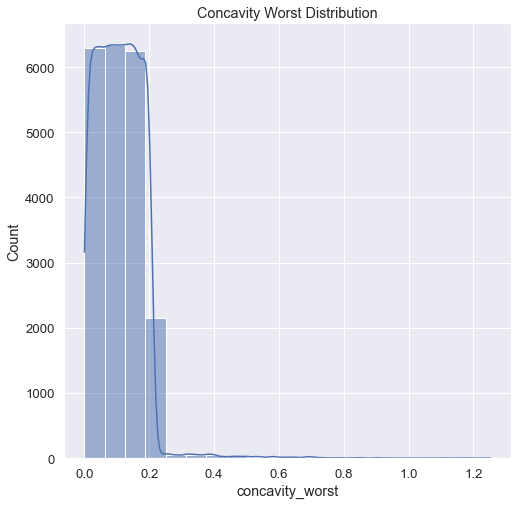

In [57]:
sns.histplot(data = df, x = 'concavity_worst', bins = 20, kde = True )
plt.title('Concavity Worst Distribution')

Text(0.5, 1.0, 'Concavity Worst Distribution')

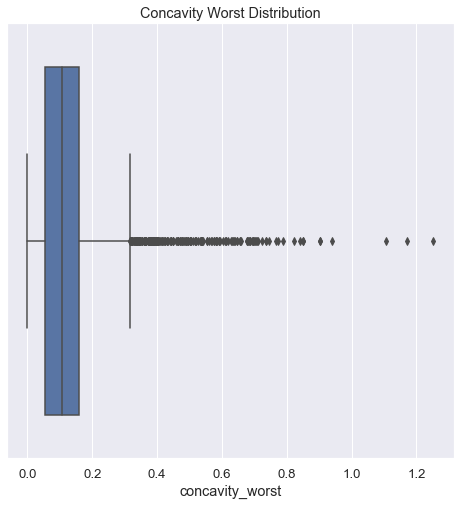

In [58]:
sns.boxplot(data = df , x = 'concavity_worst')
plt.title('Concavity Worst Distribution')

#### 3.2.11 Fix ID

In [59]:
df['id'] = df['id'].fillna(0)
df['id'] = df['id'].astype(int)

In [60]:
df['id']

0          842302
1          842517
2        84300903
3        84348301
4        84358402
           ...   
21617      324290
21618      324301
21619      324312
21620      324323
21621      324334
Name: id, Length: 21591, dtype: int64

### 3. Fix Categorical Data

#### 3.3.1 Fix diagnosis

In [61]:
def fix_diagnosis(d):
    try: 
        if d.upper():
            return d.title()
        else:
            return np.nan
    except:
        return np.nan

In [62]:
df['diagnosis'] = df['diagnosis'].apply(fix_diagnosis)

In [62]:
# Encode the categorical data value
#from sklearn.preprocessing import LabelEncoder

#labelencoder_Y = LabelEncoder()
#df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)

In [63]:
df['diagnosis']

0        M
1        M
2        M
3        M
4        M
        ..
21617    M
21618    M
21619    M
21620    M
21621    B
Name: diagnosis, Length: 21591, dtype: object

In [67]:
df['diagnosis'] = df['diagnosis'].replace('M', 1, regex = True)
df['diagnosis'] = df['diagnosis'].replace('B', 0, regex = True)

In [68]:
df['diagnosis'] 

0        1
1        1
2        1
3        1
4        1
        ..
21617    1
21618    1
21619    1
21620    1
21621    0
Name: diagnosis, Length: 21591, dtype: object

### 4. Fix Null Values

#### 3.4.1 Fix Numerical null values

In [69]:
df.isnull().sum()

id                           0
diagnosis                  278
radius_mean                278
texture_mean               287
perimeter_mean             725
area_mean                  278
smoothness_mean            287
compactness_mean           287
concavity_mean             283
concave points_mean        287
symmetry_mean              287
fractal_dimension_mean     287
radius_se                  284
texture_se                 287
perimeter_se               287
area_se                    287
smoothness_se              287
compactness_se             280
concavity_se               278
concave points_se          287
symmetry_se                287
fractal_dimension_se       287
radius_worst               281
texture_worst              287
perimeter_worst            287
area_worst                 278
smoothness_worst           287
compactness_worst          287
concavity_worst            287
concave points_worst       287
symmetry_worst             287
fractal_dimension_worst    287
dtype: i

In [70]:
def impute_median(series):
    return series.fillna(series .median())

In [71]:
df = df.transform(impute_median)

In [72]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### 3.4.2 fix categorical null values

In [73]:
df['diagnosis'].fillna(str(df['diagnosis'].mode().values[0]),inplace = True)
df['concave points_mean'].fillna(str(df['concave points_mean'].mode().values[0]),inplace = True)
df['symmetry_worst'].fillna(str(df['symmetry_worst'].mode().values[0]),inplace = True)

In [74]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 5. Fix dublicates Values

In [75]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21221 entries, 0 to 21621
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21221 non-null  int64  
 1   diagnosis                21221 non-null  float64
 2   radius_mean              21221 non-null  float64
 3   texture_mean             21221 non-null  float64
 4   perimeter_mean           21221 non-null  float64
 5   area_mean                21221 non-null  float64
 6   smoothness_mean          21221 non-null  float64
 7   compactness_mean         21221 non-null  float64
 8   concavity_mean           21221 non-null  float64
 9   concave points_mean      21221 non-null  float64
 10  symmetry_mean            21221 non-null  float64
 11  fractal_dimension_mean   21221 non-null  float64
 12  radius_se                21221 non-null  float64
 13  texture_se               21221 non-null  float64
 14  perimeter_se          

# 4.Exploratory Data Analysis

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21221 entries, 0 to 21621
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21221 non-null  int64  
 1   diagnosis                21221 non-null  float64
 2   radius_mean              21221 non-null  float64
 3   texture_mean             21221 non-null  float64
 4   perimeter_mean           21221 non-null  float64
 5   area_mean                21221 non-null  float64
 6   smoothness_mean          21221 non-null  float64
 7   compactness_mean         21221 non-null  float64
 8   concavity_mean           21221 non-null  float64
 9   concave points_mean      21221 non-null  float64
 10  symmetry_mean            21221 non-null  float64
 11  fractal_dimension_mean   21221 non-null  float64
 12  radius_se                21221 non-null  float64
 13  texture_se               21221 non-null  float64
 14  perimeter_se          

In [78]:
df.describe()

id     diagnosis   radius_mean  texture_mean  perimeter_mean  \
count  2.122100e+04  21221.000000  21221.000000  21221.000000    21221.000000   
mean   1.016092e+06      0.371330     17.304213     20.103942       55.392246   
std    2.102674e+07      0.483172      5.987299      5.970810        9.271045   
min    0.000000e+00      0.000000      0.000000      9.710000       43.790000   
25%    1.512710e+05      0.000000     12.163000     14.988000       49.596000   
50%    2.097250e+05      0.000000     17.199000     20.047000       54.689500   
75%    2.680800e+05      1.000000     22.405000     25.173000       59.747000   
max    9.113205e+08      1.000000     28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count  21221.000000     21221.000000      21221.000000    21221.000000   
mean     257.841153         0.155180          0.123001        0.103747   
std      104.635541         0.060116          0.060053        0.060713   
min        0.000000         0.052630          0.020000        0.000000   
25%      196.910000         0.102470          0.070000        0.051190   
50%      249.900000         0.153800          0.120000        0.103010   
75%      302.670000         0.206740          0.170000        0.155160   
max     2501.000000         0.263160          0.350000        0.426800   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count         21221.000000  ...  21221.000000   21221.000000     21221.000000   
mean              0.102682  ...     18.260649      22.522898        62.064983   
std               0.060279  ...      6.032066       6.034812        10.983631   
min               0.000000  ...      0.000000      12.020000        50.410000   
25%               0.050240  ...     13.112000      17.344000        55.777000   
50%               0.101700  ...     18.175000      22.513000        61.084000   
75%               0.154200  ...     23.396000      27.632000        66.366000   
max               0.210530  ...     36.040000      49.540000       251.200000   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  21221.000000      21221.000000       21221.000000     21221.000000   
mean     214.404019          0.174187           0.134726         0.108636   
std      145.371447          0.059796           0.067489         0.073354   
min      185.200000          0.071170           0.027290         0.000000   
25%      190.577000          0.122870           0.080590         0.053040   
50%      195.893000          0.172610           0.132940         0.105520   
75%      201.197000          0.225280           0.184800         0.157730   
max     4254.000000          0.281700           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          21221.000000    21221.000000             21221.000000  
mean               0.104442        0.261308                 0.157194  
std                0.060251        0.060726                 0.060579  
min                0.000000        0.000000                 0.055040  
25%                0.052770        0.209950                 0.103750  
50%                0.103880        0.261410                 0.156220  
75%                0.155670        0.312200                 0.209150  
max                0.290300        0.663800                 0.265570  

[8 rows x 32 columns]

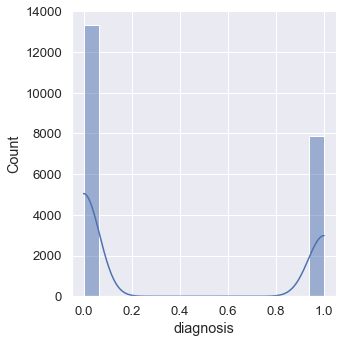

In [79]:
sns.displot(df['diagnosis'],kde=True)

In [80]:
#ax = df[df['diagnosis'] == 4][0:50].plot(kind='scatter', x='radius_mean', y='area_mean', color='DarkBlue', label='malignant');
#df[df['diagnosis'] == 2][0:100].plot(kind='scatter', x='radius_mean', y='area_mean', color='Yellow', label='benign', ax=ax);
#plt.show()

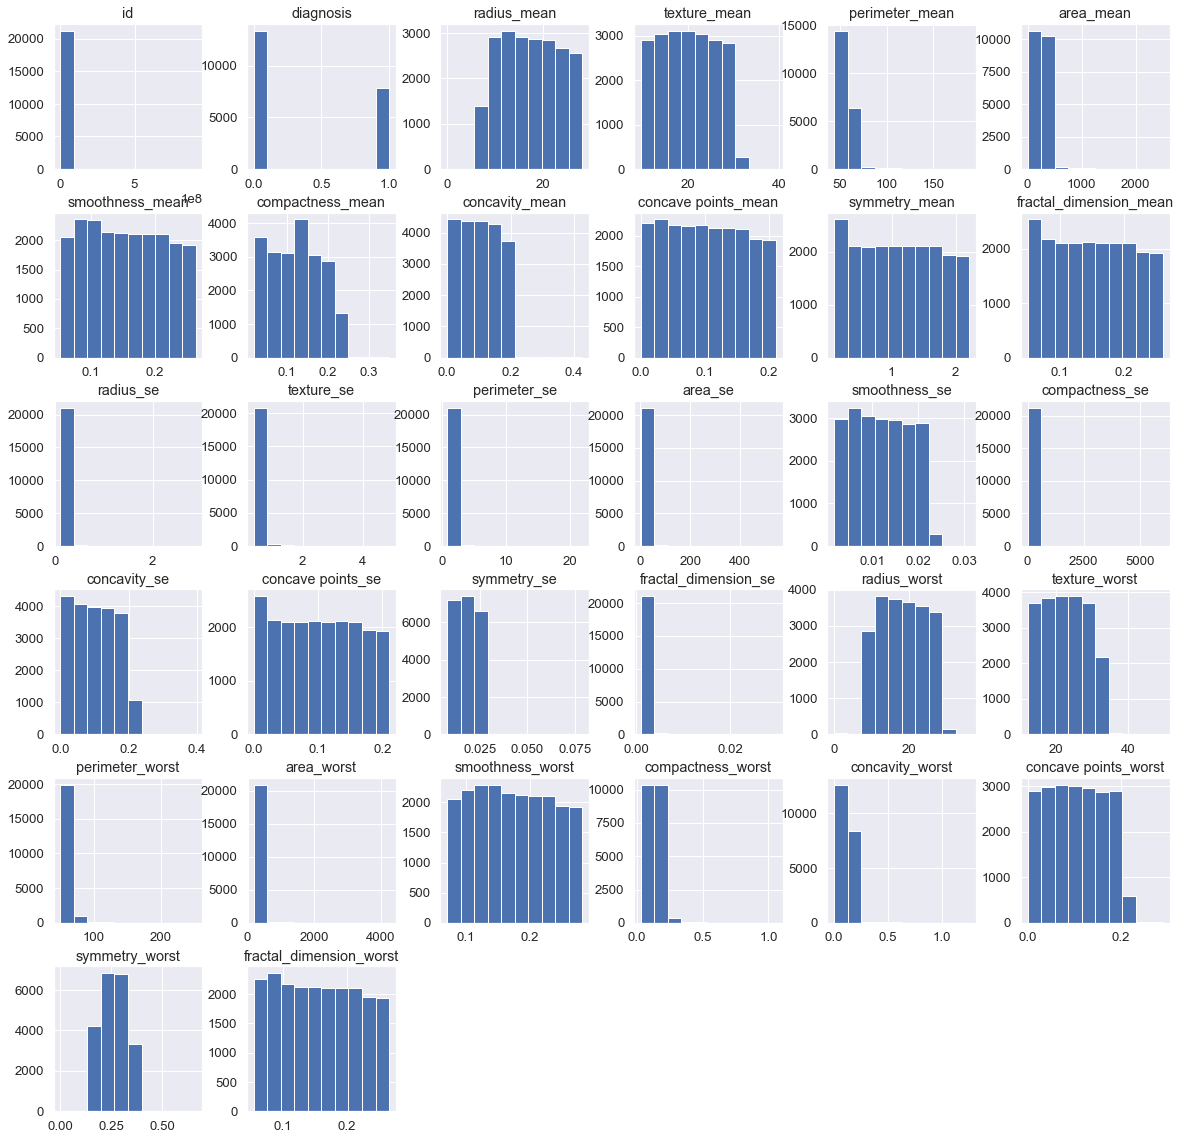

In [81]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

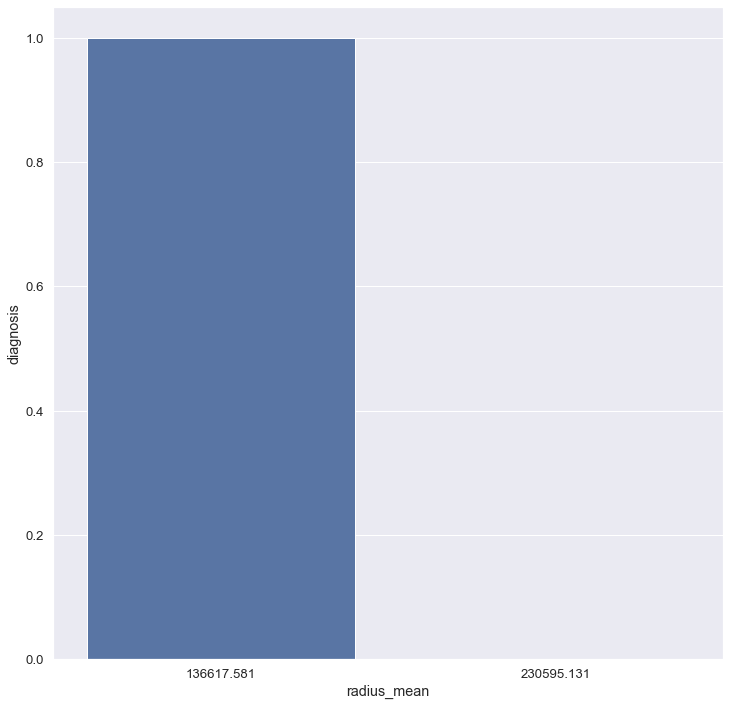

In [82]:
#Total diagnosis
plt.figure(figsize=(12,12))
diagnosis = df.groupby(['diagnosis'])['radius_mean'].sum().sort_values(ascending=False)
sns.barplot(data=df, x = diagnosis, y = diagnosis.index, color = sns.color_palette()[0])

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

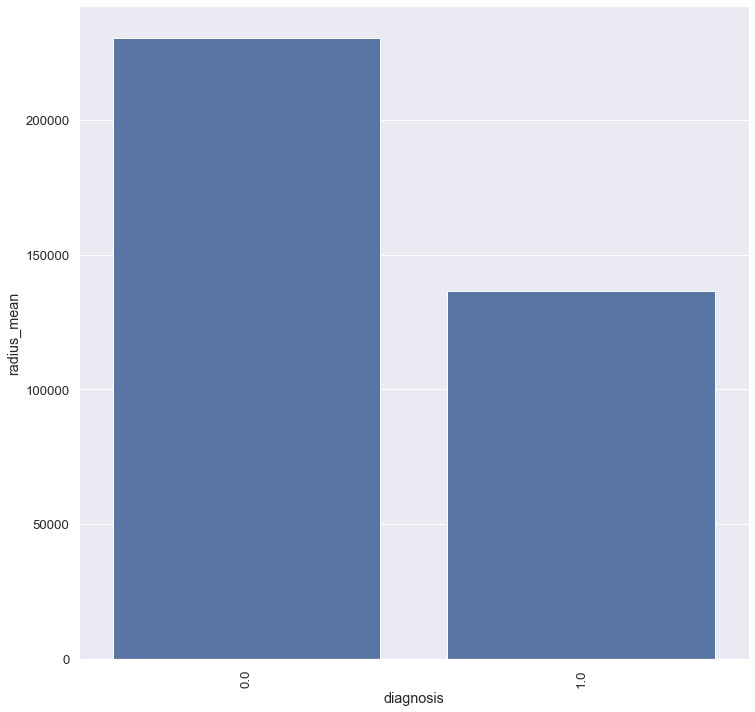

In [83]:
plt.figure(figsize=(12,12))
price = df.groupby(['diagnosis'])['radius_mean'].sum().sort_values(ascending=False)
sns.barplot(data = df, x = price.index, y = price , color = sns.color_palette()[0])
plt.xticks(rotation = 90)

In [84]:
df.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.006420    -0.011302      0.009271   
diagnosis                0.006420   1.000000     0.004242      0.001824   
radius_mean             -0.011302   0.004242     1.000000      0.988578   
texture_mean             0.009271   0.001824     0.988578      1.000000   
perimeter_mean           0.184185   0.046981     0.584889      0.610512   
area_mean                0.194716   0.051764     0.553989      0.567744   
smoothness_mean         -0.035064  -0.004033     0.991868      0.982572   
compactness_mean        -0.008668   0.007877     0.987943      0.985394   
concavity_mean           0.004023   0.018201     0.983129      0.977976   
concave points_mean     -0.026735   0.007021     0.995159      0.983430   
symmetry_mean           -0.056193  -0.005738     0.981302      0.965999   
fractal_dimension_mean  -0.053938  -0.006200     0.982496      0.968618   
radius_se                0.168498   0.048168     0.726856      0.739245   
texture_se               0.170657  -0.002913     0.285100      0.370783   
perimeter_se             0.123204   0.037287     0.845177      0.853158   
area_se                  0.283077   0.068101     0.051848      0.069890   
smoothness_se           -0.020965  -0.007111     0.988621      0.983302   
compactness_se          -0.000409  -0.003998    -0.006960      0.000059   
concavity_se            -0.037191  -0.002889     0.987214      0.976347   
concave points_se       -0.052301  -0.005055     0.983321      0.968620   
symmetry_se              0.013079  -0.006384     0.955028      0.965192   
fractal_dimension_se     0.103751   0.002259     0.700040      0.737261   
radius_worst            -0.002891   0.004926     0.993785      0.981837   
texture_worst            0.033643   0.006355     0.968846      0.991075   
perimeter_worst          0.198910   0.060307     0.514256      0.541506   
area_worst               0.243207   0.077101     0.019649      0.044024   
smoothness_worst        -0.023200  -0.001989     0.992867      0.987418   
compactness_worst        0.069760   0.031013     0.854190      0.877893   
concavity_worst          0.098779   0.044626     0.786551      0.810495   
concave points_worst     0.015648   0.016810     0.983025      0.982397   
symmetry_worst           0.014092   0.006131     0.964340      0.973087   
fractal_dimension_worst -0.044895  -0.003616     0.987240      0.976730   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.184185   0.194716        -0.035064   
diagnosis                      0.046981   0.051764        -0.004033   
radius_mean                    0.584889   0.553989         0.991868   
texture_mean                   0.610512   0.567744         0.982572   
perimeter_mean                 1.000000   0.933861         0.501679   
area_mean                      0.933861   1.000000         0.468061   
smoothness_mean                0.501679   0.468061         1.000000   
compactness_mean               0.604734   0.562790         0.985394   
concavity_mean                 0.635048   0.601051         0.973632   
concave points_mean            0.543682   0.514263         0.995912   
symmetry_mean                  0.427297   0.402525         0.994982   
fractal_dimension_mean         0.435021   0.408542         0.996244   
radius_se                      0.859797   0.842008         0.669863   
texture_se                     0.690635   0.619785         0.240552   
perimeter_se                   0.817345   0.790877         0.802851   
area_se                        0.698039   0.713073        -0.036644   
smoothness_se                  0.508886   0.474673         0.996662   
compactness_se                -0.000612   0.028363        -0.000080   
concavity_se                   0.481164   0.449175         0.995887   
concave points_se              0.438086   0.412813         0.995919   
symmetry_se                    0.626927   0.578646         0.951

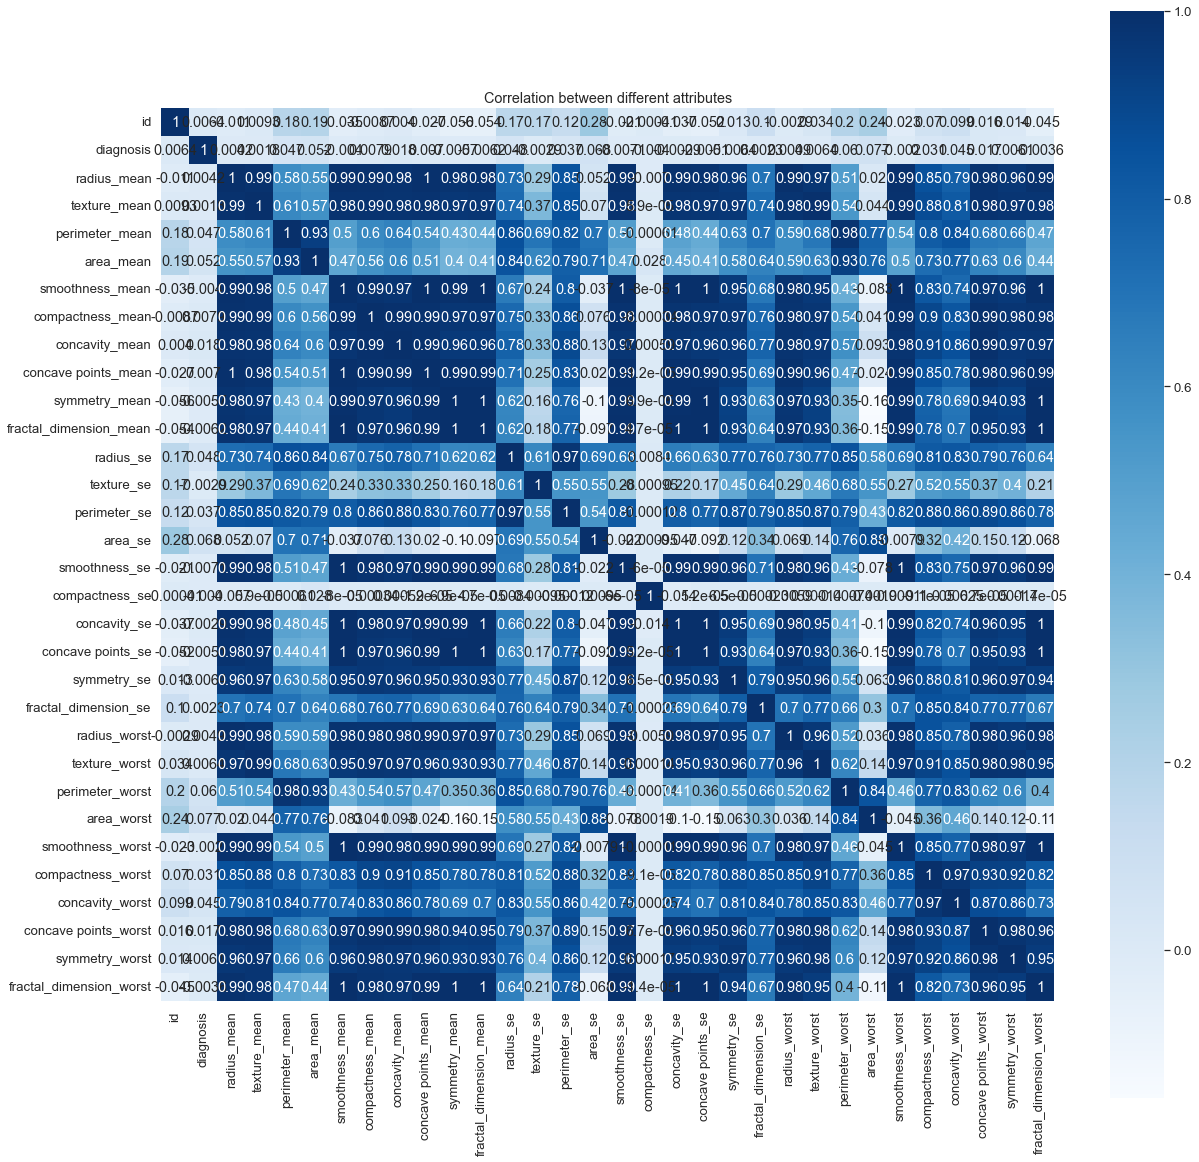

In [85]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [86]:
#sns.pairplot(df,diag_kind='kde')

In [87]:
#Correlation with output variable
#cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0]
#relevant_features


# 5. Model Implementation

### 5.1 Feature Selection

Select feature for predictions

In [88]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Take the dependent and independent feature for prediction

In [89]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [90]:
X = df[prediction_feature]
X

# print(X.shape)
# print(X.values)

radius_mean  perimeter_mean  area_mean  symmetry_mean  \
0            0.000         122.800    1001.00         0.2419   
1           20.570         132.900    1326.00         0.1812   
2           19.690         130.000    1203.00         0.2069   
3           11.420          77.580     386.10         0.2597   
4           20.290         135.100    1297.00         0.1809   
...            ...             ...        ...            ...   
21617       28.030          64.839     353.99         2.2109   
21618       28.031          64.840     354.00         2.2110   
21619       28.032          64.841     354.01         2.2111   
21620       28.033          64.842     354.02         2.2112   
21621       28.034          64.843     354.03         2.2113   

       compactness_mean  concave points_mean  
0                  0.28              0.14710  
1                  0.08              0.07017  
2                  0.16              0.12790  
3                  0.28              0.10520  
4                  0.13              0.10430  
...                 ...                  ...  
21617              0.23              0.21049  
21618              0.23              0.21050  
21619              0.23              0.21051  
21620              0.23              0.21052  
21621              0.23              0.21053  

[21221 rows x 6 columns]

In [91]:
y = df.diagnosis
y

# print(y.values)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
21617    1.0
21618    1.0
21619    1.0
21620    1.0
21621    0.0
Name: diagnosis, Length: 21221, dtype: float64

# 6. ML Model Selecting and Model Prediction

Splite the dataset into trainingset and testingset by 25% and set the 15 fixed records

In [92]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

#print(X_train)
# print(X_test)

Scale the data to keep all the values in the same magnitude of 0 -1 

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#x_train

Creat a function for the models

In [94]:
def models(X_train, y_train):
    
    # logistic regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit (X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit (X_train, y_train)
    
    
    #KNeighorsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier (n_neighbors = 5, weights = 'distance')
    KNN.fit(X_train, y_train)  
    
    
    #Support Vector Machine
    from sklearn.svm import SVC
    svc = SVC(gamma = 0.025, C = 3)
    svc.fit(X_train,y_train)

    


    # Adaboost Classifier
    from sklearn.ensemble import AdaBoostClassifier 
    adb = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
    adb.fit(X_train, y_train)
    y_pred_adb = adb.predict(X_test)
    accuracy_score(y_test, y_pred_adb)
    

    #print the model accuracy
    print ('[0]Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print ('[1]Decision Tree Classifier Training Accuracy: ', tree.score(X_train, y_train))
    print ('[2]Random Forest Classifier Training Accuracy: ', forest.score(X_train, y_train))
    print ('[3]KNeighorsClassifier(KNN) Training Accuracy: ', KNN.score(X_train, y_train))
    print ('[4]Support Vector Machine (SVC) Training Accuracy: ', svc.score(X_train, y_train))
    print ('[5]Adaboost Classifer Training Accuracy: ', adb.score(X_train, y_train))



    
    
    return log, tree, forest, KNN, svc, adb

In [95]:
# print the model prediction
#from sklearn.metrics import classification_report

#for j in range(len(models)):
 #   print ('Model' , j)
    
    

In [96]:





#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.6335532516493874
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  0.9576500157084511
[3]KNeighorsClassifier(KNN) Training Accuracy:  1.0
[4]Support Vector Machine (SVC) Training Accuracy:  0.6344957587181904
[5]Adaboost Classifer Training Accuracy:  1.0


In [97]:
# Test model on accuracy on test data on confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

for i in range(len(model)):
    print ('Model ', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test)) #confusion_matrix

    TP = cm[0][0] #True Positive
    TN = cm[1][1] #True Negative
    FN = cm[1][0] #False Negative
    FP = cm[0][1] #False Positive

    print (cm)
    print ('Testing Accuracy = ', (TP + TN)/(TP + TN + FN + FP))
    print ()

Model  0
[[3358    8]
 [1898   42]]
Testing Accuracy =  0.6407840180927252

Model  1
[[1814 1552]
 [ 939 1001]]
Testing Accuracy =  0.5305314738032416

Model  2
[[2262 1104]
 [1242  698]]
Testing Accuracy =  0.5578590275160196

Model  3
[[2290 1076]
 [1257  683]]
Testing Accuracy =  0.5603090840557859

Model  4
[[3362    4]
 [1895   45]]
Testing Accuracy =  0.6421032793064455

Model  5
[[1734 1632]
 [ 930 1010]]
Testing Accuracy =  0.5171503957783641



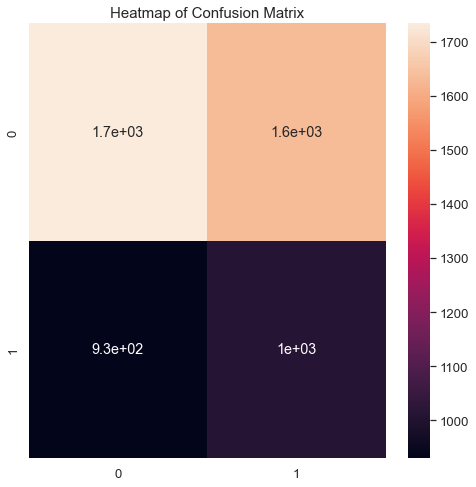

In [98]:
cm = confusion_matrix(y_test, model[i].predict(X_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [99]:
# Alternative way to get the matrics of the models
from sklearn.metrics import accuracy_score, classification_report

for i in range(len(model)): 
    print ('Model ', i)
    print (classification_report(y_test , model[0].predict(X_test)))
    print (accuracy_score( y_test, model[0].predict(X_test)))
    print ()


Model  0
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3366
         1.0       0.84      0.02      0.04      1940

    accuracy                           0.64      5306
   macro avg       0.74      0.51      0.41      5306
weighted avg       0.71      0.64      0.51      5306

0.6407840180927252

Model  1
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3366
         1.0       0.84      0.02      0.04      1940

    accuracy                           0.64      5306
   macro avg       0.74      0.51      0.41      5306
weighted avg       0.71      0.64      0.51      5306

0.6407840180927252

Model  2
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3366
         1.0       0.84      0.02      0.04      1940

    accuracy                           0.64      5306
   macro avg       0.74      0.51      0.41      5306
weighte

The same accuracy conclusion

In [100]:
# Print the prediction of random forest classifier model

pred = model[i].predict(X_test)
print (pred)
print ()
print (y_test)

[0. 0. 0. ... 0. 1. 0.]

5187     0.0
16258    0.0
4143     0.0
7131     0.0
14000    0.0
        ... 
4531     0.0
8650     0.0
20407    1.0
4454     0.0
2075     1.0
Name: diagnosis, Length: 5306, dtype: float64


### 7. Deploy Model

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)


import joblib

# save model
joblib.dump(tree, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

# load model
breast_cancer_detector_model = joblib.load('/Users/user/Dropbox/Data Science/Final Project/Model/model.h5')
breast_cancer_detector_scaler = joblib.load('/Users/user/Dropbox/Data Science/Final Project/Model/scaler.h5')


# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of decision tree model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of decision tree model = ',accuracy_score(y_test, y_pred))


Confusion matrix of decision tree model: 
 [[1814 1552]
 [ 939 1001]] 

Accuracy of decision tree model =  0.5305314738032416


In [102]:
print (y_pred)

[1. 1. 1. ... 1. 1. 1.]


In [103]:
#breast_cancer_detector_model = joblib.load('/Users/user/Dropbox/Data Science/Final Project/Model/model.h5')
#breast_cancer_detector_scaler = joblib.load('/Users/user/Dropbox/Data Science/Final Project/Model/scaler.h5')

#out_put= breast_cancer_detector_model([[1,2,1,2,1,2]])
#print (out_put)

In [1]:
exit()